# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)"""
    
    #Step 1: Caluclation P(Y=1) and P(Y=-1) 
    
    #Step 2: ML estimates of mu- and mu+
    
    cnt1 = 0 
    cnt2 = 0
    d    = len(X_train[0])
    s1 = np.zeros(d)
    s2 = np.zeros(d)
    
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            cnt1 = cnt1+1
            s1 = np.add(s1,X_train[i])
        if Y_train[i] == -1:
            cnt2 = cnt2+1
            s2 = np.add(s2,X_train[i])
    
    mu1 = s1/cnt1;
    mu2 = s2/cnt2;
    
    Py_1 = (cnt1)/(cnt1+cnt2)
    Py_2 = (cnt2)/(cnt1+cnt2)
    
    
    
    #Step 3: Finding the Probability of P(Y=1/X)
    Y_test_pred = np.array([])
    e = 2.718281828459045
    
    for i in range(len(X_test)):
        a = np.subtract(X_test[i],mu1)
        b = np.subtract(X_test[i],mu2)

        exp_numer = np.dot(a,a)
        exp_denom = np.dot(b,b)

       

        num = (e**(-0.5*exp_numer))*Py_1
        denom = ((e**(-0.5*exp_numer))*Py_1)+ ((e**(-0.5*exp_denom))*Py_2)


        Py1x = num/denom
        
        if Py1x >= 0.5:
            Y_test_pred = np.append(Y_test_pred,[1])
        if Py1x < 0.5:
            Y_test_pred = np.append(Y_test_pred,[-1]) 
        
    
    """"Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    return Y_test_pred
    
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    cnt1 = 0 
    cnt2 = 0
    d    = len(X_train[0])
    s1 = np.zeros(d)
    s2 = np.zeros(d)
    
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            cnt1 = cnt1+1
            s1 = np.add(s1,X_train[i])
        if Y_train[i] == -1:
            cnt2 = cnt2+1
            s2 = np.add(s2,X_train[i])
    
    mu1 = s1/cnt1;

    
    mu2 = s2/cnt2;
   
    
    Py_1 = (cnt1)/(cnt1+cnt2)
    
    Py_2 = (cnt2)/(cnt1+cnt2)
    
    sigma = np.zeros((d,d))
    
    mu = (s1+s2)/(cnt1+cnt2)
    for i in range(len(X_train)):
        
        if Y_train[i] ==1:
            mat1 = np.subtract(X_train[i],mu1)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma = np.add(sigma,a)
        if Y_train[i] == -1:
            mat1 = np.subtract(X_train[i],mu2)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma = np.add(sigma,a)
        
            
    
    sigma = sigma/(cnt1+cnt2-2)
   
     #Step 3: Finding the Probability of P(Y=1/X)
    Y_test_pred = np.array([])
    
    e = 2.718281828459045
    
    for i in range(len(X_test)):
        
        a = np.subtract(X_test[i],mu1)
        b = np.subtract(X_test[i],mu2)
        invsigma = np.linalg.inv(sigma)
        exp_numer = np.linalg.multi_dot([a.T,invsigma,a])
        exp_denom = np.linalg.multi_dot([b.T,invsigma,b])

       

        num = (e**(-0.5*exp_numer))*Py_1/(np.linalg.det(sigma))
        denom = ((e**(-0.5*exp_numer))*Py_1/np.linalg.det(sigma))+ ((e**(-0.5*exp_denom))*Py_2/np.linalg.det(sigma))


        Py1x = num/(denom)
        

        if Py1x >=0.5:
            Y_test_pred = np.append(Y_test_pred,[1])
        if Py1x < 0.5:
            Y_test_pred = np.append(Y_test_pred,[-1]) 
        
    
    """"Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    return Y_test_pred
    

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    #Step 1: Caluclation P(Y=1) and P(Y=-1) 
    
    #Step 2: ML estimates of mu- and mu+ and sigma- and sigma+
    
    cnt1 = 0 
    cnt2 = 0
    d    = len(X_train[0])
    s1 = np.zeros(d)
    s2 = np.zeros(d)
    
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            cnt1 = cnt1+1
            s1 = np.add(s1,X_train[i])
        if Y_train[i] == -1:
            cnt2 = cnt2+1
            s2 = np.add(s2,X_train[i])
    
    mu1 = s1/cnt1;

    
    mu2 = s2/cnt2;
   
    
    Py_1 = (cnt1)/(cnt1+cnt2)
    
    Py_2 = (cnt2)/(cnt1+cnt2)
    
    sigma1 = np.zeros((d,d))
    
    sigma2 = np.zeros((d,d))

    for i in range(len(X_train)):
        if Y_train[i] == 1:
            mat1 = np.subtract(X_train[i],mu1)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma1 = np.add(sigma1,a)
        
        if Y_train[i] == -1:
            
            #mat2 = np.reshape(mat1,(1,d))
            mat2 = np.subtract(X_train[i],mu2)
            mat2 = np.reshape(mat2,(2,1))
            b = np.outer(mat2,mat2)
            sigma2 = np.add(sigma2,b)
            
    sigma1 = sigma1/(cnt1-1)
    sigma2 = sigma2/(cnt2-1)
   
     #Step 3: Finding the Probability of P(Y=1/X)
    Y_test_pred = np.array([])
    
    e = 2.718281828459045
    
    for i in range(len(X_test)):
        
        a = np.subtract(X_test[i],mu1)
        b = np.subtract(X_test[i],mu2)
        invsigma1 = np.linalg.inv(sigma1)
        invsigma2 = np.linalg.inv(sigma2)
        exp_numer = np.linalg.multi_dot([a.T,invsigma1,a])
        exp_denom = np.linalg.multi_dot([b.T,invsigma2,b])

       

        num = (e**(-0.5*exp_numer))*Py_1/(np.linalg.det(sigma1))
        denom = ((e**(-0.5*exp_numer))*Py_1/np.linalg.det(sigma1))+ ((e**(-0.5*exp_denom))*Py_2/np.linalg.det(sigma2))


        Py1x = num/(denom)
        

        if Py1x >= 0.5:
            Y_test_pred = np.append(Y_test_pred,[1])
        if Py1x < 0.5:
            Y_test_pred = np.append(Y_test_pred,[-1]) 
        
    
    """"Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """
    return Y_test_pred
    



In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


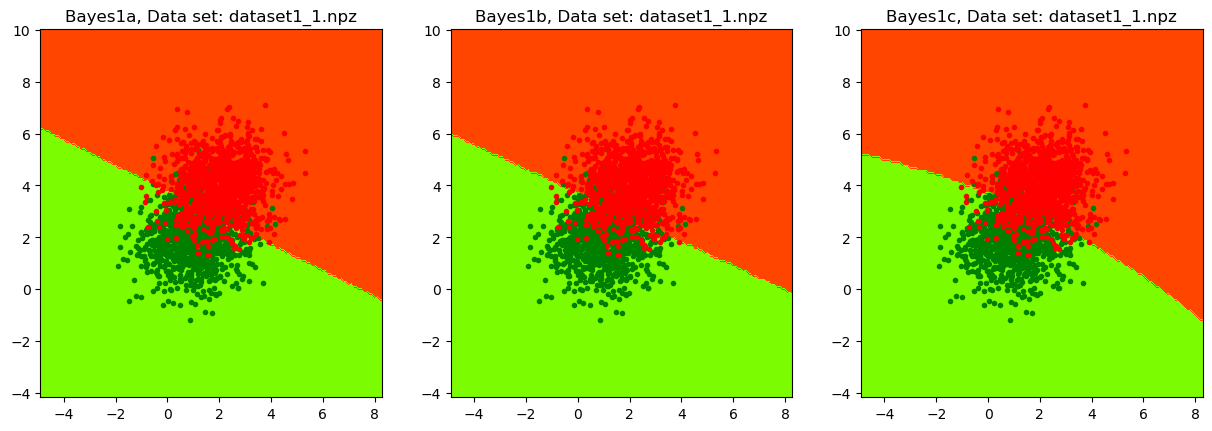

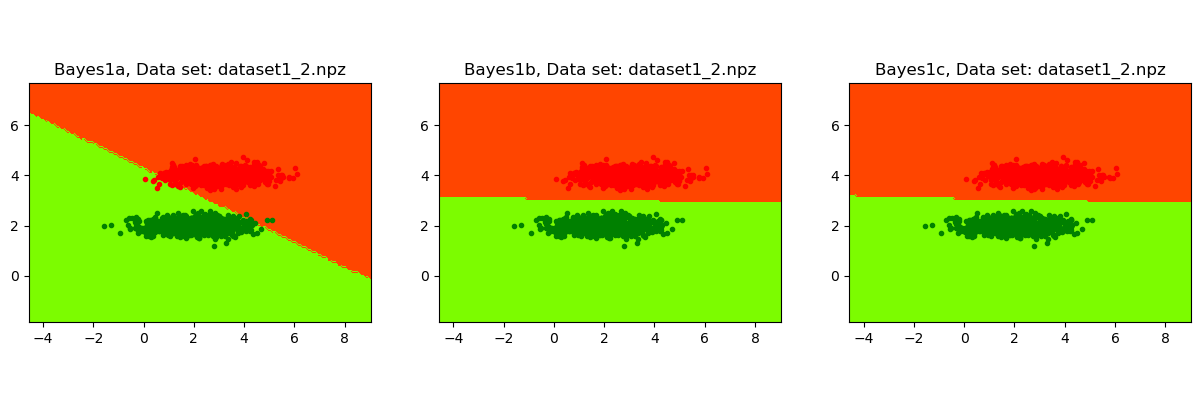

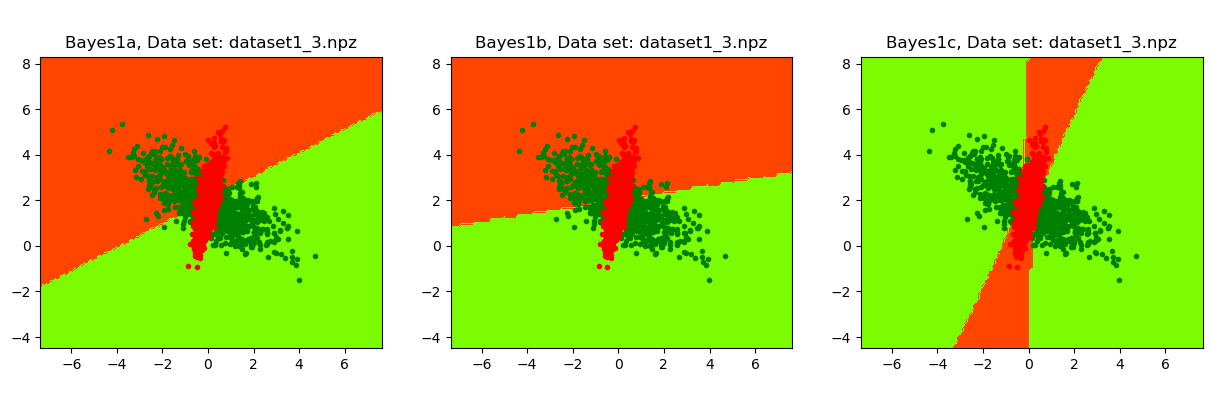

In [57]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
for f in ['../../Data/dataset1_1.npz','../../Data/dataset1_2.npz','../../Data/dataset1_3.npz']:
    d = np.load(f)
    X_train = d['arr_0']
    Y_train = d['arr_1']
    X_test  = d['arr_2']

    fig = plt.figure(figsize=(15,5))
    plt.axis('off')
    a = 1

    for j in [Bayes1a,Bayes1b,Bayes1c]:
        strs = ['Bayes1a','Bayes1b','Bayes1c']
        X,Y = np.meshgrid(np.arange(min(X_train[:,0])-3,max(X_train[:,0])+3,0.1), np.arange(min(X_train[:,1])-3,max(X_train[:,1])+3,0.1))
        z = np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1)
        Z_pred = j(X_train,Y_train,z)
        Z = Z_pred.reshape(X.shape)
        ax1 = fig.add_subplot(1,3,a)

        ax1.contourf(X,Y,Z,colors = ['orangered','lawngreen'])
        Y_test_pred = j(X_train,Y_train,X_test)
        for i in range(len(X_train)):
            if Y_train[i] == 1:
                ax1.scatter(X_train[i][0],X_train[i][1],marker = ".",color = 'green')
            if Y_train[i] == -1:
                ax1.scatter(X_train[i][0],X_train[i][1],marker = ".", color = 'red')
        '''for i in range(len(X_test)):
            if Y_test_pred[i] == 1:
                ax1.scatter(X_test[i][0],X_test[i][1],color = 'white')
            if Y_test_pred[i] == -1:
                ax1.scatter(X_test[i][0],X_test[i][1],color = 'black')'''
        ax1.set(adjustable='box', aspect='equal')
        ax1.title.set_text(strs[a-1]+', Data set: '+f)
        a = a+1

    plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

Important conclusions are:
Bayes 1c performed consistently well for all the three data sets. When the data is linearly seperable, Bayes classifiers have given very accurate predictions. When the assumption of equal covariance between samples is badly off(dataset1_3.npz),Bayes 1a(Identify covariance matrix) and Bayes 1b(( or equal covariance of samples)) performed extremely bad in classifying the samples. Whereas, Bayes1c classifier performed consistently well in classifiying samples because of the unequal covaraince matrices that we have used in the analysis to classify the  data. 
The following table summurizes the errors rates of all three classifiers for all the given datasets
Formula for error rate is given by 1- accuracy

Accuracy = Correctly classified samples/Total number of Samples

Error rate Table:
----
|Classifier| Bayes1a|Bayes1b|Bayes1c|
|:--------|:-------|:------|:-------|
|dataset1_1.npz|0.126|0.1245|0.1255|
|dataset1_2.npz|0.0085|0|0|
|dataset1_3.npz|0.497|0.495|0.1525|


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:
# Cell type : CodeWrite
# Fill in functions in this cell
L = np.array([[0,1,2,3],
              [1,0,1,2],
              [2,1,0,1],
              [3,2,1,0]])
def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    cnt1,cnt2,cnt3,cnt4 = 0,0,0,0
    d = len(X_train[0])
    mu1 = np.zeros(d)
    mu2 = np.zeros(d)
    mu3 = np.zeros(d)
    mu4 = np.zeros(d)
    
    for i in range(len(X_train)):
        if Y_train[i] ==1:
            cnt1 += 1
            mu1 = np.add(mu1,X_train[i])
        if Y_train[i] ==2:
            cnt2 += 1
            mu2 = np.add(mu2,X_train[i])
        if Y_train[i] ==3:
            cnt3 += 1
            mu3 = np.add(mu3,X_train[i])
        if Y_train[i] ==4:
            cnt4 += 1
            mu4 = np.add(mu4,X_train[i])
    
    py1 = cnt1/(cnt1+cnt2+cnt3+cnt4)
    py2 = cnt2/(cnt1+cnt2+cnt3+cnt4)
    py3 = cnt3/(cnt1+cnt2+cnt3+cnt4)
    py4 = cnt4/(cnt1+cnt2+cnt3+cnt4)
    
    mu1 = mu1/cnt1
    mu2 = mu2/cnt2
    mu3 = mu3/cnt3
    mu4 = mu4/cnt4
    
    e = 2.718281828459045
    
    Y_test_pred = np.array([])
    #Calucating the risk of classification and prediction
    for i in range(len(X_test)):
        
        a1 = np.subtract(X_test[i],mu1)
        a1 = np.dot(a1,a1)
        num1 = (e**(-0.5*(a1)))*py1
        a2 = np.subtract(X_test[i],mu2)
        a2 = np.dot(a2,a2)
        num2 = (e**(-0.5*(a2)))*py2
        a3 = np.subtract(X_test[i],mu3)
        a3 = np.dot(a3,a3)
        num3 = (e**(-0.5*(a3)))*py3
        a4 = np.subtract(X_test[i],mu4)
        a4 = np.dot(a4,a4)
        num4 = (e**(-0.5*(a4)))*py4
        
        py1x = num1/(num1+num2+num3+num4)
        py2x = num2/(num1+num2+num3+num4)
        py3x = num3/(num1+num2+num3+num4)
        py4x = num4/(num1+num2+num3+num4)
        
        #risk of classifing as 1
        r1 = (py1x*L[0][0])+(py2x*L[0][1])+(py3x*L[0][2])+(py4x*L[0][3])
        # risk 2
        r2 = (py1x*L[1][0])+(py2x*L[1][1])+(py3x*L[1][2])+(py4x*L[1][3])
        #risk 3
        r3 = (py1x*L[2][0])+(py2x*L[2][1])+(py3x*L[2][2])+(py4x*L[2][3])
        #risk 4
        r4 = (py1x*L[3][0])+(py2x*L[3][1])+(py3x*L[3][2])+(py4x*L[3][3])    
        
        minrisk = min([r1,r2,r3,r4])
        if minrisk == r1:
            Y_test_pred = np.append(Y_test_pred,[1])
        elif minrisk == r2:
            Y_test_pred = np.append(Y_test_pred,[2])
        elif minrisk == r3:
            Y_test_pred = np.append(Y_test_pred,[3])
        else:
            Y_test_pred = np.append(Y_test_pred,[4])
            
    return Y_test_pred
        
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    cnt1,cnt2,cnt3,cnt4 = 0,0,0,0
    d = len(X_train[0])
    mu1 = np.zeros(d)
    mu2 = np.zeros(d)
    mu3 = np.zeros(d)
    mu4 = np.zeros(d)
    
    for i in range(len(X_train)):
        if Y_train[i] ==1:
            cnt1 += 1
            mu1 = np.add(mu1,X_train[i])
        if Y_train[i] ==2:
            cnt2 += 1
            mu2 = np.add(mu2,X_train[i])
        if Y_train[i] ==3:
            cnt3 += 1
            mu3 = np.add(mu3,X_train[i])
        if Y_train[i] ==4:
            cnt4 += 1
            mu4 = np.add(mu4,X_train[i])
    
    py1 = cnt1/(cnt1+cnt2+cnt3+cnt4)
    py2 = cnt2/(cnt1+cnt2+cnt3+cnt4)
    py3 = cnt3/(cnt1+cnt2+cnt3+cnt4)
    py4 = cnt4/(cnt1+cnt2+cnt3+cnt4)
    
    mu1 = mu1/cnt1
    mu2 = mu2/cnt2
    mu3 = mu3/cnt3
    mu4 = mu4/cnt4
    
    e = 2.718281828459045
    
    Y_test_pred = np.array([])
    sigma = np.zeros((d,d))
    
    for i in range(len(X_train)):
        
        if Y_train[i] ==1:
            mat1 = np.subtract(X_train[i],mu1)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma = np.add(sigma,a)
        if Y_train[i] == 2:
            mat1 = np.subtract(X_train[i],mu2)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma = np.add(sigma,a)
        if Y_train[i] ==3:
            mat1 = np.subtract(X_train[i],mu3)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma = np.add(sigma,a)
        if Y_train[i] == 4:
            mat1 = np.subtract(X_train[i],mu4)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma = np.add(sigma,a)   
    sigma = sigma/(cnt1+cnt2+cnt3+cnt4-4)
    invsigma = np.linalg.inv(sigma)
    
    for i in range(len(X_test)):
        a1 = np.subtract(X_test[i],mu1)
        a1 = np.reshape(a1,(2,1))
        a1 = np.linalg.multi_dot([a1.T,invsigma,a1])
        num1 = (e**(-0.5*(a1)))*py1
        
        a2 = np.subtract(X_test[i],mu2)
        a2 = np.reshape(a2,(2,1))
        a2 = np.linalg.multi_dot([a2.T,invsigma,a2])
        num2 = (e**(-0.5*(a2)))*py2
        
        a3 = np.subtract(X_test[i],mu3)
        a3 = np.reshape(a3,(2,1))
        a3 = np.linalg.multi_dot([a3.T,invsigma,a3])
        num3 = (e**(-0.5*(a3)))*py3
        
        a4 = np.subtract(X_test[i],mu4)
        a4 = np.reshape(a4,(2,1))
        a4 = np.linalg.multi_dot([a4.T,invsigma,a4])
        num4 = (e**(-0.5*(a4)))*py4
        
        py1x = num1/(num1+num2+num3+num4)
        py2x = num2/(num1+num2+num3+num4)
        py3x = num3/(num1+num2+num3+num4)
        py4x = num4/(num1+num2+num3+num4)
        
        #risk of classifing as 1
        r1 = (py1x*L[0][0])+(py2x*L[1][0])+(py3x*L[2][0])+(py4x*L[3][0])
        # risk 2
        r2 = (py1x*L[0][1])+(py2x*L[1][1])+(py3x*L[2][1])+(py4x*L[3][1])
        #risk 3
        r3 = (py1x*L[0][2])+(py2x*L[1][2])+(py3x*L[2][2])+(py4x*L[3][2])
        #risk 4
        r4 = (py1x*L[0][3])+(py2x*L[1][3])+(py3x*L[2][3])+(py4x*L[3][3])    
        
        minrisk = min([r1,r2,r3,r4])
        if minrisk == r1:
            Y_test_pred = np.append(Y_test_pred,[1])
        elif minrisk == r2:
            Y_test_pred = np.append(Y_test_pred,[2])
        elif minrisk == r3:
            Y_test_pred = np.append(Y_test_pred,[3])
        else:
            Y_test_pred = np.append(Y_test_pred,[4])
            
    return Y_test_pred
    
    
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    cnt1,cnt2,cnt3,cnt4 = 0,0,0,0
    d = len(X_train[0])
    mu1 = np.zeros(d)
    mu2 = np.zeros(d)
    mu3 = np.zeros(d)
    mu4 = np.zeros(d)
    
    for i in range(len(X_train)):
        if Y_train[i] ==1:
            cnt1 += 1
            mu1 = np.add(mu1,X_train[i])
        if Y_train[i] ==2:
            cnt2 += 1
            mu2 = np.add(mu2,X_train[i])
        if Y_train[i] ==3:
            cnt3 += 1
            mu3 = np.add(mu3,X_train[i])
        if Y_train[i] ==4:
            cnt4 += 1
            mu4 = np.add(mu4,X_train[i])
    
    py1 = cnt1/(cnt1+cnt2+cnt3+cnt4)
    py2 = cnt2/(cnt1+cnt2+cnt3+cnt4)
    py3 = cnt3/(cnt1+cnt2+cnt3+cnt4)
    py4 = cnt4/(cnt1+cnt2+cnt3+cnt4)
    
    mu1 = mu1/cnt1
    mu2 = mu2/cnt2
    mu3 = mu3/cnt3
    mu4 = mu4/cnt4
    
    e = 2.718281828459045
    
    Y_test_pred = np.array([])
    sigma1 = np.zeros((d,d))
    sigma2 = np.zeros((d,d))
    sigma3 = np.zeros((d,d))
    sigma4 = np.zeros((d,d))
    
    for i in range(len(X_train)):
        
        if Y_train[i] ==1:
            mat1 = np.subtract(X_train[i],mu1)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma1 = np.add(sigma1,a)
        if Y_train[i] == 2:
            mat1 = np.subtract(X_train[i],mu2)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma2 = np.add(sigma2,a)
        if Y_train[i] ==3:
            mat1 = np.subtract(X_train[i],mu3)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma3 = np.add(sigma3,a)
        if Y_train[i] == 4:
            mat1 = np.subtract(X_train[i],mu4)
            mat1 = np.reshape(mat1,(2,1))
            #mat2 = np.reshape(mat1,(1,d))
            a = np.outer(mat1,mat1)
            sigma4 = np.add(sigma4,a)
    
    sigma1 = sigma1/(cnt1-1)
    invsigma1 = np.linalg.inv(sigma1)
    detsigma1 = np.linalg.det(sigma1)
    sigma2 = sigma2/(cnt2-1)
    invsigma2 = np.linalg.inv(sigma2)
    detsigma2 = np.linalg.det(sigma2)
    sigma3 = sigma3/(cnt3-1)
    invsigma3 = np.linalg.inv(sigma3)
    detsigma3 = np.linalg.det(sigma3)
    sigma4 = sigma4/(cnt4-1)
    invsigma4 = np.linalg.inv(sigma4)
    detsigma4 = np.linalg.det(sigma4)
    
    
    for i in range(len(X_test)):
        a1 = np.subtract(X_test[i],mu1)
        a1 = np.reshape(a1,(2,1))
        a1 = np.linalg.multi_dot([a1.T,invsigma1,a1])
        num1 = (e**(-0.5*(a1)))*py1/detsigma1
        
        a2 = np.subtract(X_test[i],mu2)
        a2 = np.reshape(a2,(2,1))
        a2 = np.linalg.multi_dot([a2.T,invsigma2,a2])
        num2 = (e**(-0.5*(a2)))*py2/detsigma2
        
        a3 = np.subtract(X_test[i],mu3)
        a3 = np.reshape(a3,(2,1))
        a3 = np.linalg.multi_dot([a3.T,invsigma3,a3])
        num3 = (e**(-0.5*(a3)))*py3/detsigma3
        
        a4 = np.subtract(X_test[i],mu4)
        a4 = np.reshape(a4,(2,1))
        a4 = np.linalg.multi_dot([a4.T,invsigma4,a4])
        num4 = (e**(-0.5*(a4)))*py4/detsigma4
        
        py1x = num1/(num1+num2+num3+num4)
        py2x = num2/(num1+num2+num3+num4)
        py3x = num3/(num1+num2+num3+num4)
        py4x = num4/(num1+num2+num3+num4)
        
        #risk of classifing as 1
        r1 = (py1x*L[0][0])+(py2x*L[0][1])+(py3x*L[0][2])+(py4x*L[0][3])
        # risk 2
        r2 = (py1x*L[1][0])+(py2x*L[1][1])+(py3x*L[1][2])+(py4x*L[1][3])
        #risk 3
        r3 = (py1x*L[2][0])+(py2x*L[2][1])+(py3x*L[2][2])+(py4x*L[2][3])
        #risk 4
        r4 = (py1x*L[3][0])+(py2x*L[3][1])+(py3x*L[3][2])+(py4x*L[3][3])    
        
        minrisk = min([r1,r2,r3,r4])
        if minrisk == r1:
            Y_test_pred = np.append(Y_test_pred,[1])
        elif minrisk == r2:
            Y_test_pred = np.append(Y_test_pred,[2])
        elif minrisk == r3:
            Y_test_pred = np.append(Y_test_pred,[3])
        else:
            Y_test_pred = np.append(Y_test_pred,[4])
            
    return Y_test_pred

In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15096\3843546852.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


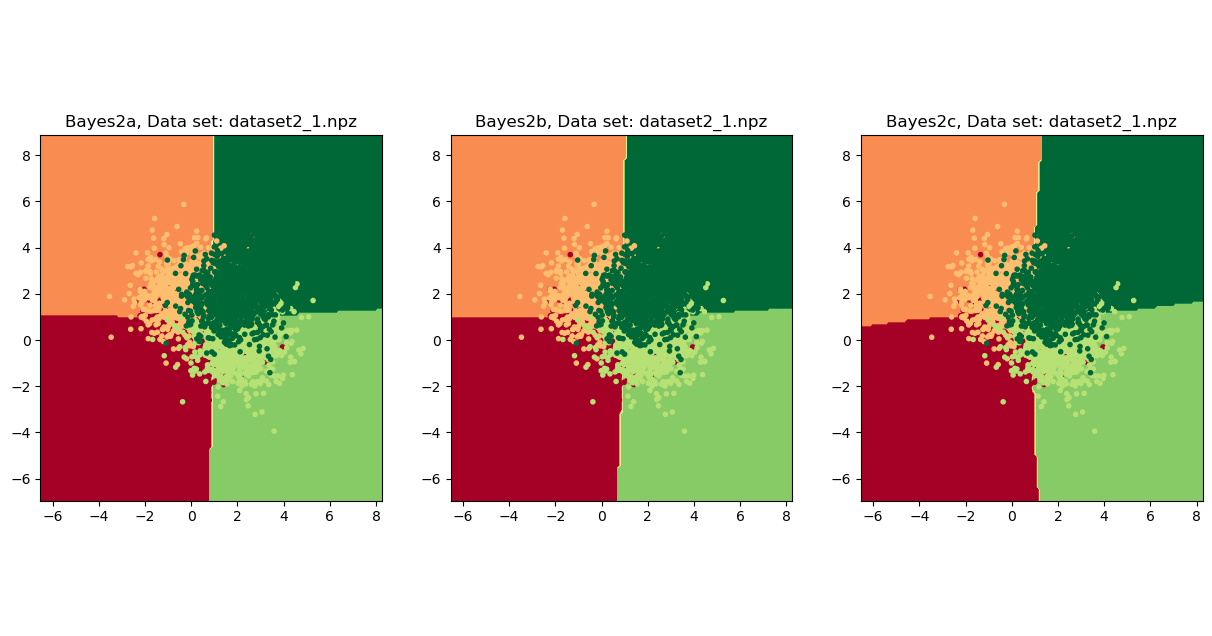

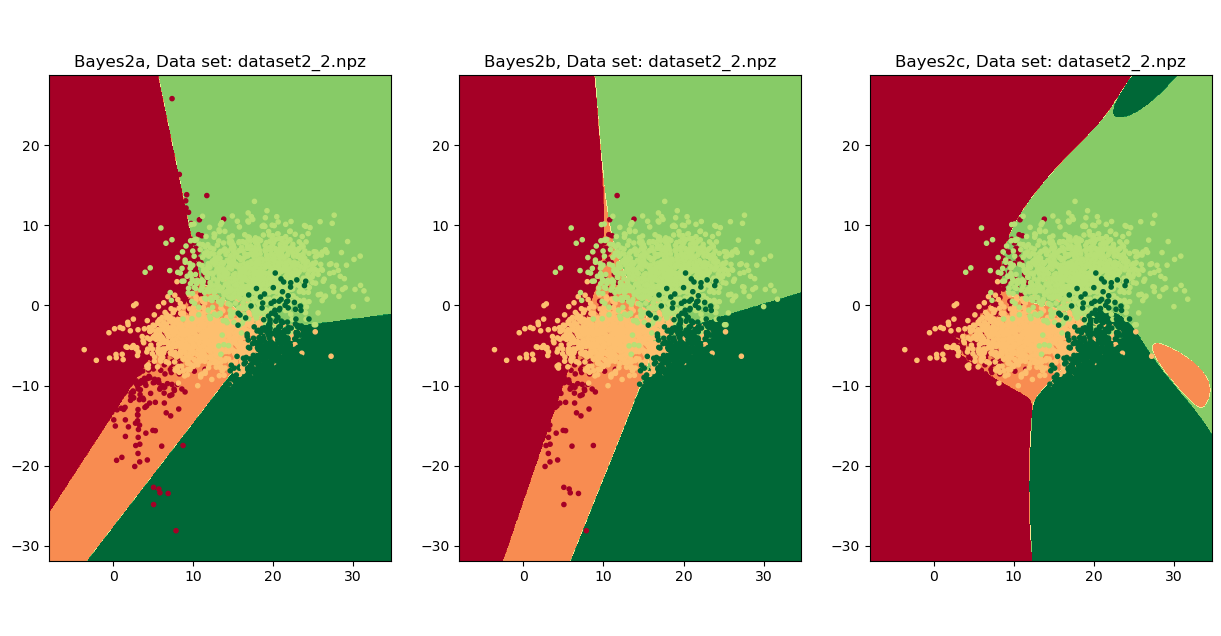

In [53]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

L = np.array([[0,1,2,3],
              [1,0,1,2],
              [2,1,0,1],
              [3,2,1,0]])
for f in ['../../Data/dataset2_1.npz', '../../Data/dataset2_2.npz']:
    d = np.load(f)
    X_train = d['arr_0']
    Y_train = d['arr_1']
    X_test  = d['arr_2']
  
    fig = plt.figure(figsize=(15,8))
    plt.axis('off')
    a = 1
  
    for j in [Bayes2a,Bayes2b,Bayes2c]:
        strs = ['Bayes2a','Bayes2b','Bayes2c']
        X,Y = np.meshgrid(np.arange(min(X_train[:,0])-3,max(X_train[:,0])+3,0.1), np.arange(min(X_train[:,1])-3,max(X_train[:,1])+3,0.1))
        z = np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1)
        Z_pred = j(X_train,Y_train,z)
        Z = Z_pred.reshape(X.shape)
        ax1 = fig.add_subplot(1,3,a)

        ax1.contourf(X,Y,Z,cmap='RdYlGn',extend = 'both')
        Y_test_pred = j(X_train,Y_train,X_test)
        ax1.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap ='RdYlGn',marker = '.')
        '''for i in range(len(X_train)):
            if Y_train[i] == 1:
                ax1.scatter(X_train[i][0],X_train[i][1],marker = ".",color = 'red')
            if Y_train[i] == 3:
                ax1.scatter(X_train[i][0],X_train[i][1],marker = ".",color = 'blue')
            if Y_train[i] == 2:
                ax1.scatter(X_train[i][0],X_train[i][1],marker = ".", color = 'green')

            if Y_train[i] == 4:
                ax1.scatter(X_train[i][0],X_train[i][1],marker = ".", color = 'purple')'''
        '''for i in range(len(X_test)):
            if Y_test_pred[i] == 1:
                ax1.scatter(X_test[i][0],X_test[i][1],color = 'white')
            if Y_test_pred[i] == -1:
                ax1.scatter(X_test[i][0],X_test[i][1],color = 'black')'''
        ax1.set(adjustable='box', aspect='equal')
        ax1.title.set_text(strs[a-1]+', Data set: '+f)
        a = a+1
    
    fig.show()


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

Expected Loss matrix for Test sets Ex(min_j R(h)):
-----
|Classifiers->|Bayes2a|Bayes2b|Bayes2c|
|:---------|:------|:------|:------|
|dataset2_1.npz|0.4467287276039956|0.45121526211606244|0.45139999336114045|
|dataset2_2.npz|0.012631236803349783|0.20844292788556765|0.1422780348963601|


Expected Loss matrix based on Y_test and Y_pred:
-----
|Classifiers->|Bayes2a|Bayes2b|Bayes2c|
|:---------|:------|:------|:------|
|dataset2_1.npz|0.42975|0.429|0.431|
|dataset2_2.npz|0.1835|0.1895|0.15175|



Confusion Matrix of Bayes2a and Datset dataset2_1.npz        
---- 
|Prediction-->|1|2|3|4|
|:---------|:----|:----|:----|:----|
|True 1|633| 219| 136|  12|
|True 2|97 |738 | 62 |103|
|True 3|86 | 49 | 770|  95|
|True 4|15 |136 |194 |655|


Confusion Matrix of Bayes2b and Datset dataset2_1.npz        
---- 
|Prediction-->|1|2|3|4|
|:---------|:----|:----|:----|:----|
|True 1|633| 218| 137|  12|
|True 2|95 |743 | 60 |102|
|True 3|84 | 49 | 773|  94|
|True 4|16 |137 |196 |651|

Confusion Matrix of Bayes2c and Datset dataset2_1.npz        
---- 
|Prediction-->|1|2|3|4|
|:---------|:----|:----|:----|:----|
|True 1|630| 216| 140|  14|
|True 2|101 |734 | 61 |104|
|True 3|84 | 47 | 772|  97|
|True 4|15 |129|201 |655|

Confusion Matrix of Bayes2a and Datset dataset2_2.npz        
---- 
|Prediction-->|1|2|3|4|
|:---------|:----|:----|:----|:----|
|True 1|830| 150| 18|  2|
|True 2|93 |784 | 46 |77|
|True 3|30 | 61 | 905| 4|
|True 4|0 |23|708 |899|


Confusion Matrix of Bayes2b and Datset dataset2_2.npz        
---- 
|Prediction-->|1|2|3|4|
|:---------|:----|:----|:----|:----|
|True 1|891| 106| 3|  0|
|True 2|119 |691 | 124 |66|
|True 3|23 | 106 | 864| 7|
|True 4|0 |5|102 |893|

Confusion Matrix of Bayes2c and Datset dataset2_2.npz        
---- 
|Prediction-->|1|2|3|4|
|:---------|:----|:----|:----|:----|
|True 1|809| 166| 25|  0|
|True 2|25 |875 | 38 |62|
|True 3|15 | 35 | 934| 16|
|True 4|0 |40|43 |917|


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




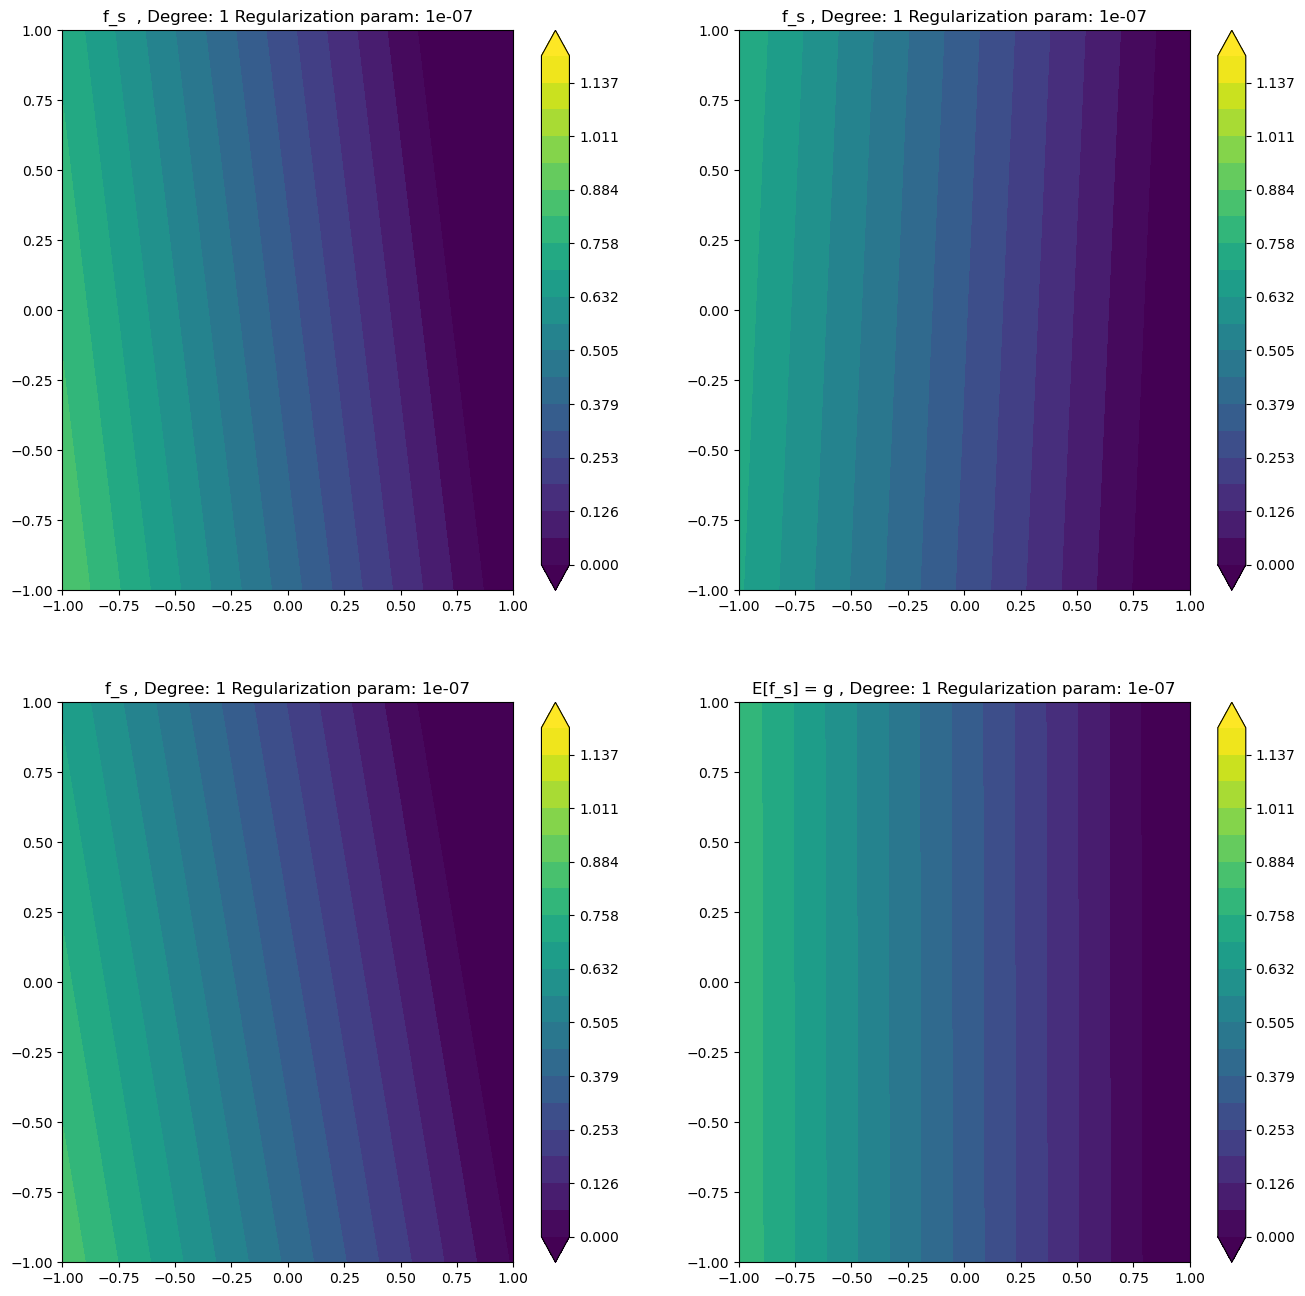

Degree= 1 lambda= 1e-07
Bias = 0.24682396806042764
Variance = 0.003982692907005071
MSE = 0.06490476411610008


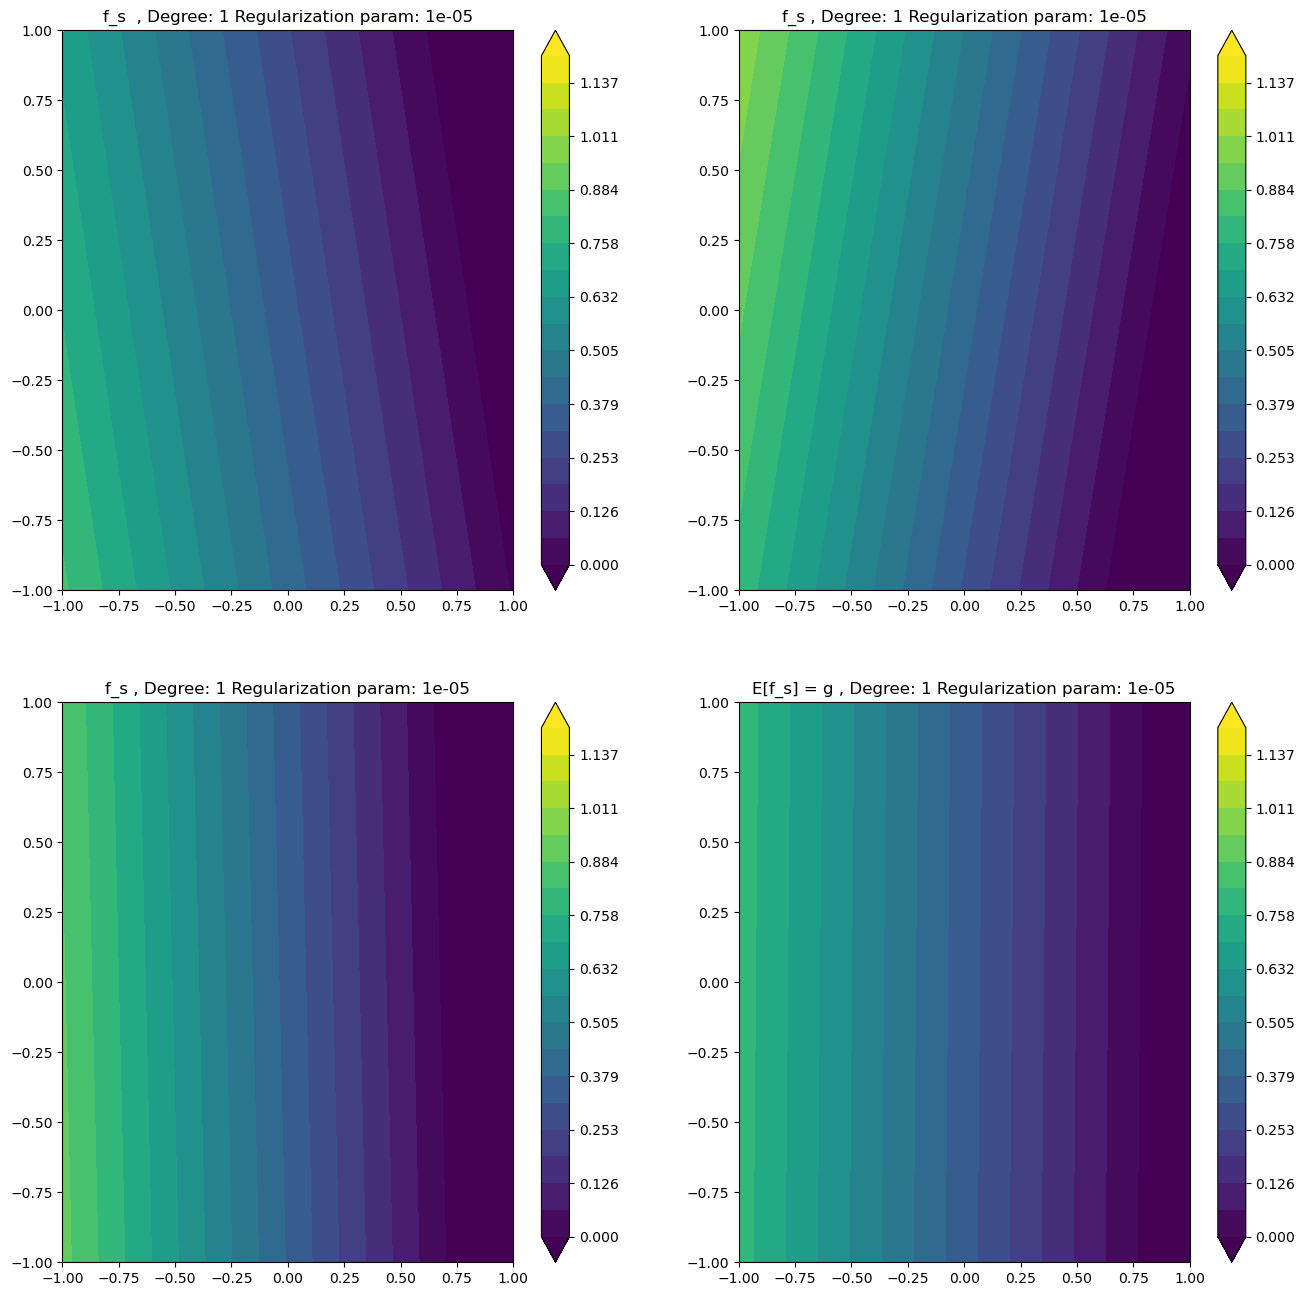

Degree= 1 lambda= 1e-05
Bias = 0.24658276122742415
Variance = 0.0038109020997400185
MSE = 0.06461396023428088


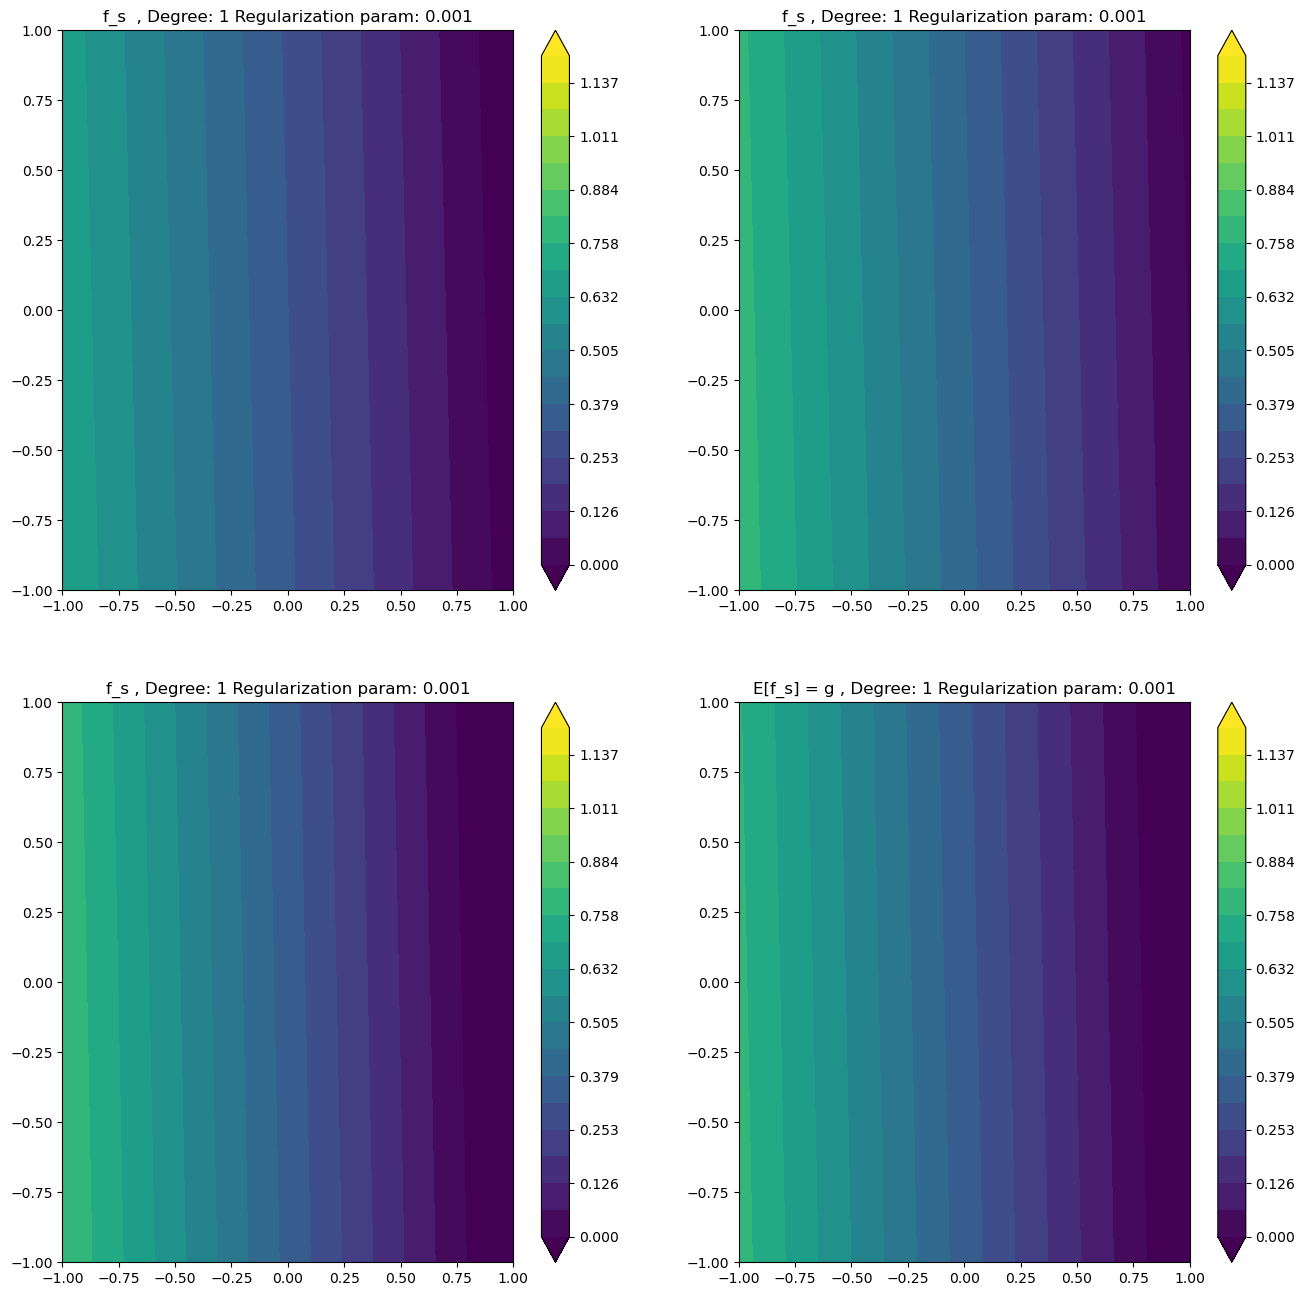

Degree= 1 lambda= 0.001
Bias = 0.24665165972340192
Variance = 0.0035734805680085074
MSE = 0.06441052181231736


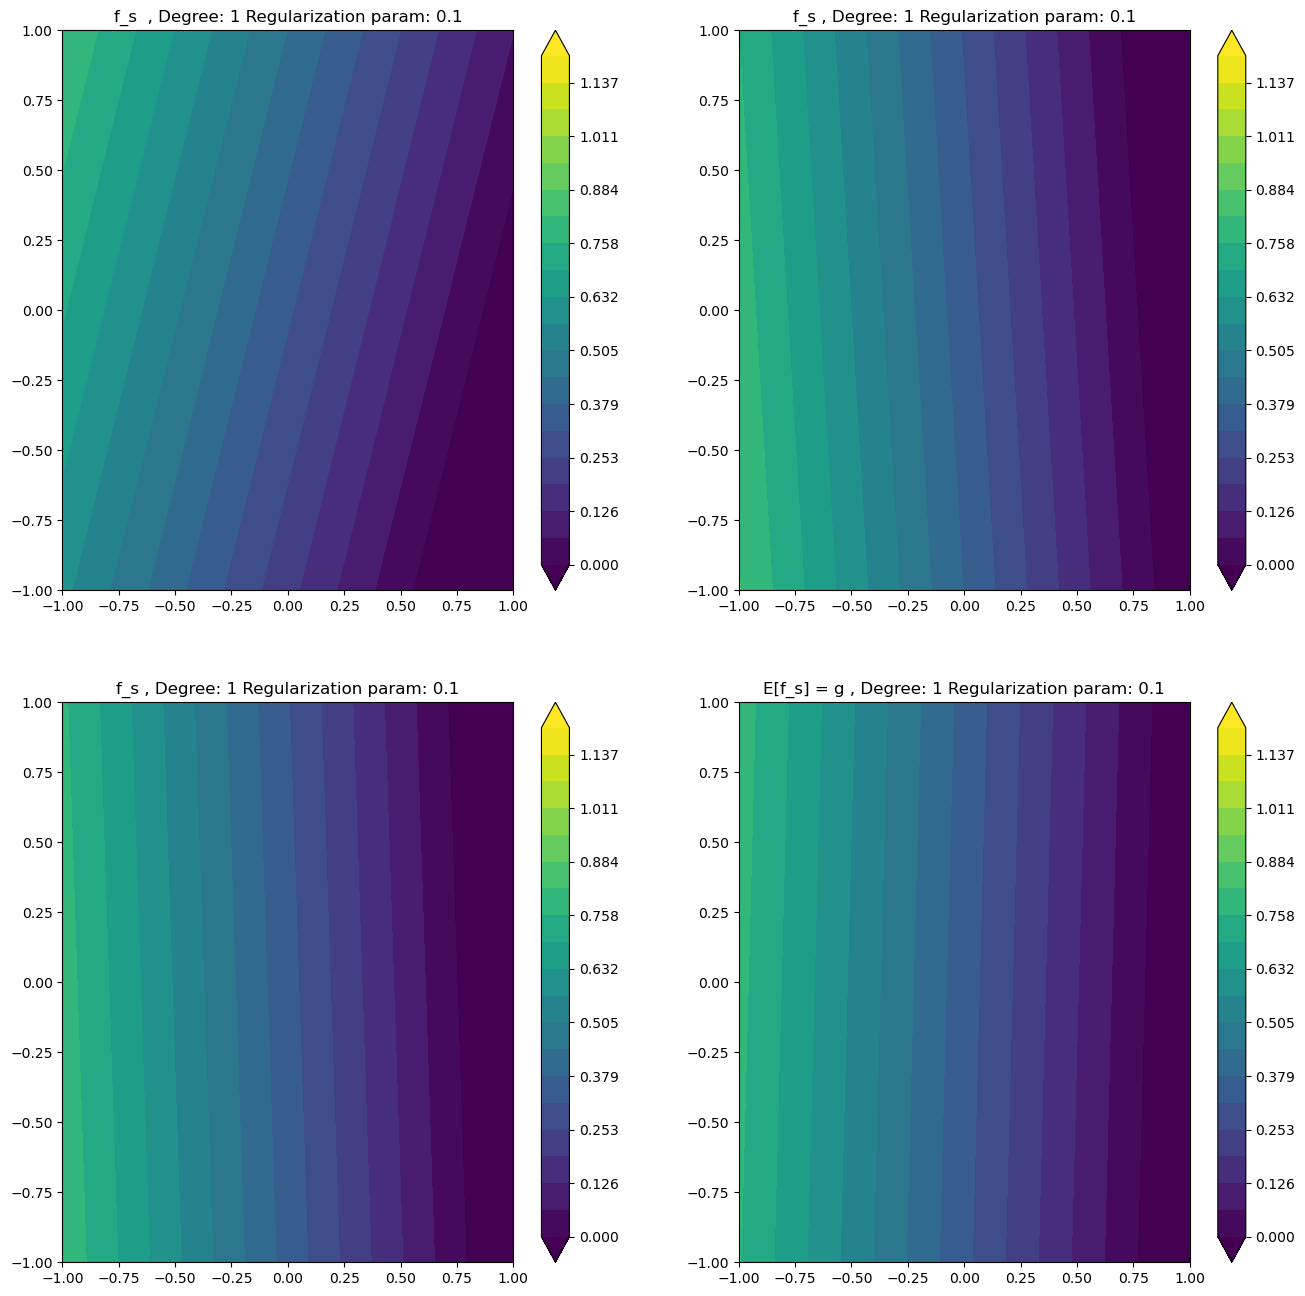

Degree= 1 lambda= 0.1
Bias = 0.2466481416311961
Variance = 0.0042610648270928215
MSE = 0.06509637059721539


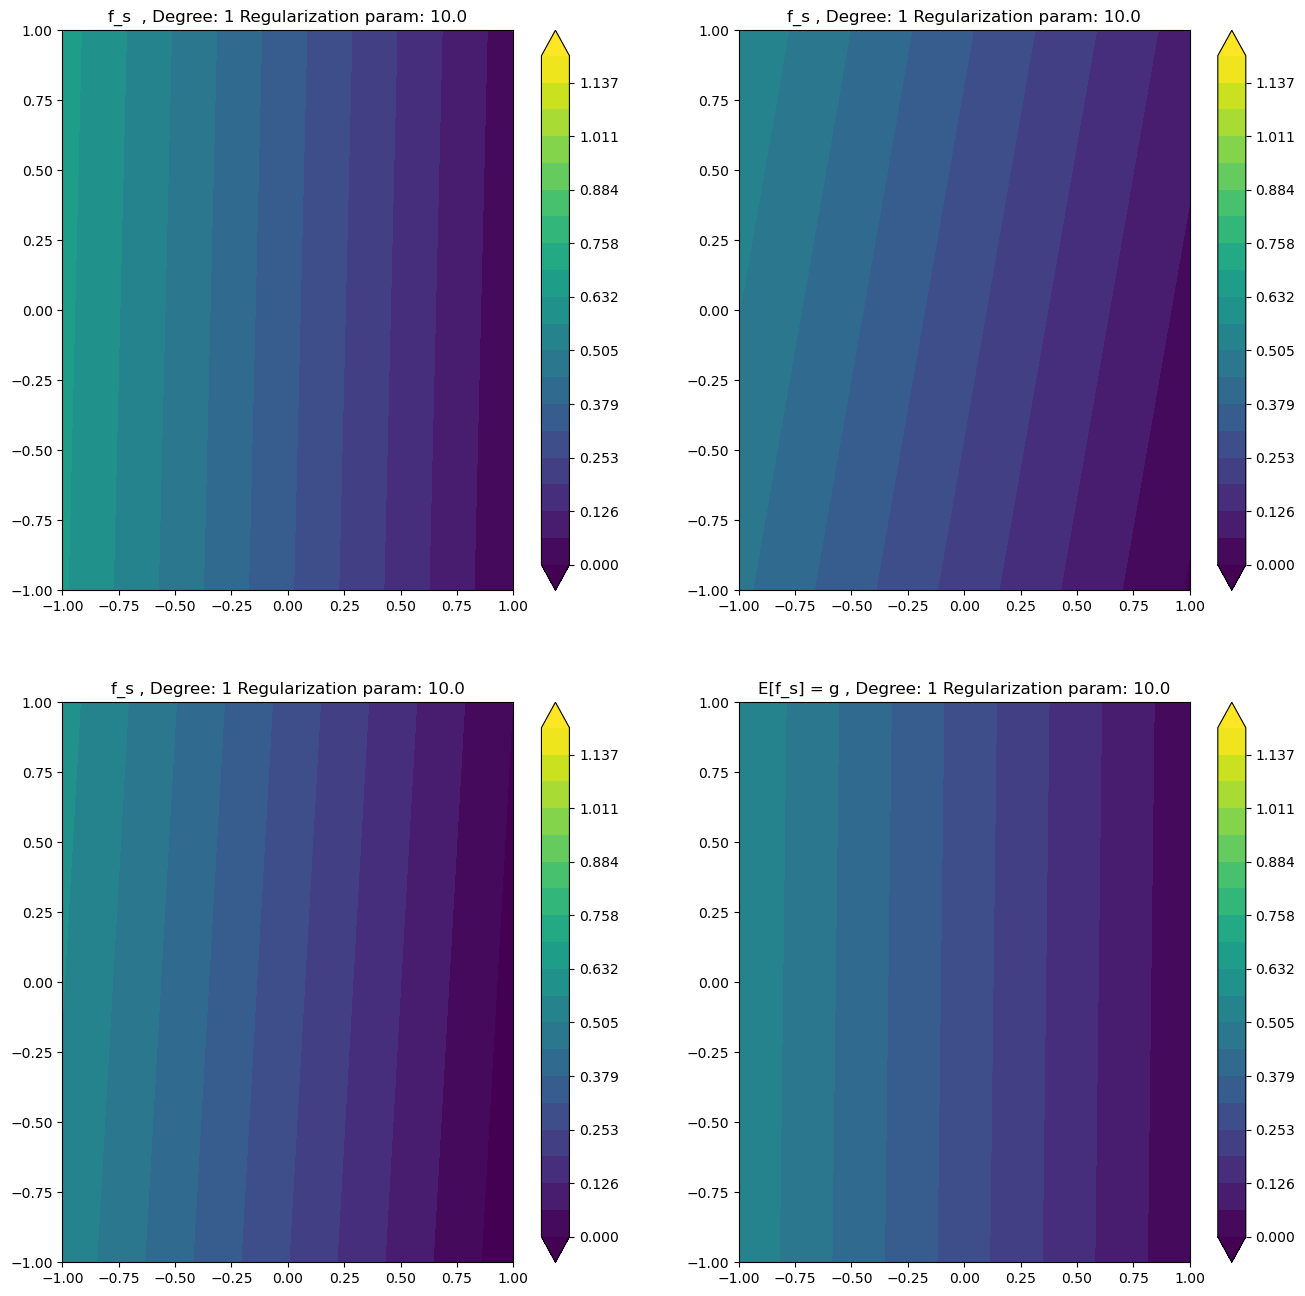

Degree= 1 lambda= 10.0
Bias = 0.27089833771544564
Variance = 0.0020572813486356154
MSE = 0.07544319072562726


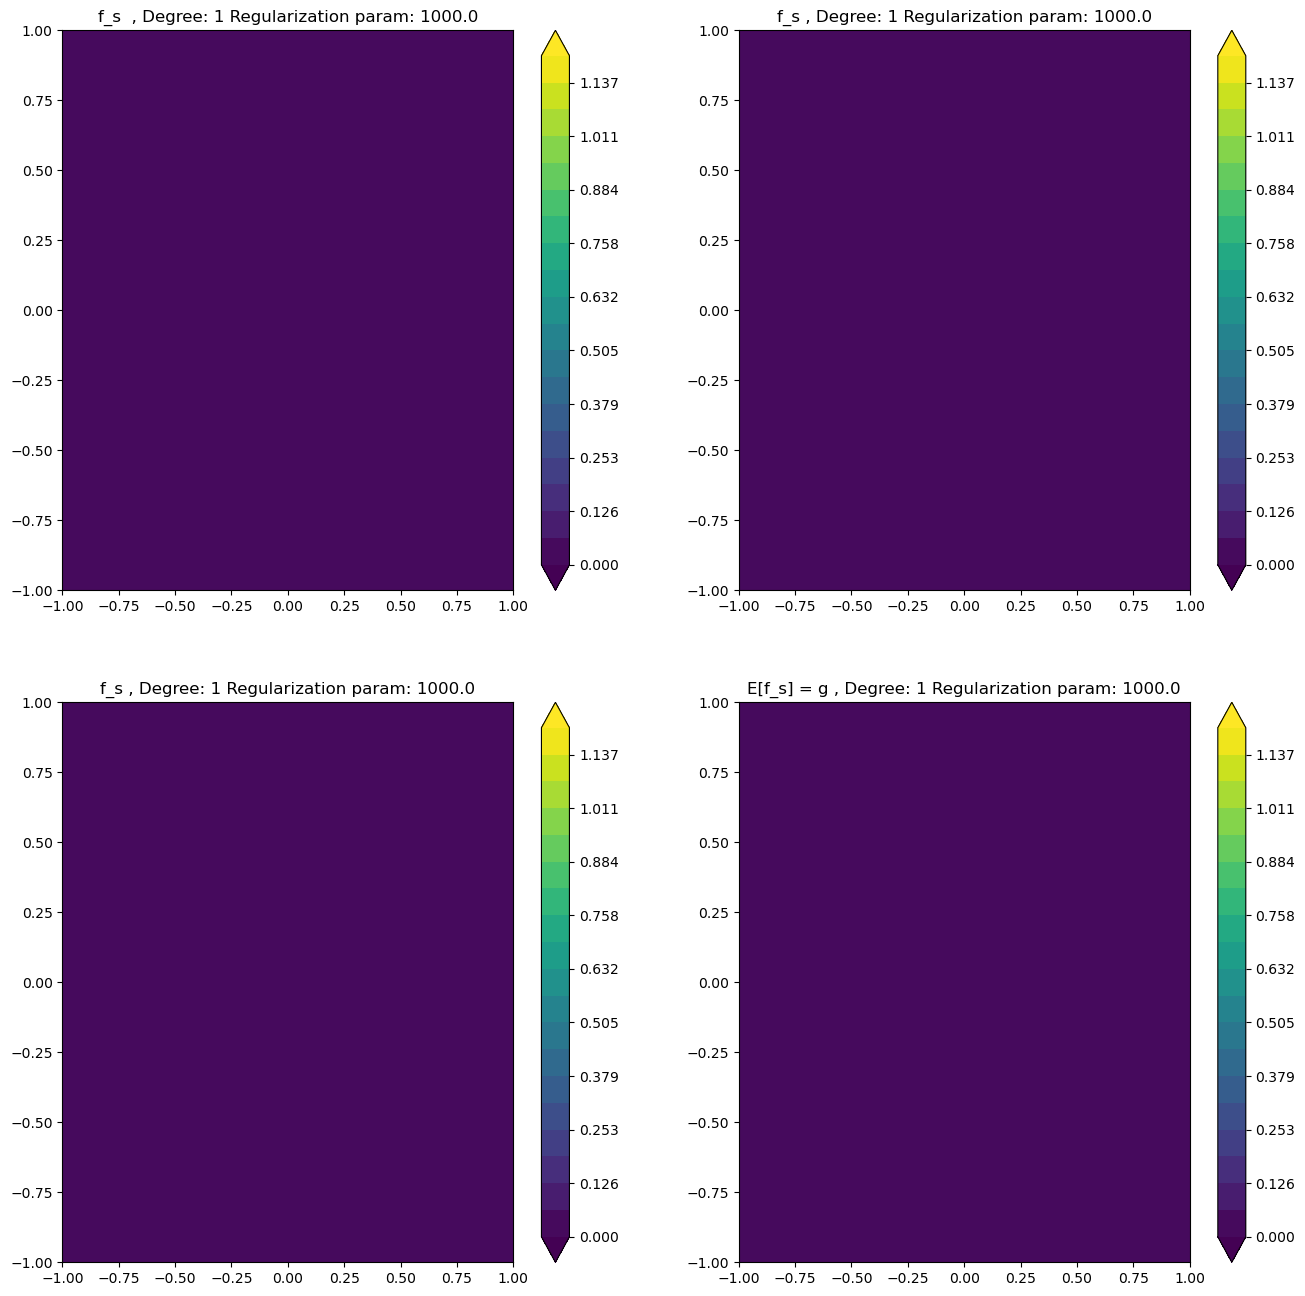

Degree= 1 lambda= 1000.0
Bias = 0.481068755596808
Variance = 7.192238124622906e-06
MSE = 0.23143433984958603


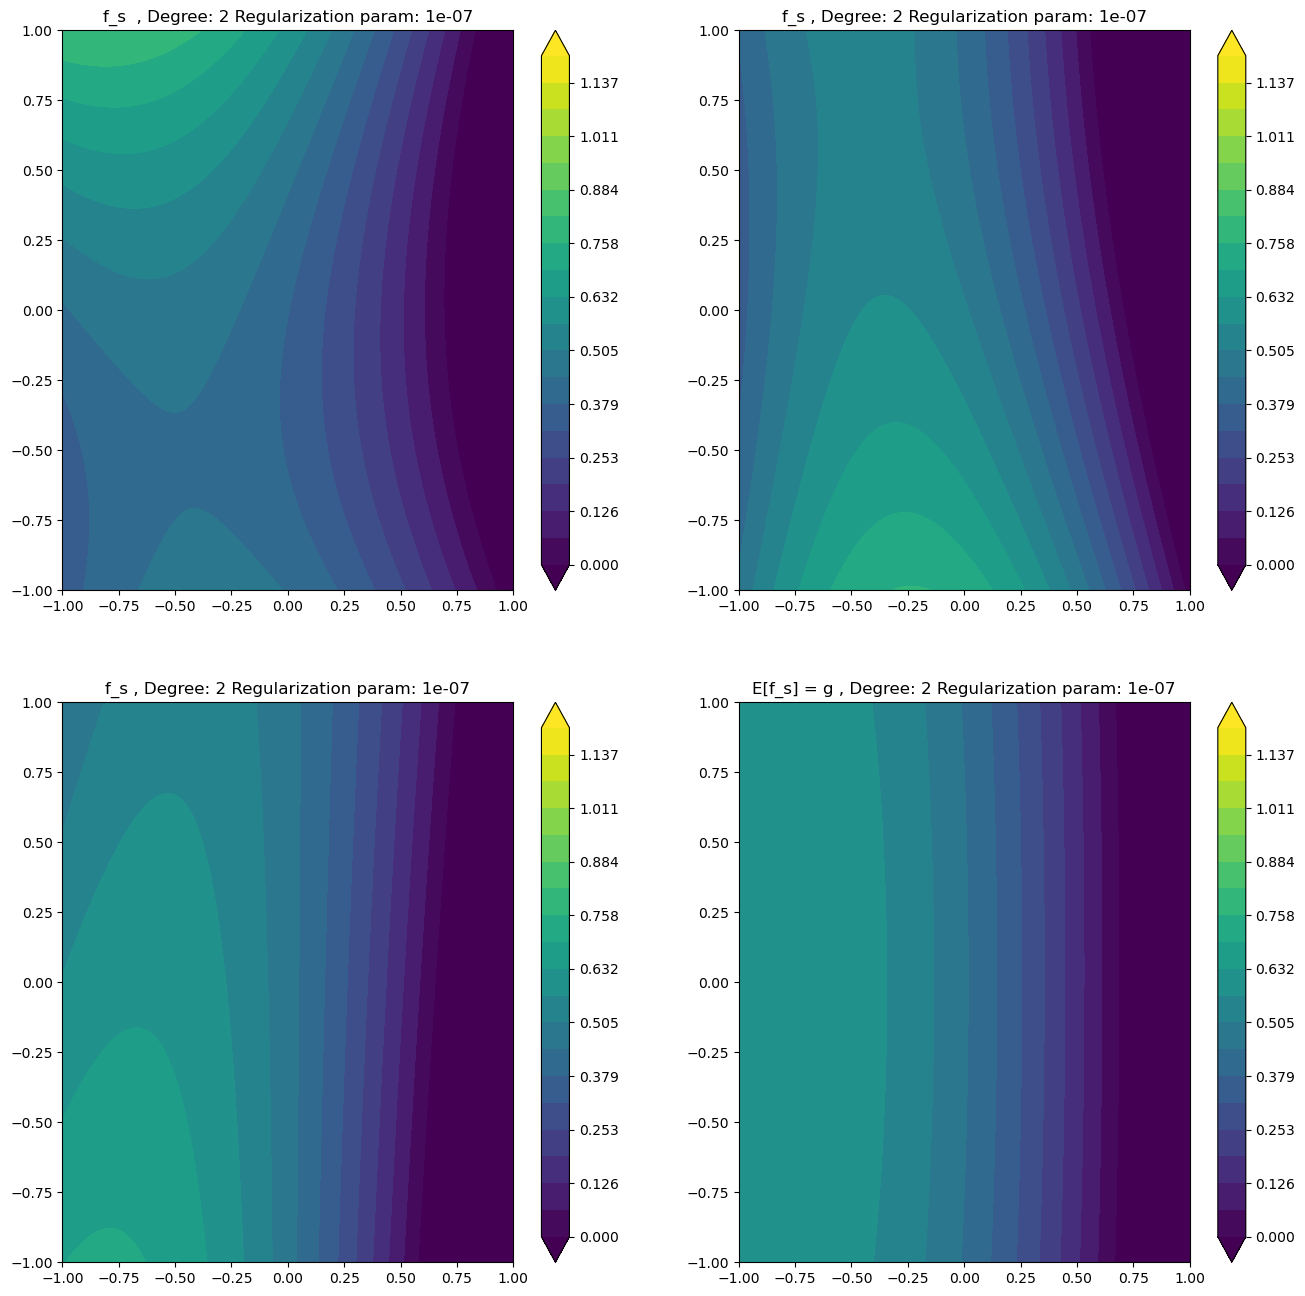

Degree= 2 lambda= 1e-07
Bias = 0.23167791704971336
Variance = 0.009134524420851718
MSE = 0.06280918166934557


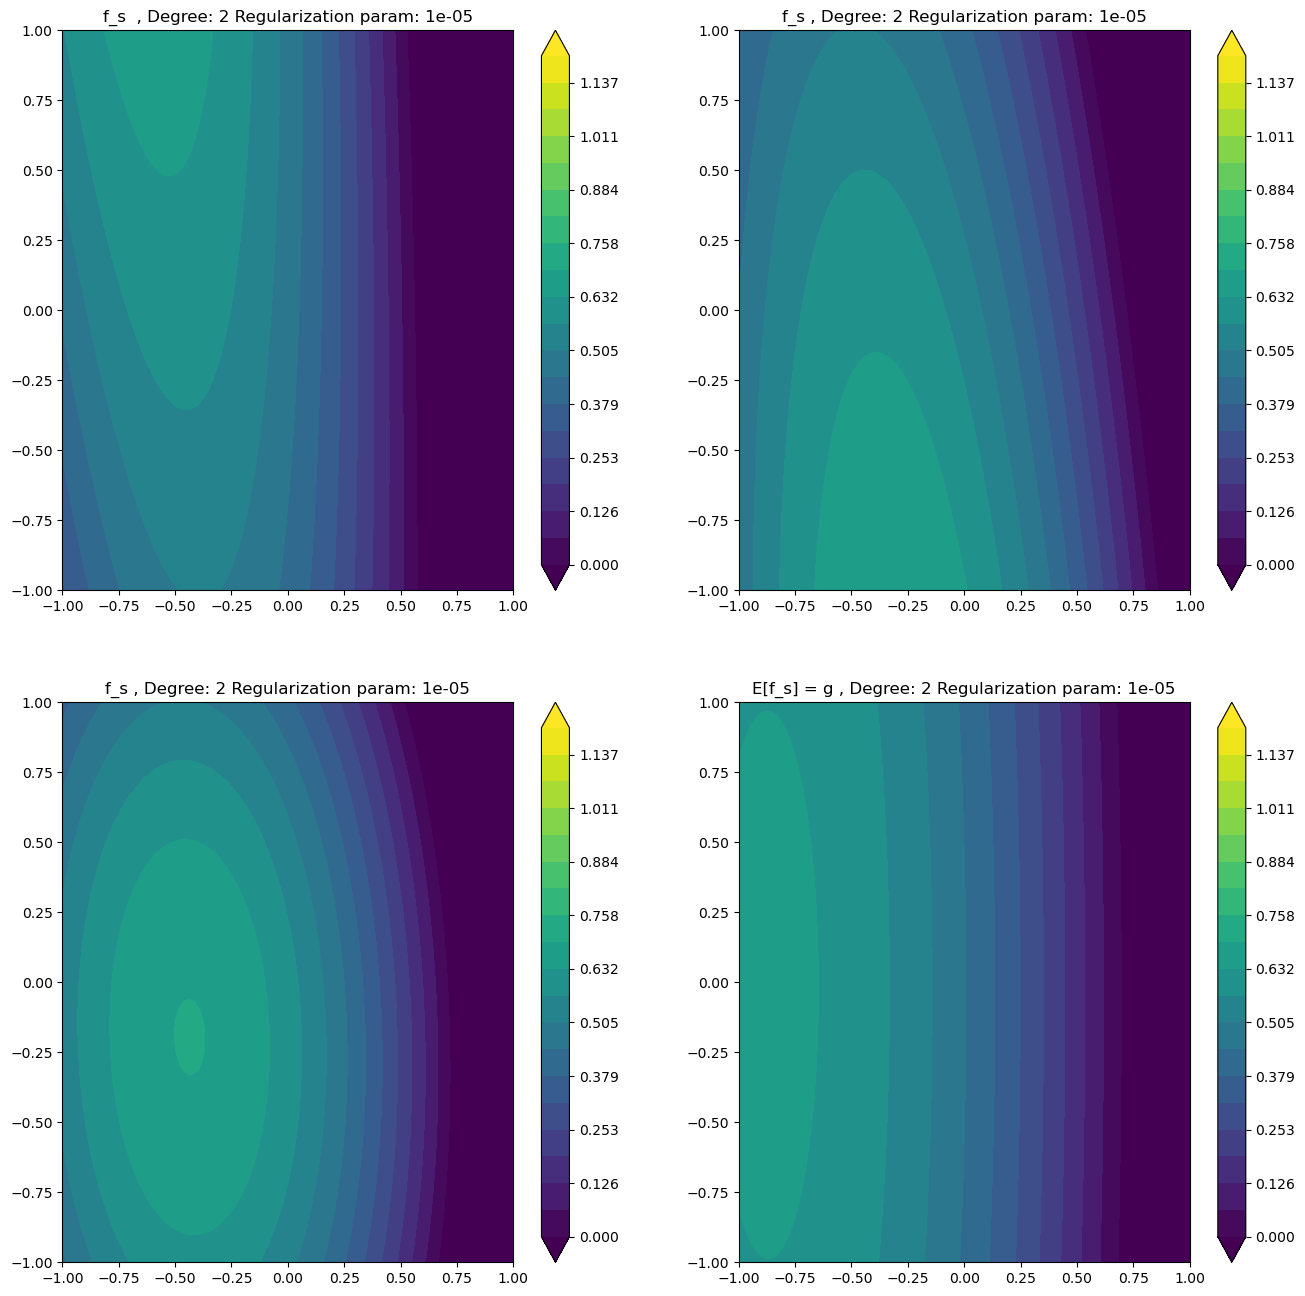

Degree= 2 lambda= 1e-05
Bias = 0.23190749013284936
Variance = 0.0092733967899454
MSE = 0.06305448076966302


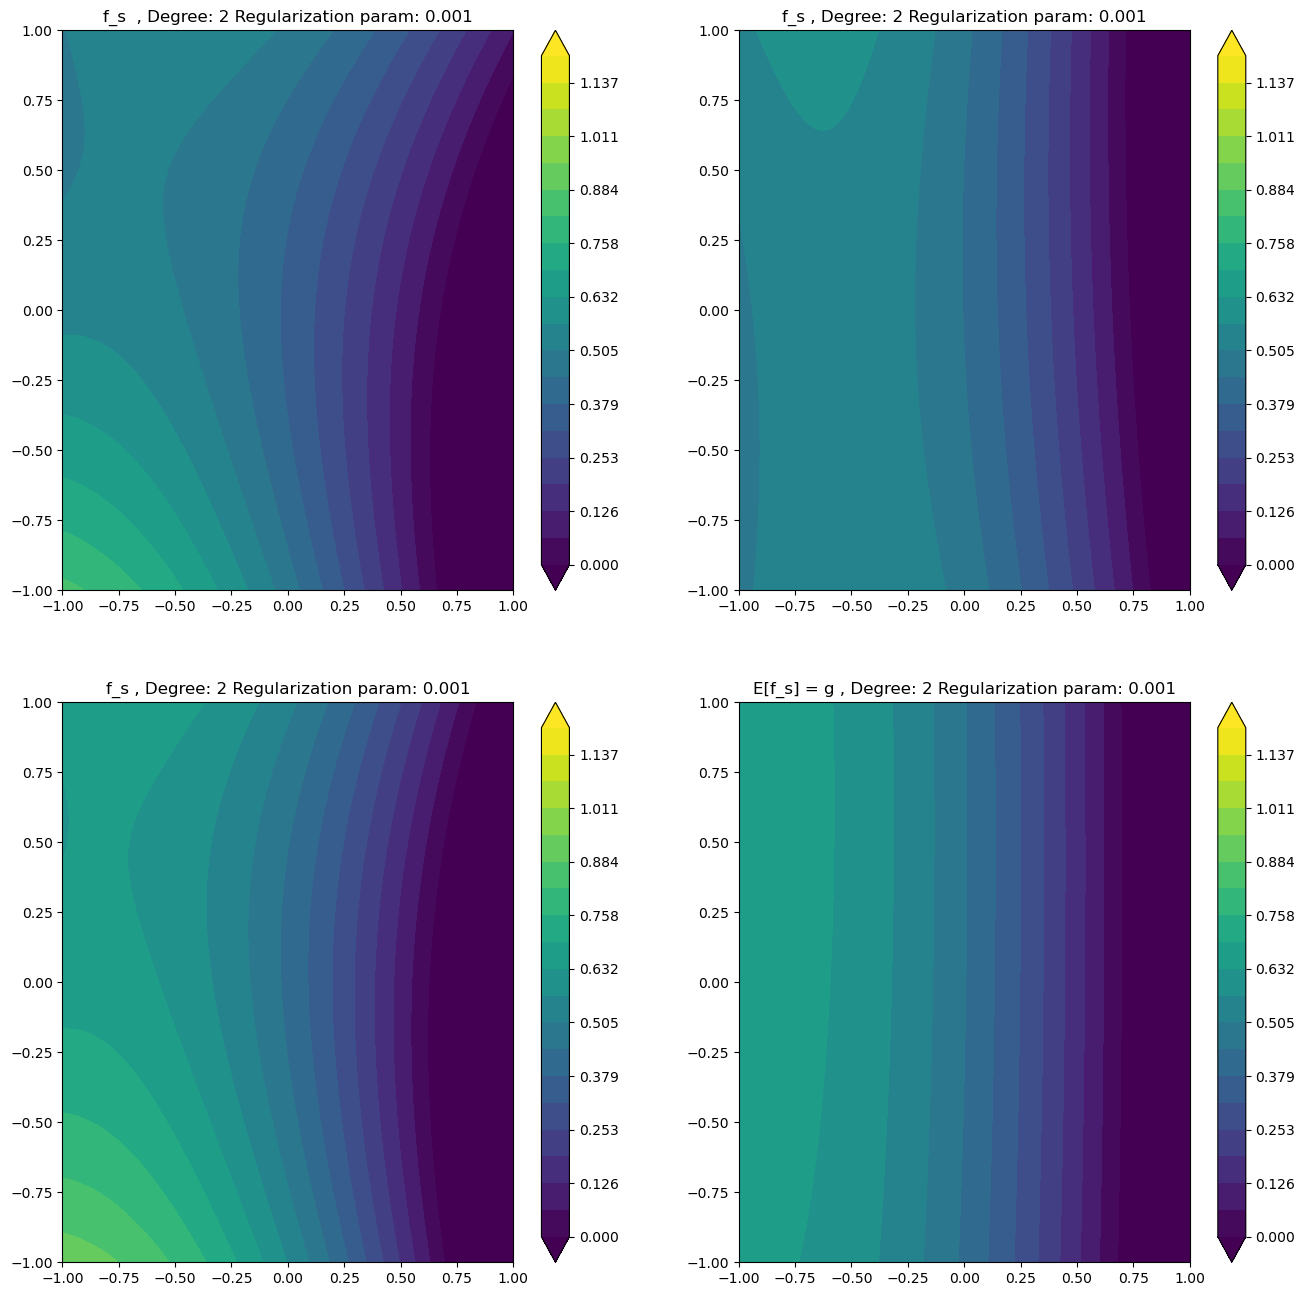

Degree= 2 lambda= 0.001
Bias = 0.23242276231559267
Variance = 0.008518499881620992
MSE = 0.06253884032403148


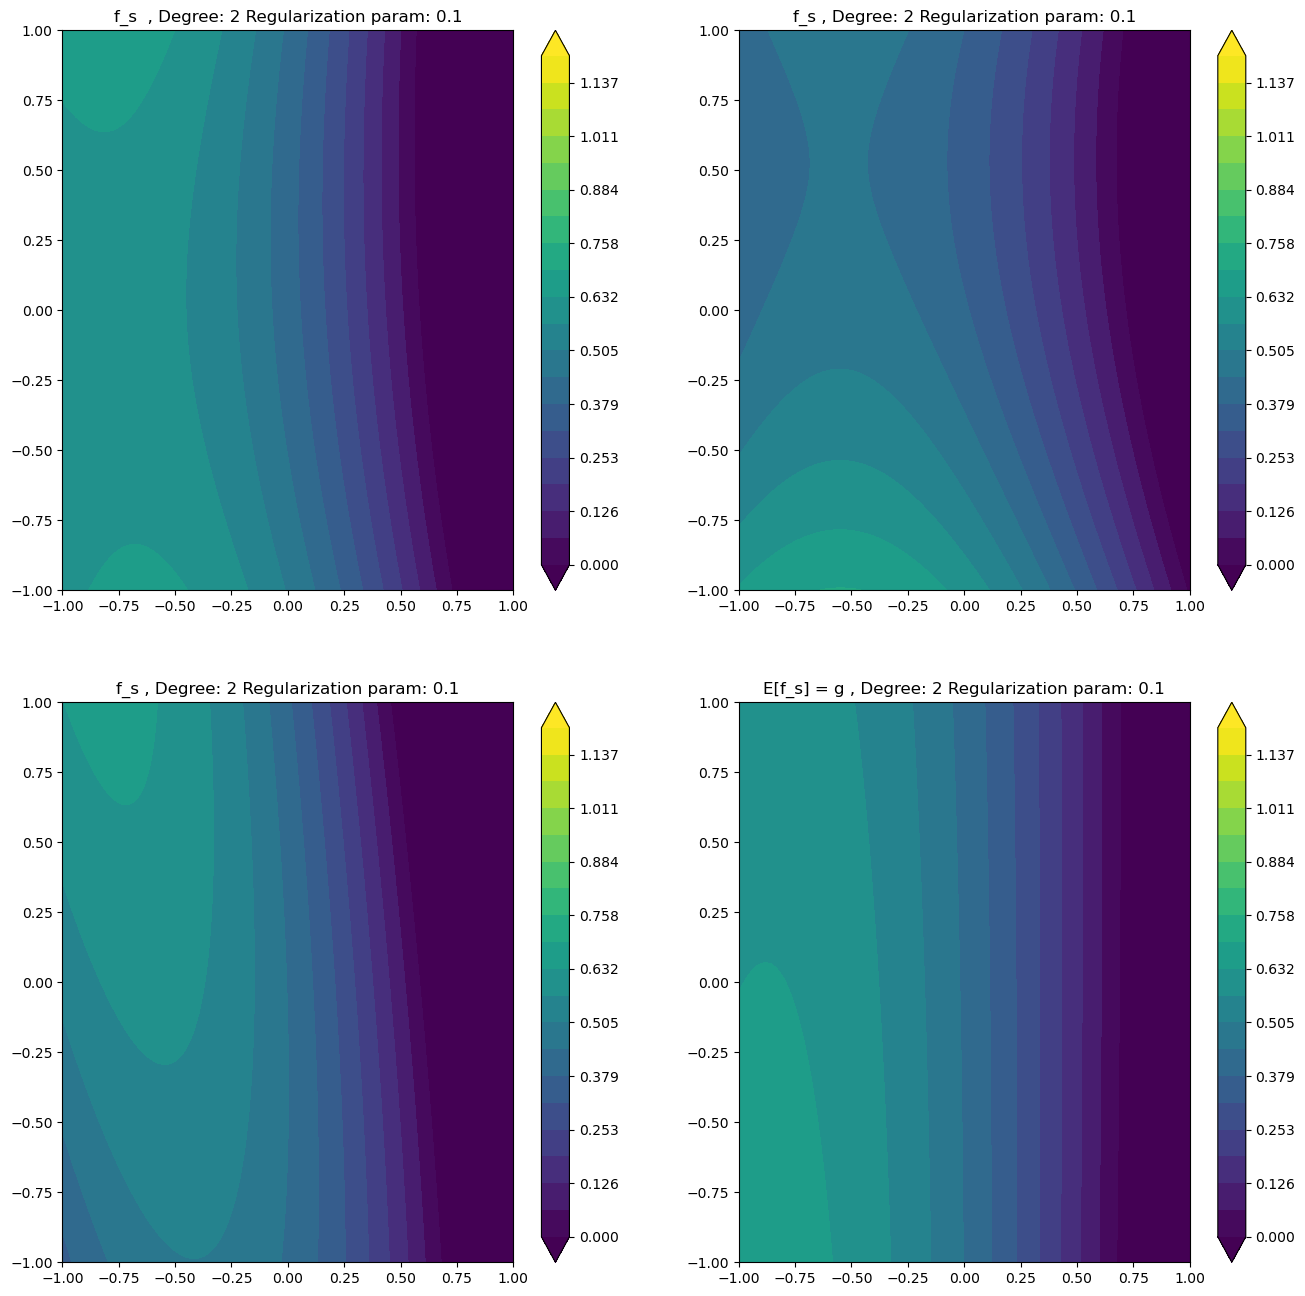

Degree= 2 lambda= 0.1
Bias = 0.2319417785853386
Variance = 0.008368766505030047
MSE = 0.06216575515836028


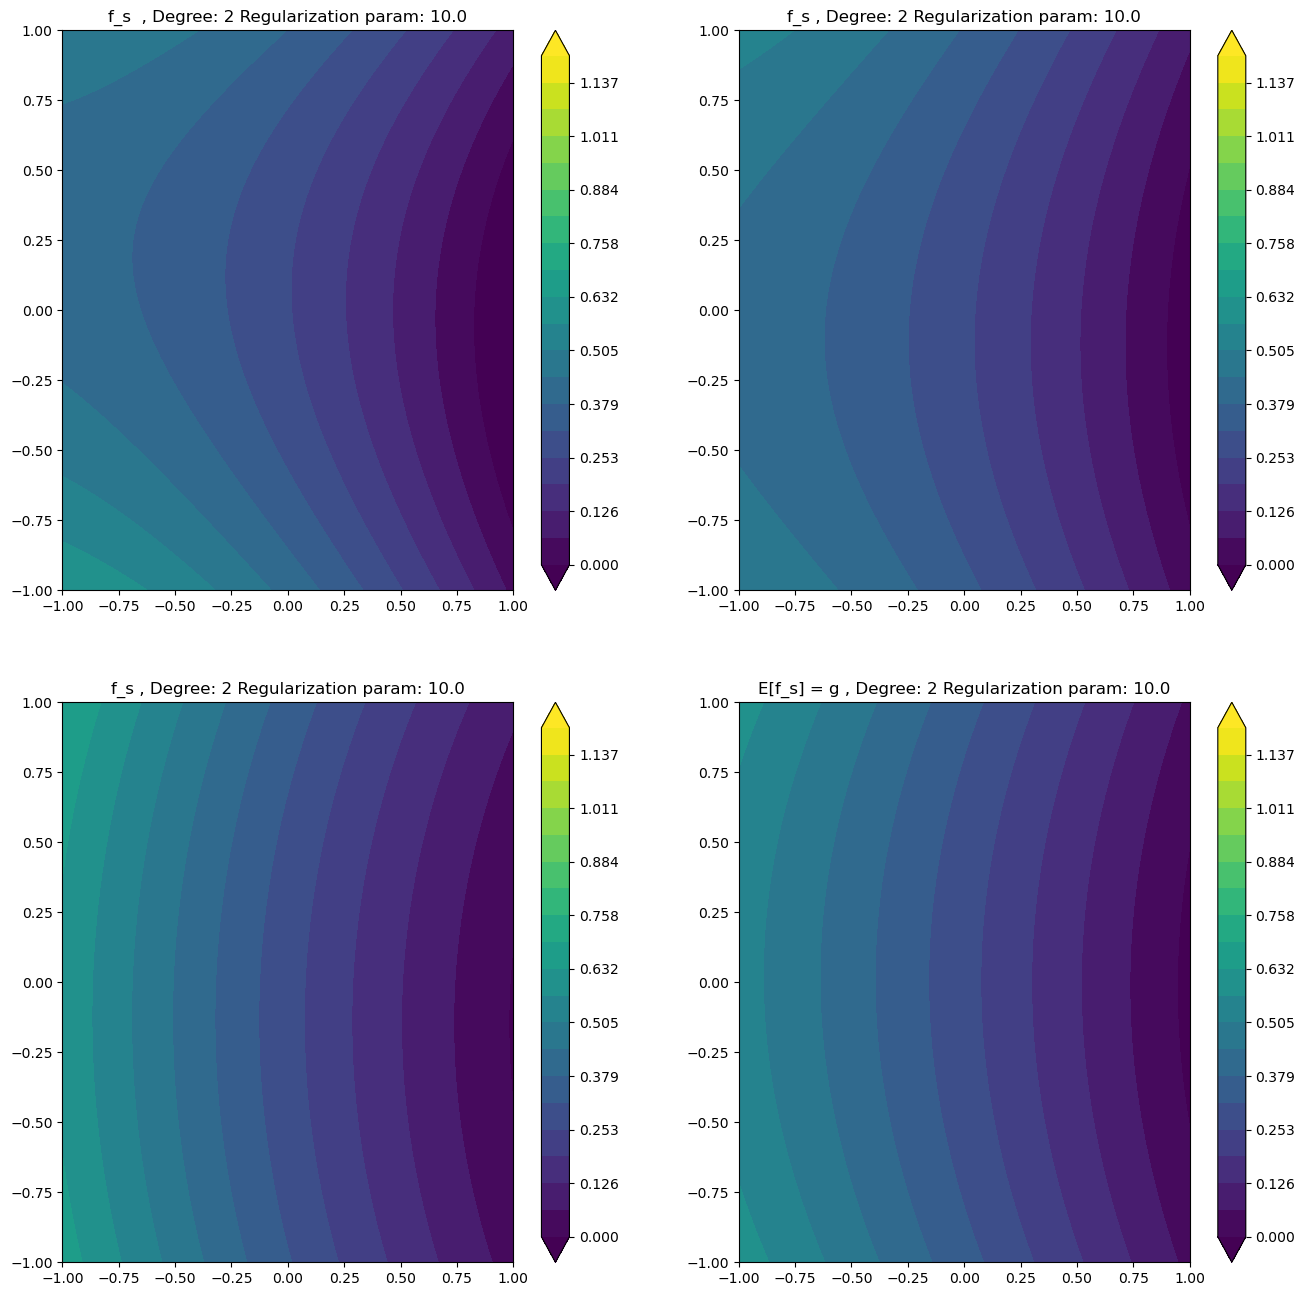

Degree= 2 lambda= 10.0
Bias = 0.2688667834611669
Variance = 0.0026290375613323017
MSE = 0.07491838481008631


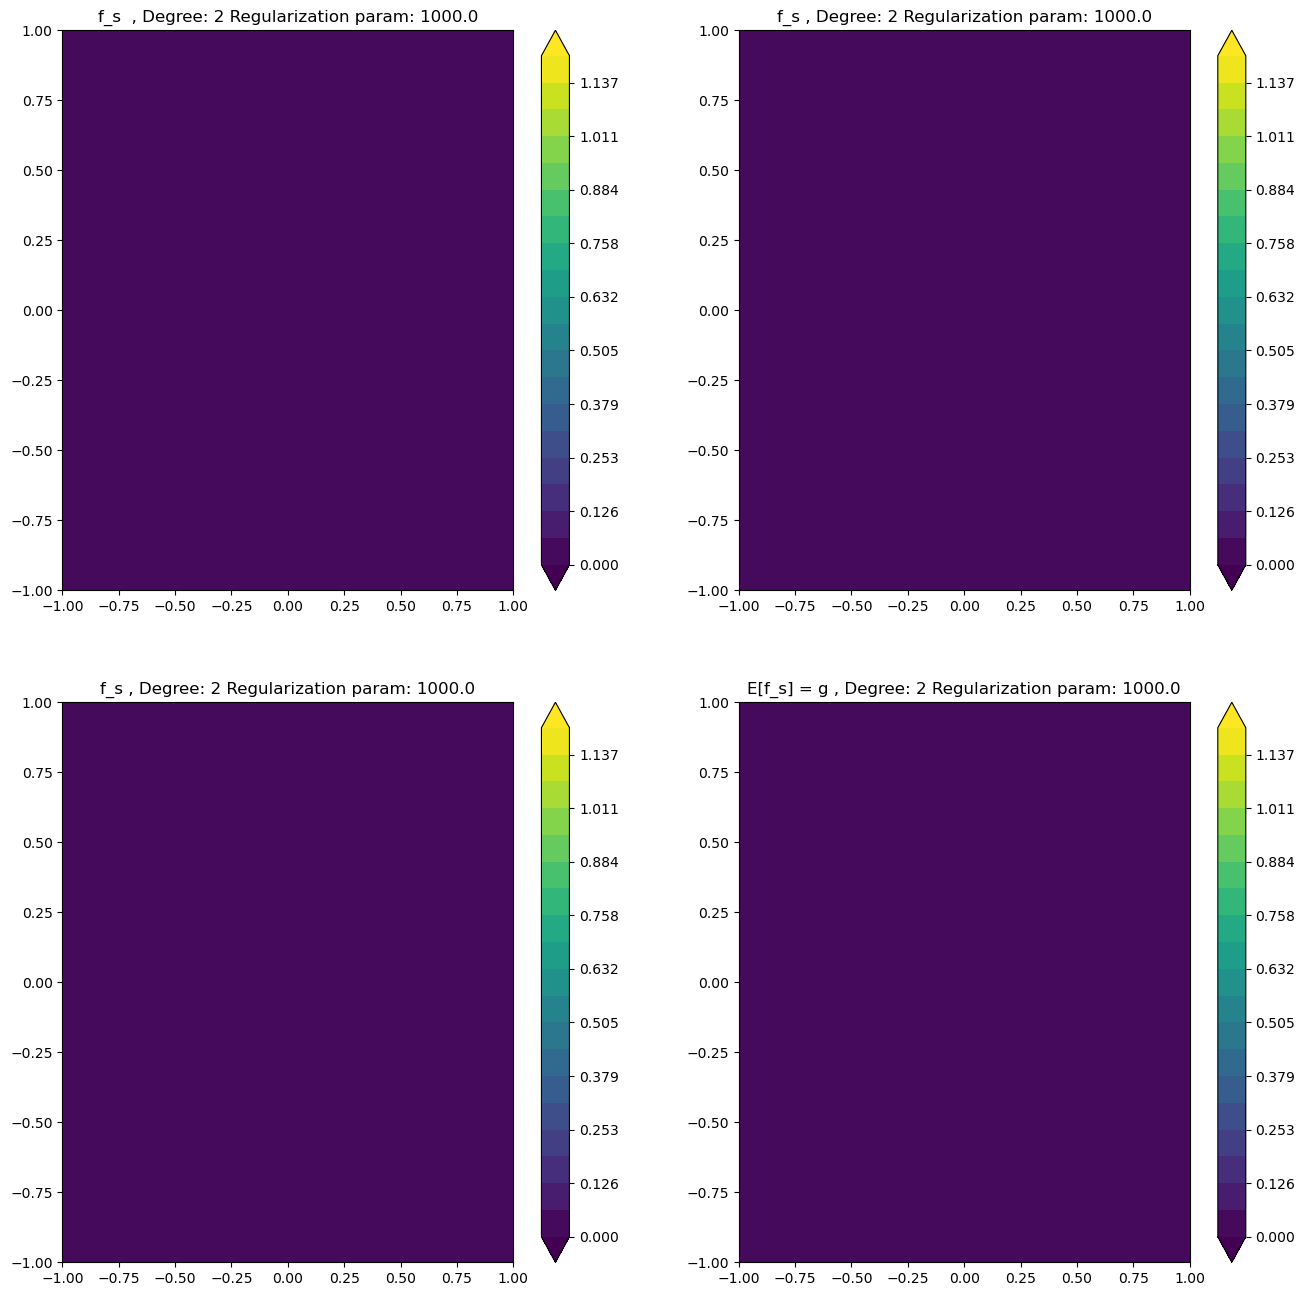

Degree= 2 lambda= 1000.0
Bias = 0.47953788230481914
Variance = 1.0798495199907358e-05
MSE = 0.22996737906059048


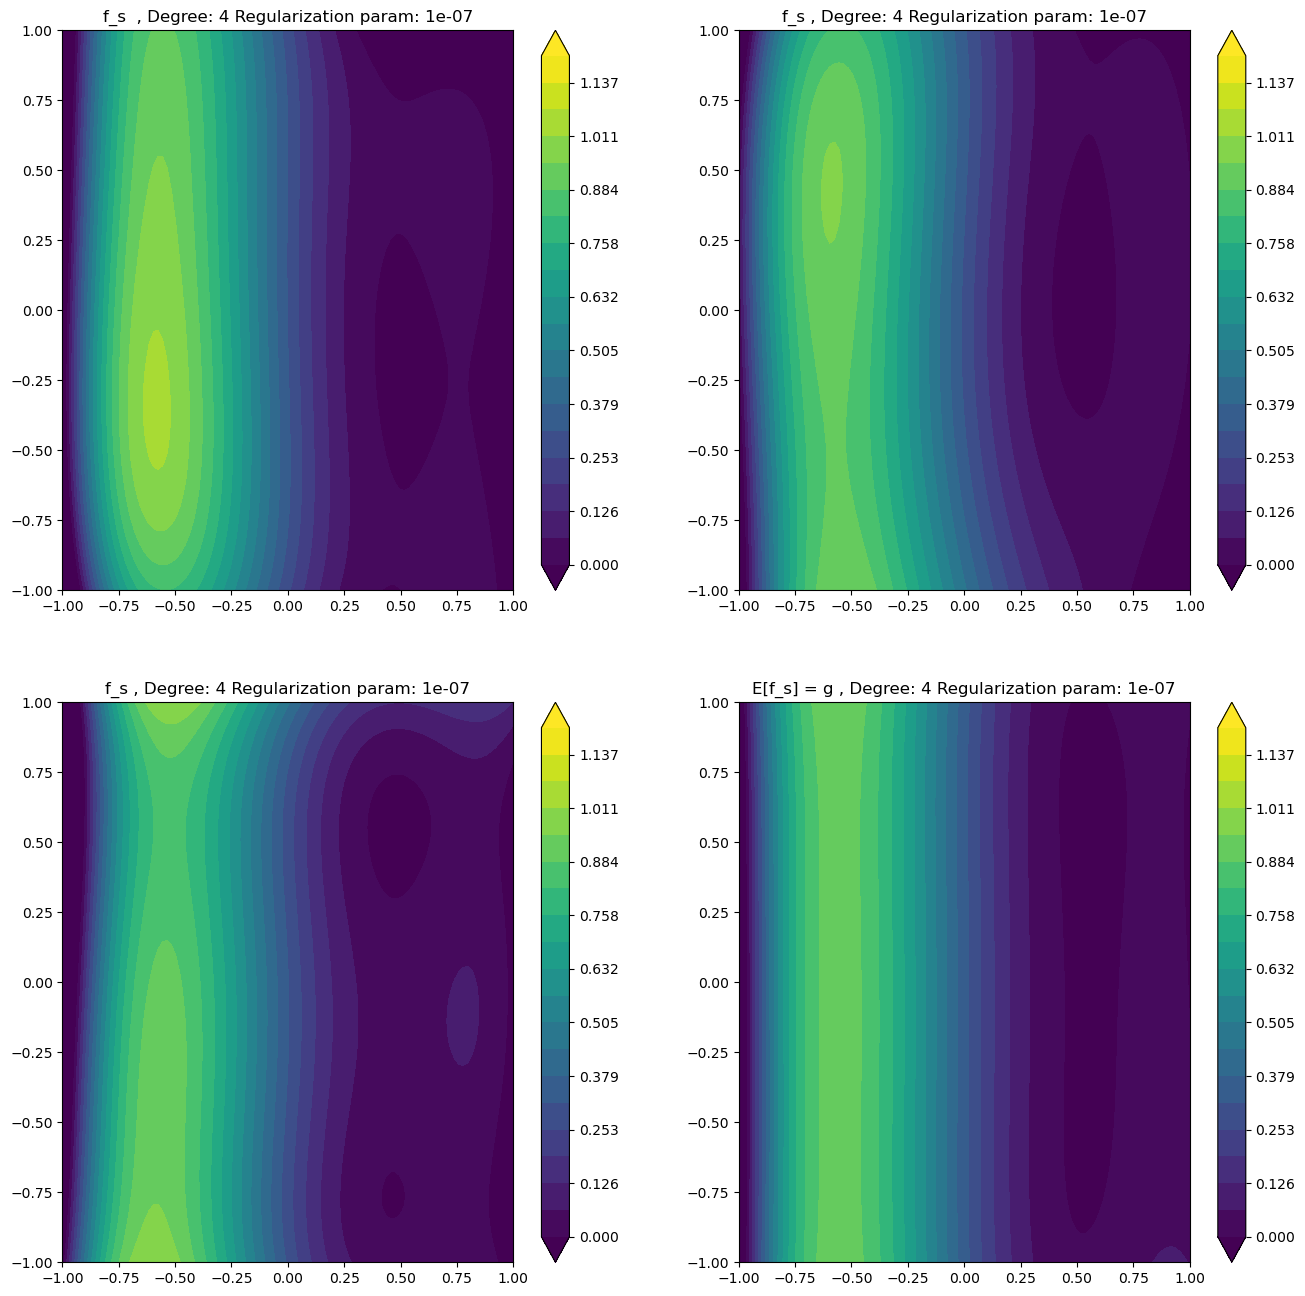

Degree= 4 lambda= 1e-07
Bias = 0.07786967550311029
Variance = 0.00671157782896358
MSE = 0.012775264191923274


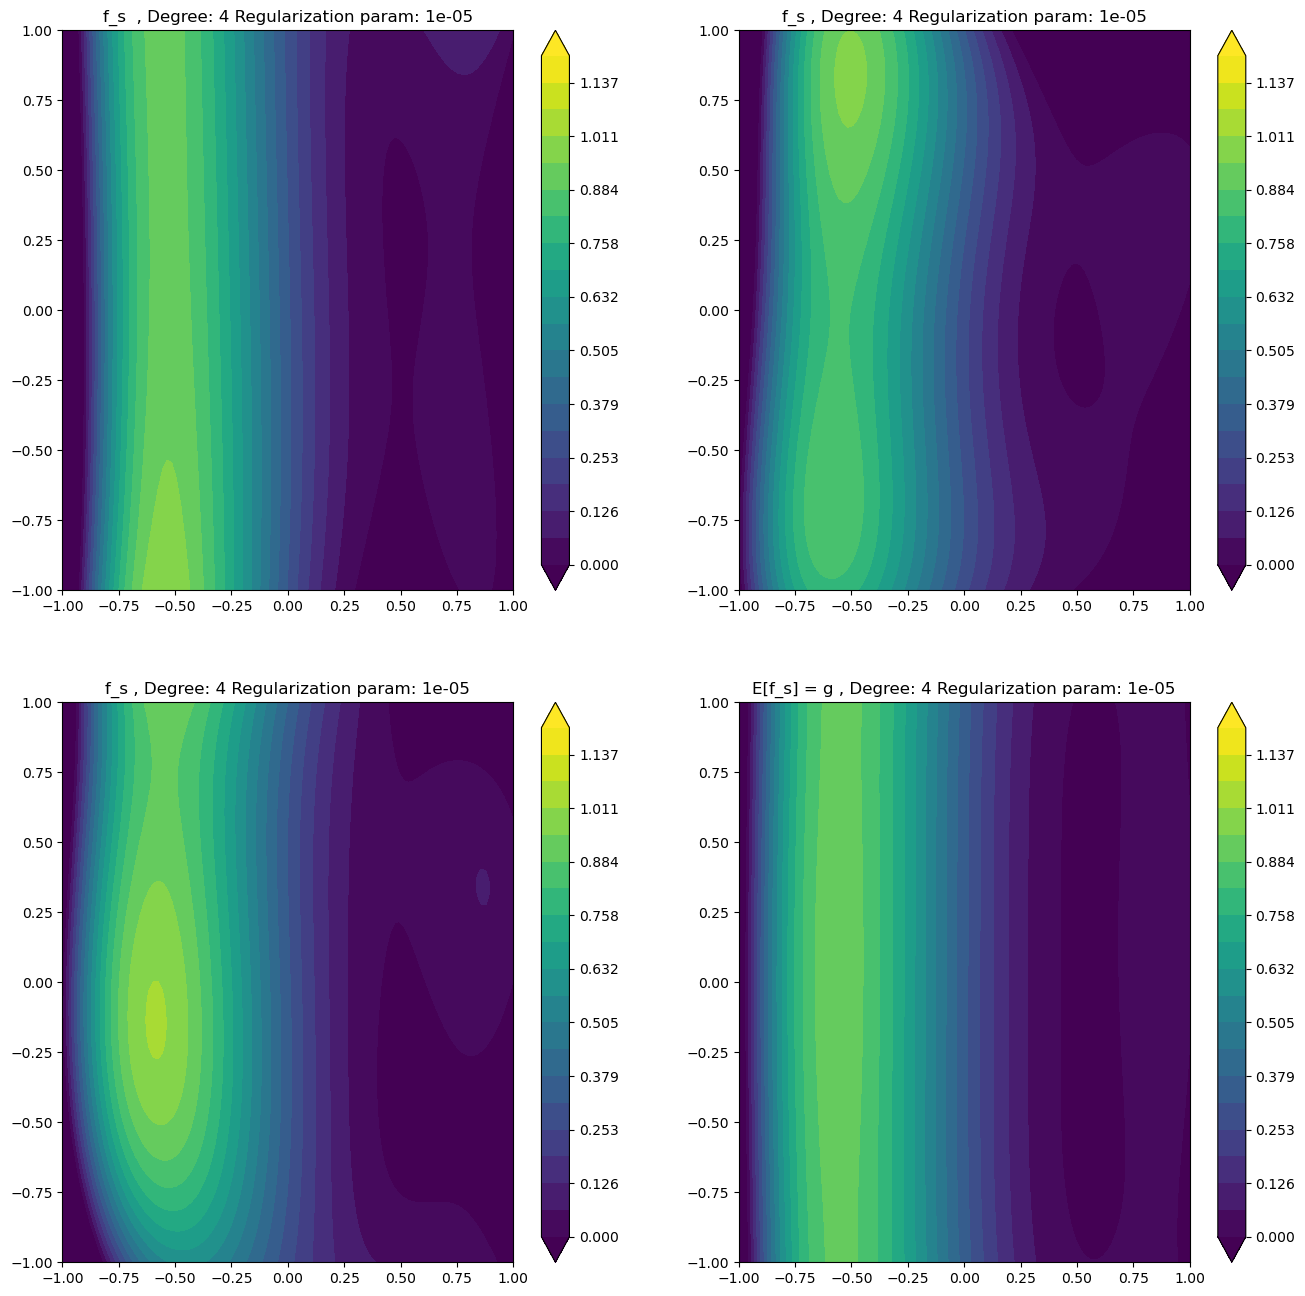

Degree= 4 lambda= 1e-05
Bias = 0.07785597126648013
Variance = 0.006975430134888433
MSE = 0.013036982396735411


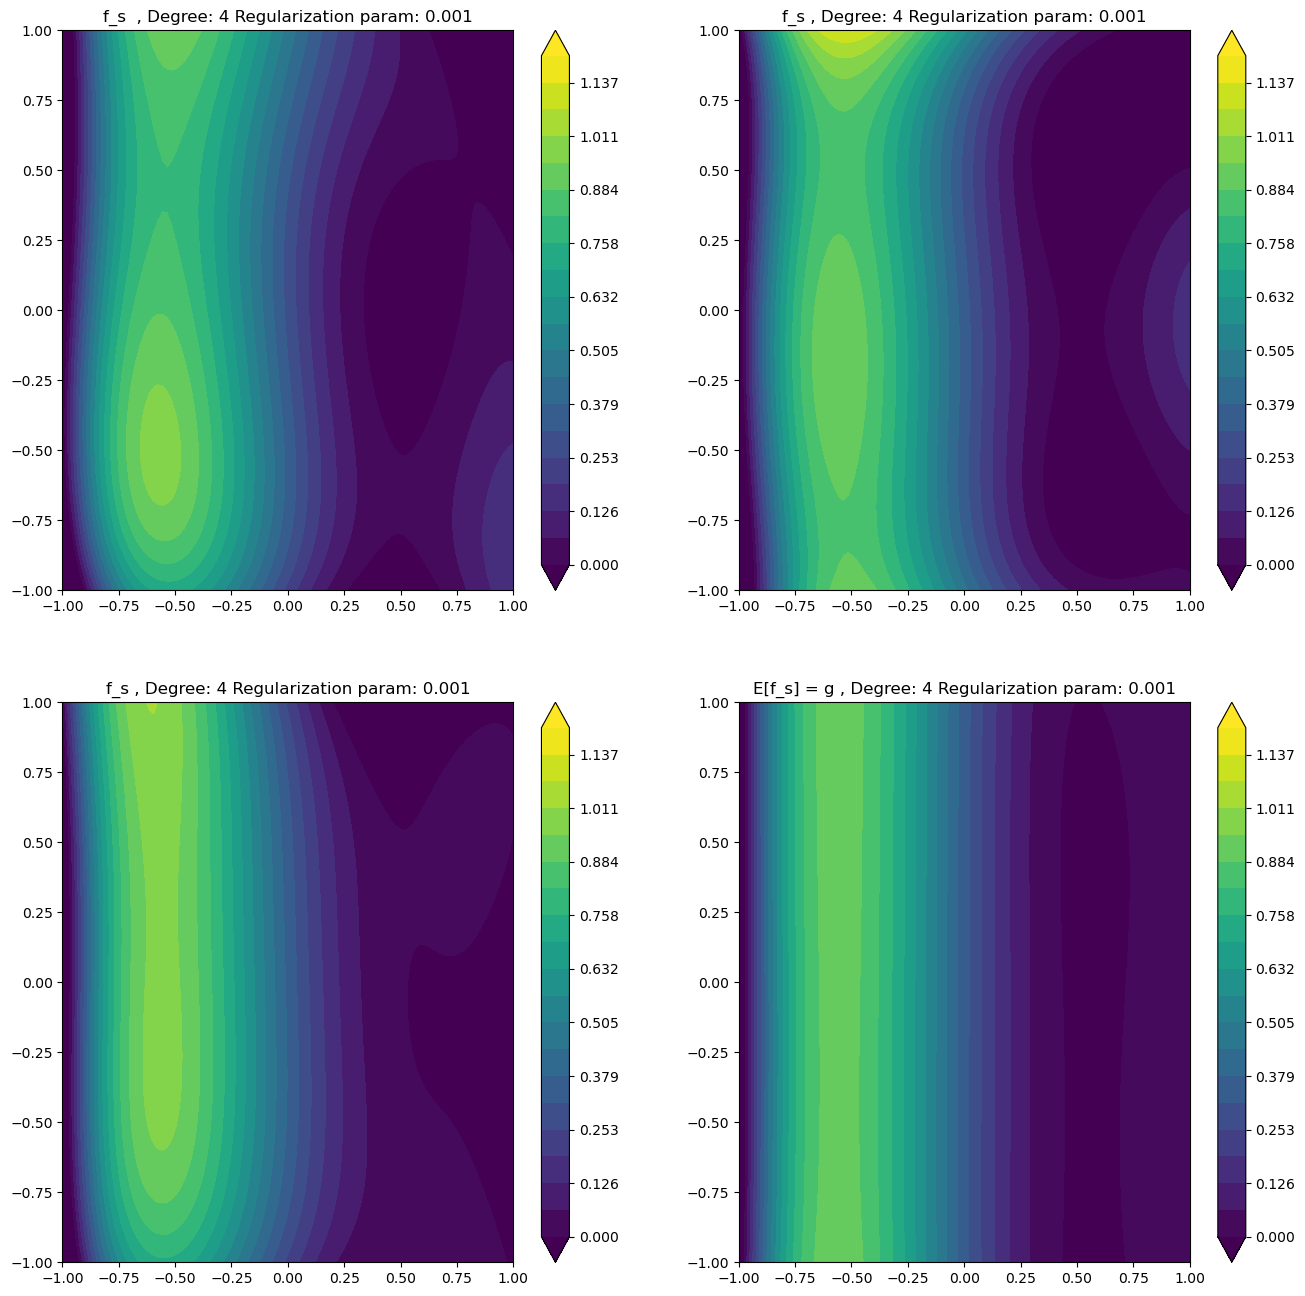

Degree= 4 lambda= 0.001
Bias = 0.07647193779708396
Variance = 0.005826311476795922
MSE = 0.011674268747237


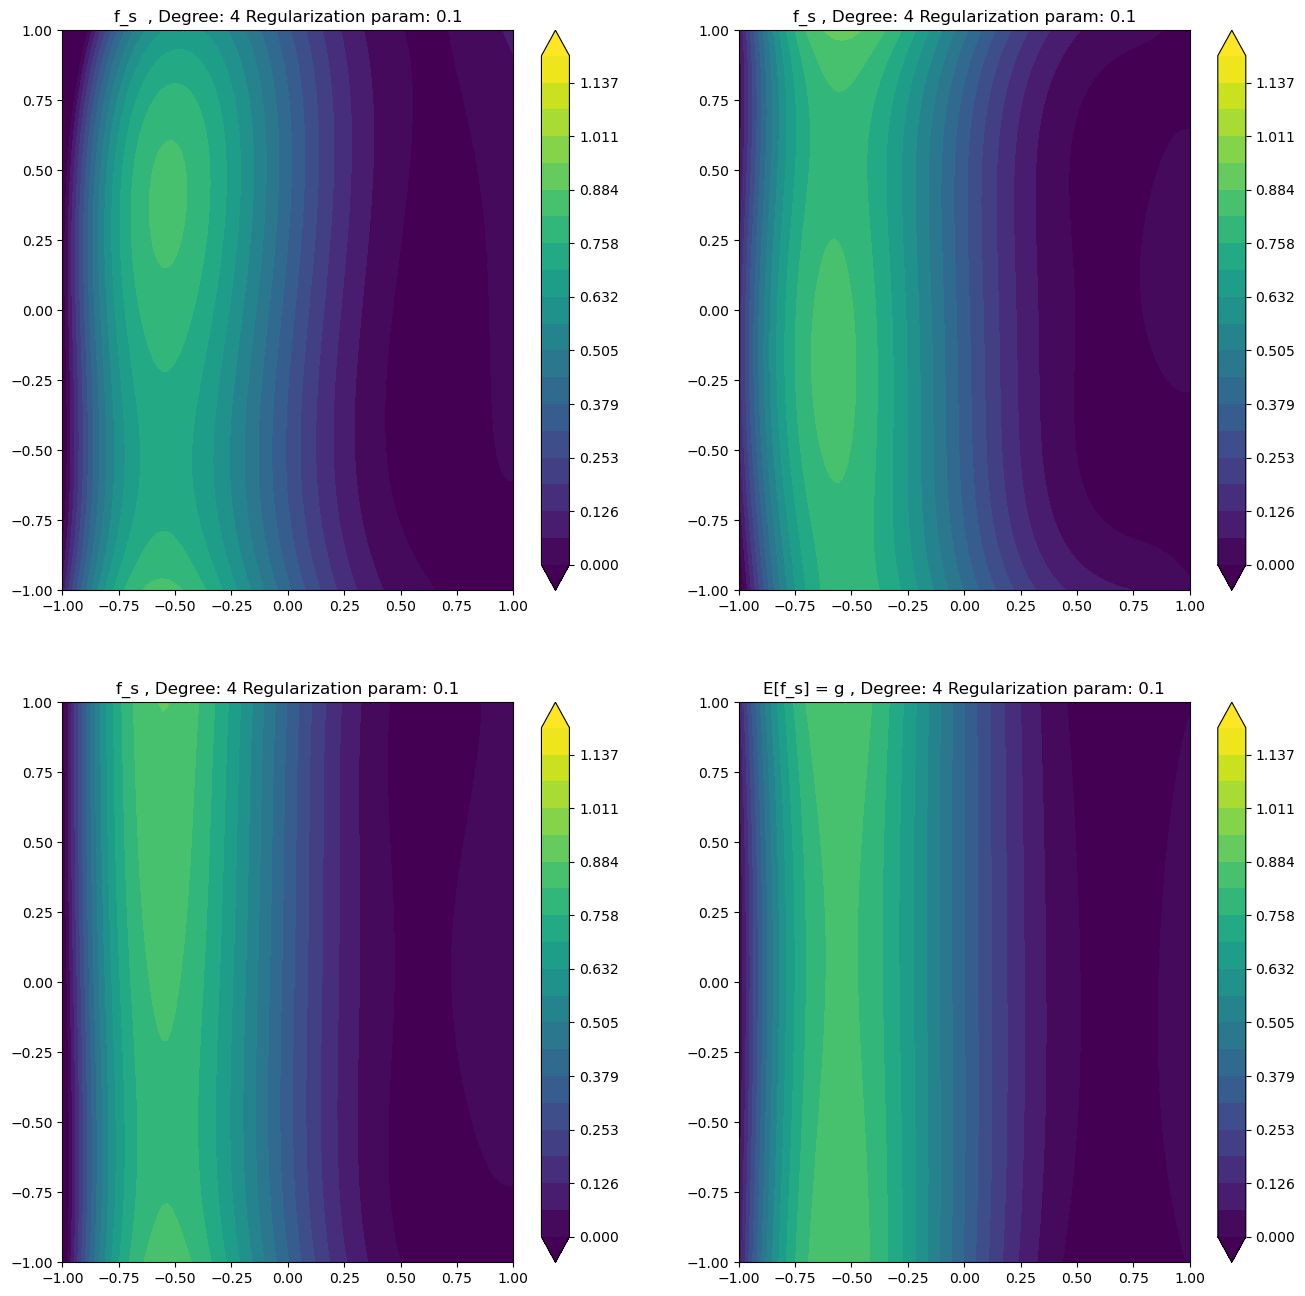

Degree= 4 lambda= 0.1
Bias = 0.08635051531011424
Variance = 0.003229086855414683
MSE = 0.010685498349736956


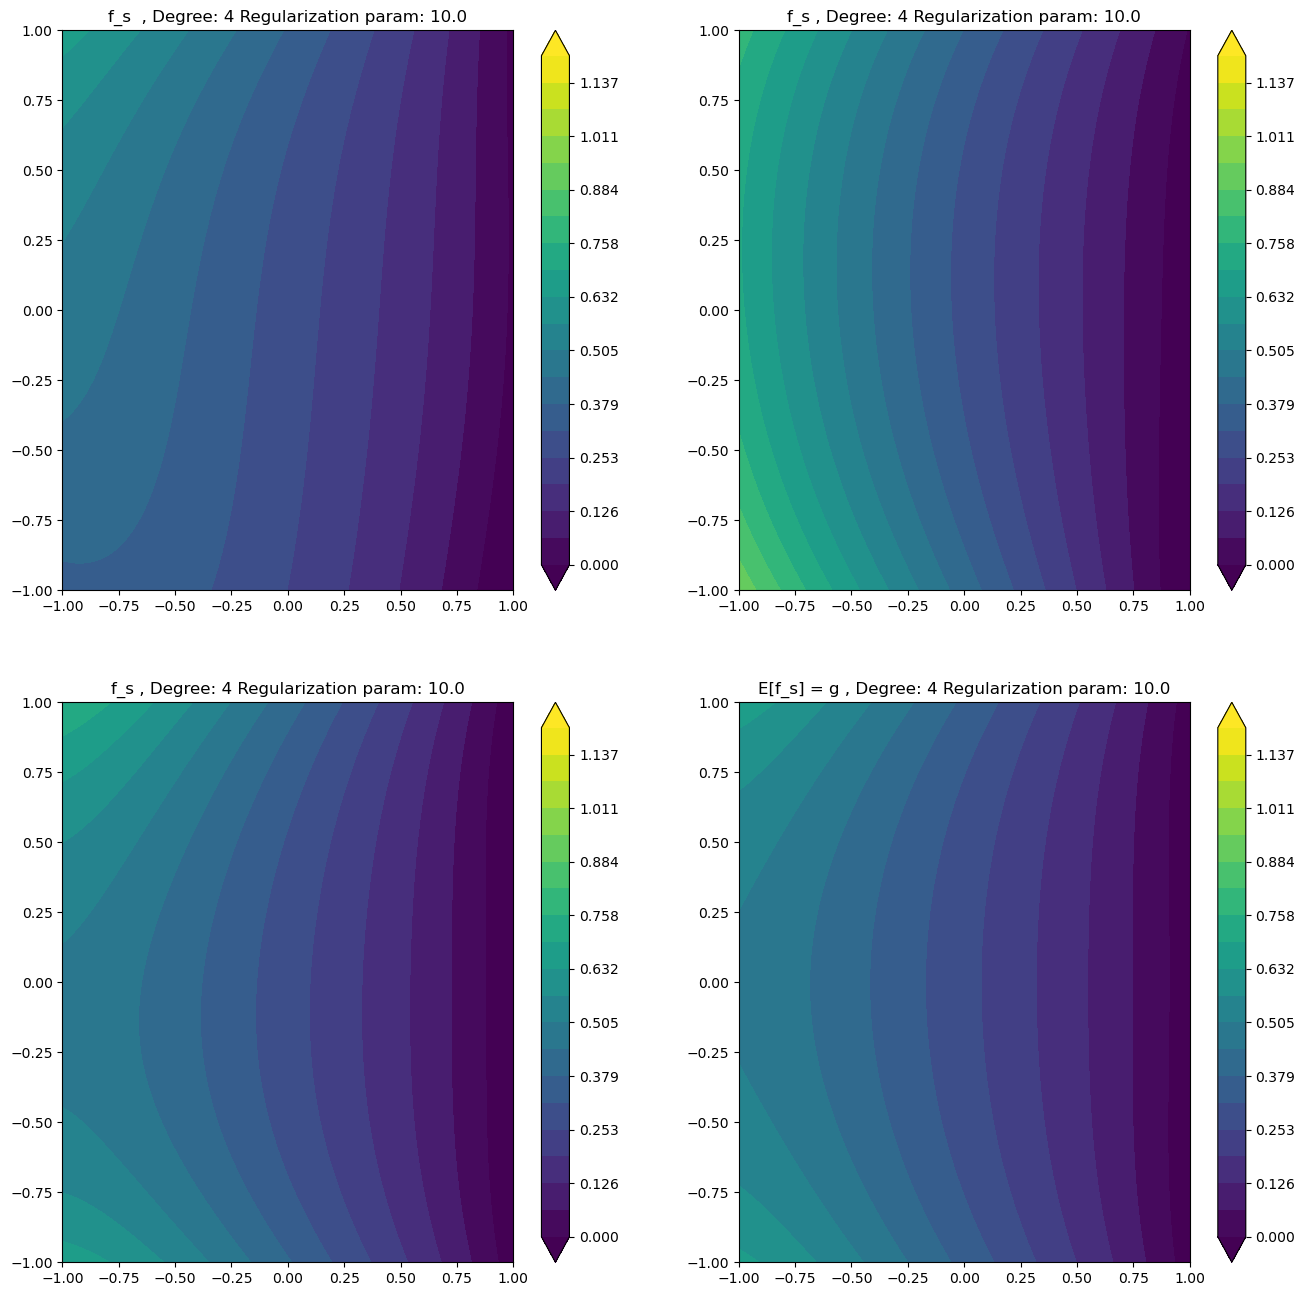

Degree= 4 lambda= 10.0
Bias = 0.2650282784313053
Variance = 0.002814300277496444
MSE = 0.07305428864575791


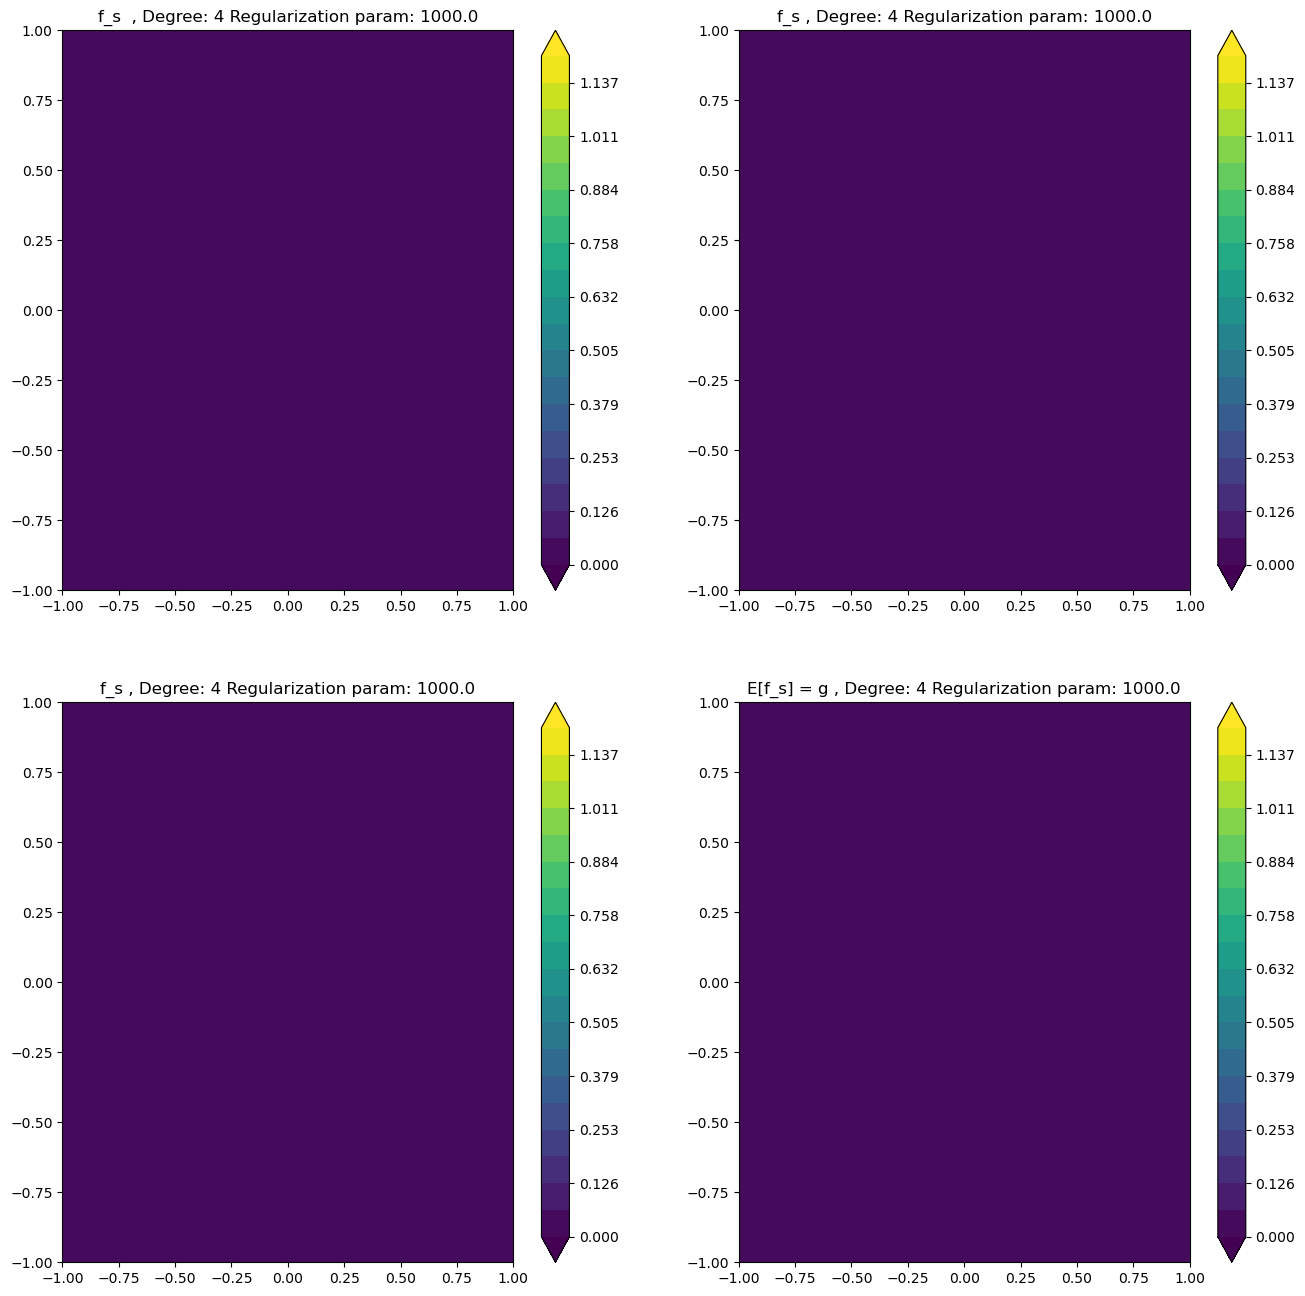

Degree= 4 lambda= 1000.0
Bias = 0.4780366227683217
Variance = 1.526768138025069e-05
MSE = 0.22853428038912293


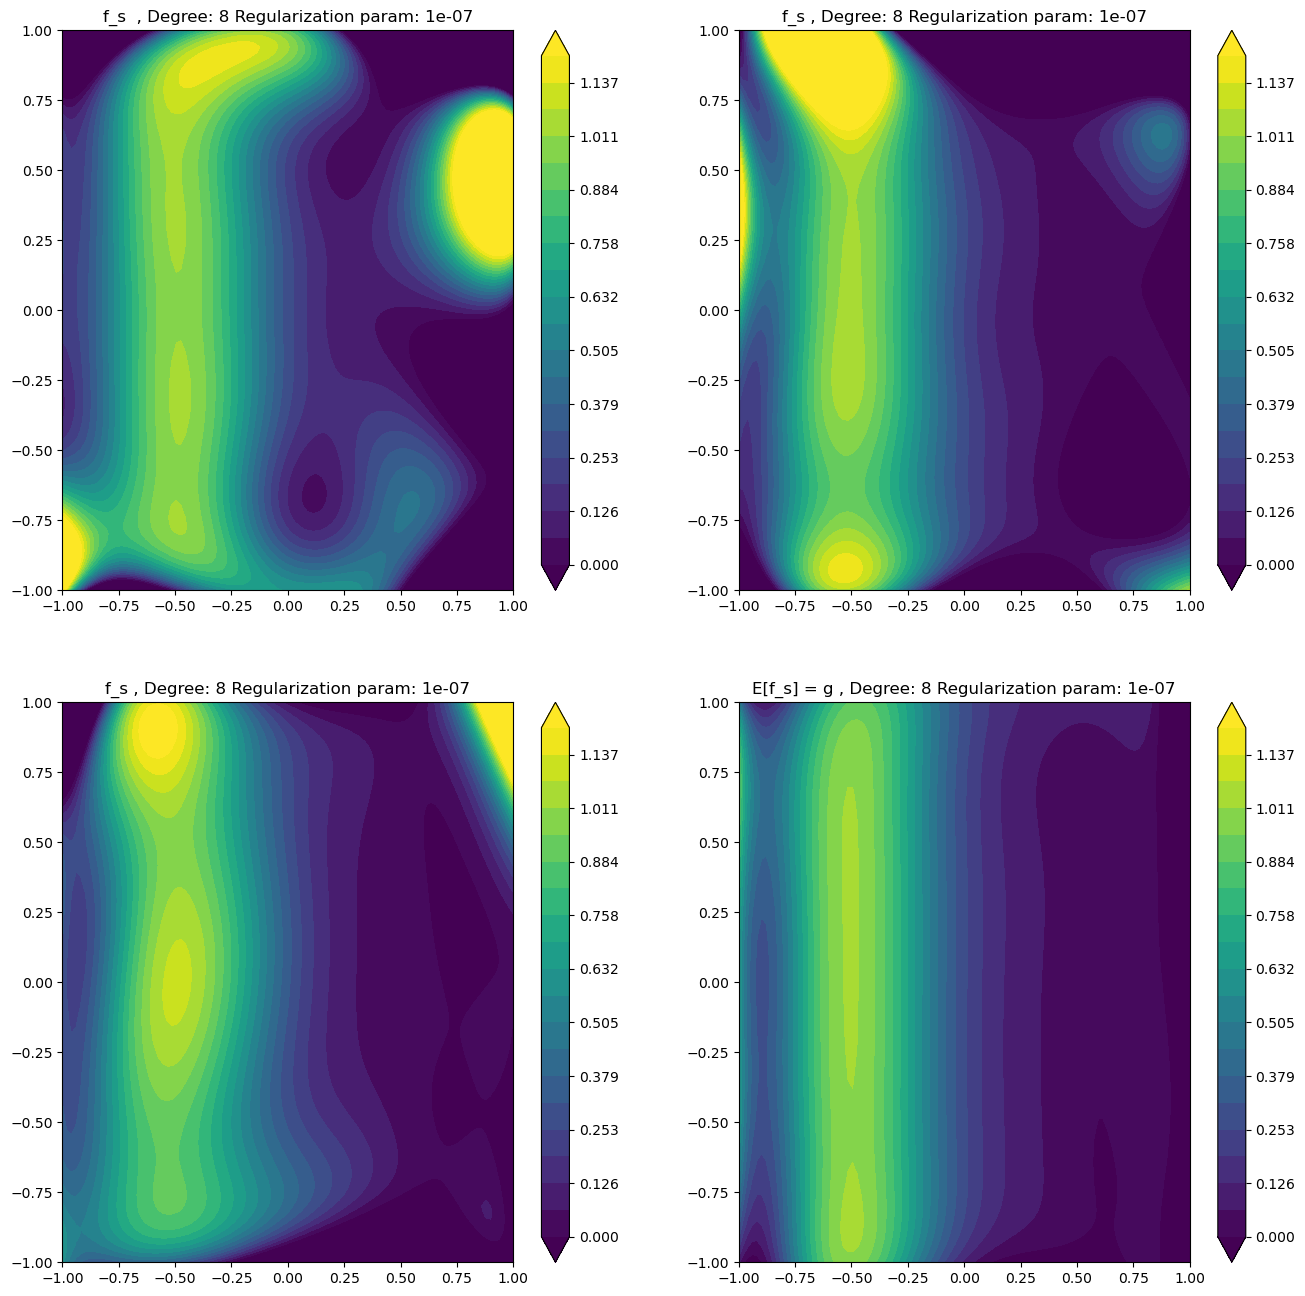

Degree= 8 lambda= 1e-07
Bias = 0.1120336091701461
Variance = 0.556270947677031
MSE = 0.56882247726072


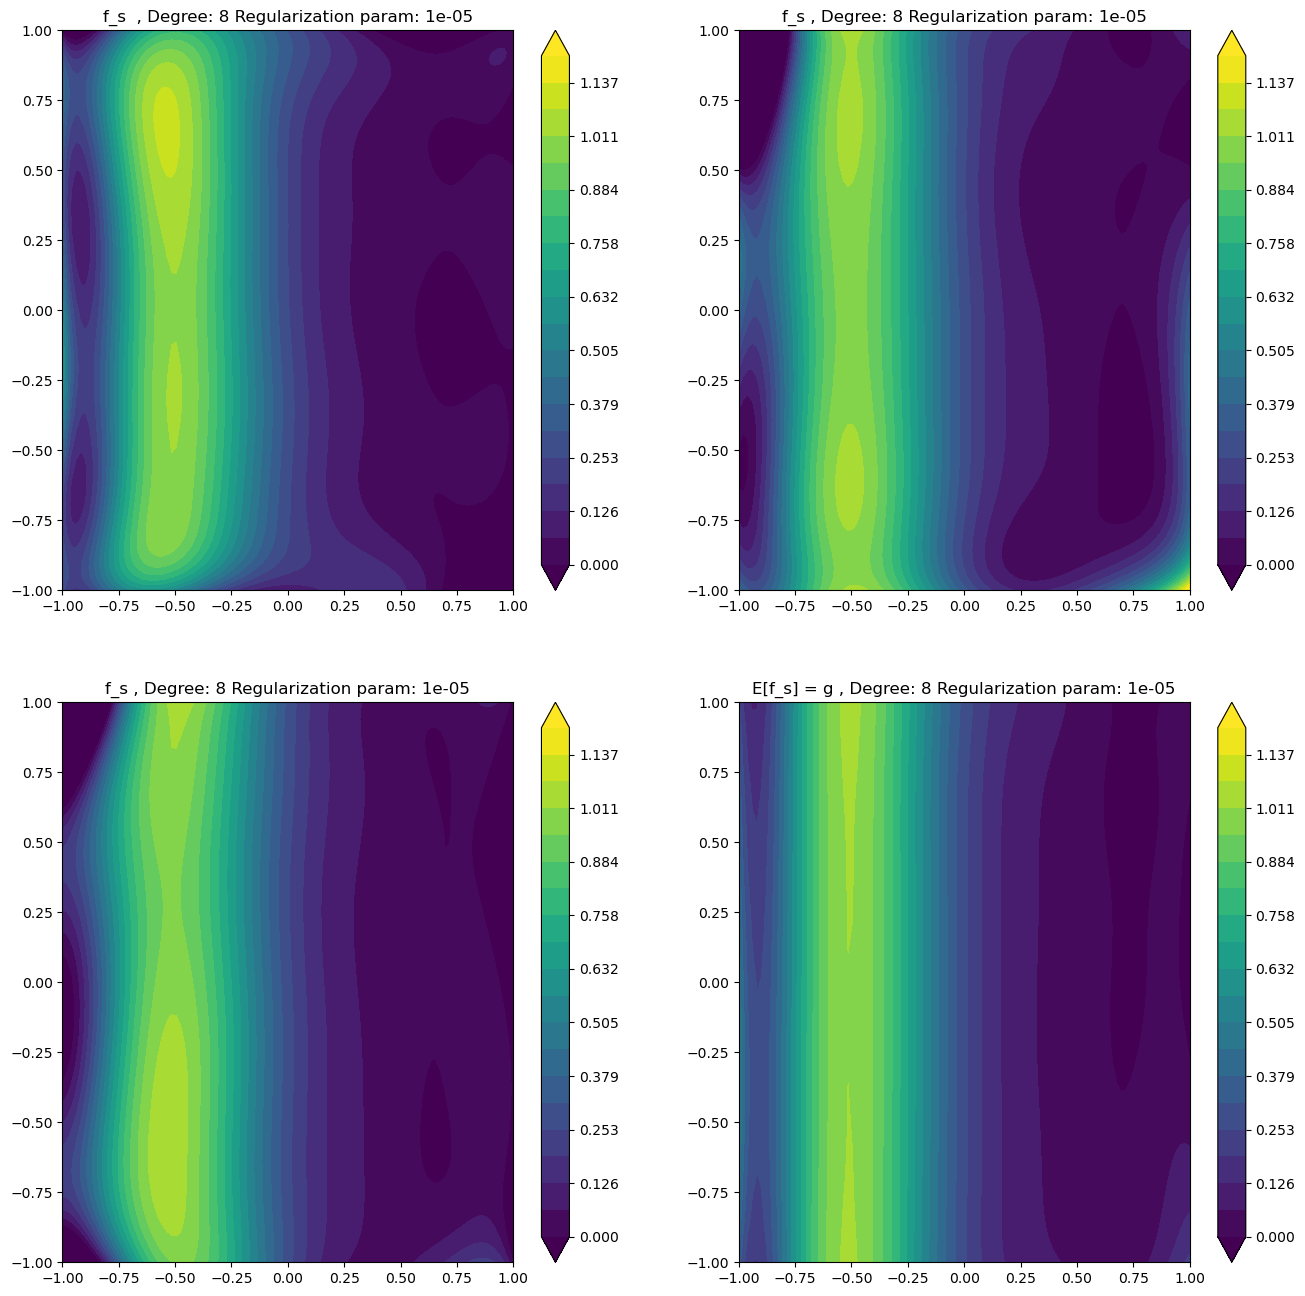

Degree= 8 lambda= 1e-05
Bias = 0.04437558226231371
Variance = 0.040627434700363195
MSE = 0.04259662700148257


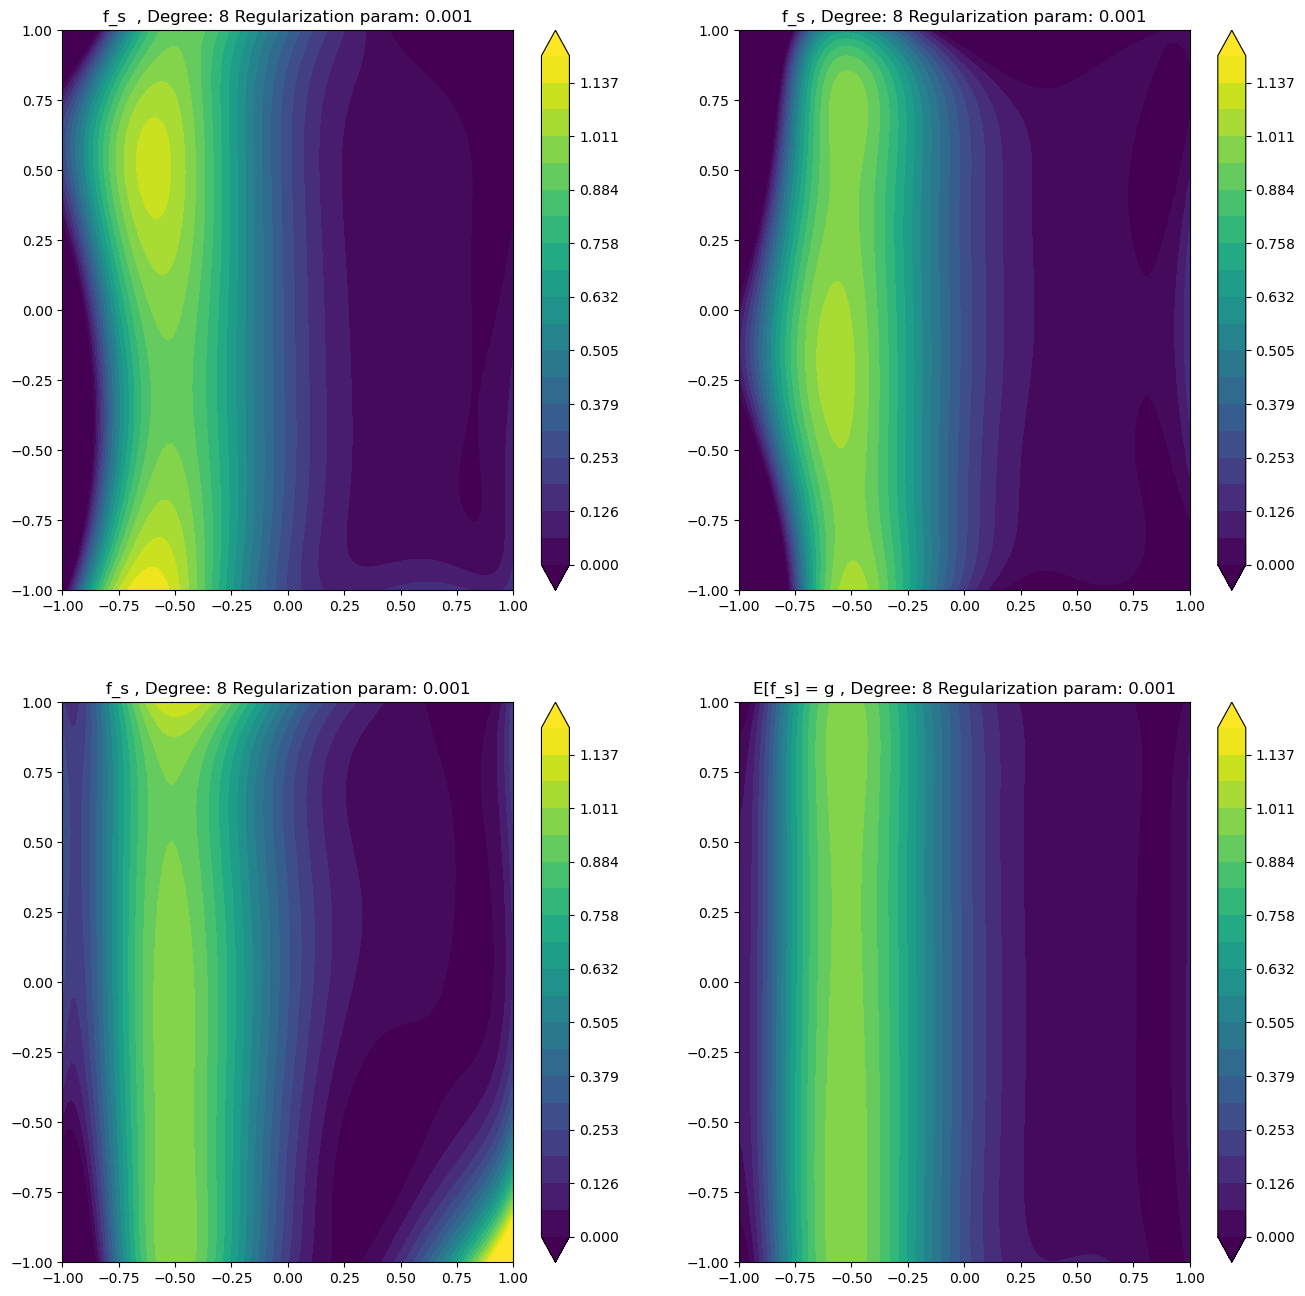

Degree= 8 lambda= 0.001
Bias = 0.038628613644768106
Variance = 0.01365080979708702
MSE = 0.015142979589203784


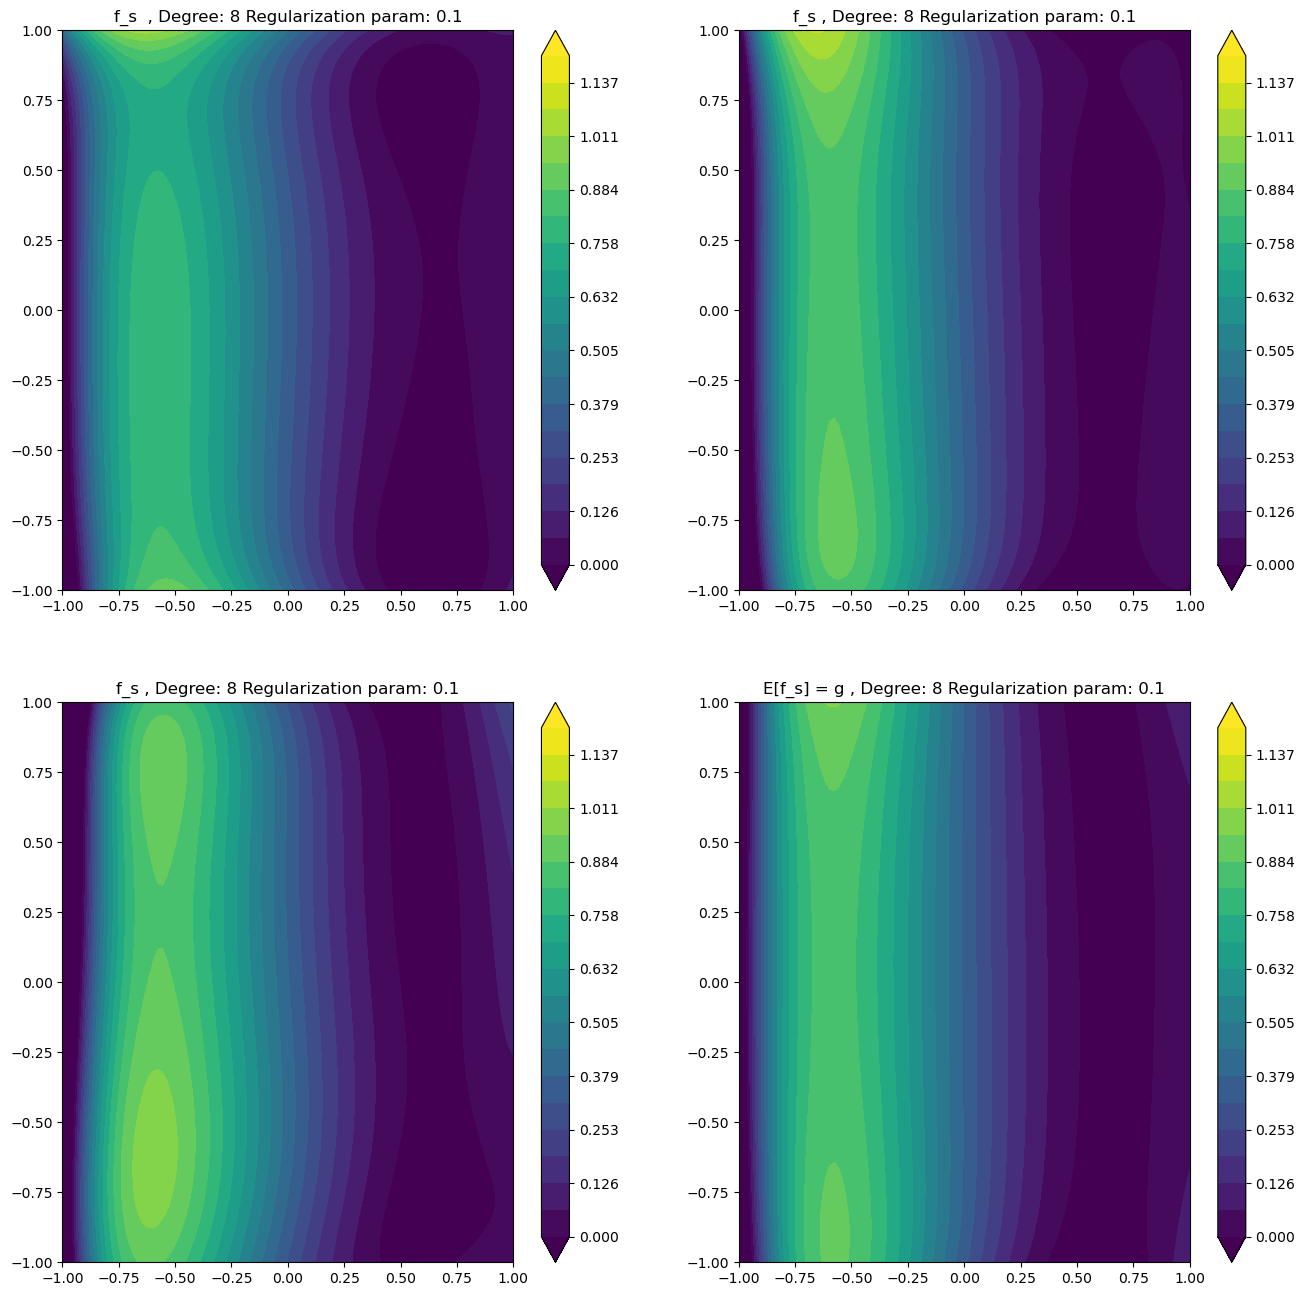

Degree= 8 lambda= 0.1
Bias = 0.1006443612647642
Variance = 0.0069445874889691415
MSE = 0.01707387494336151


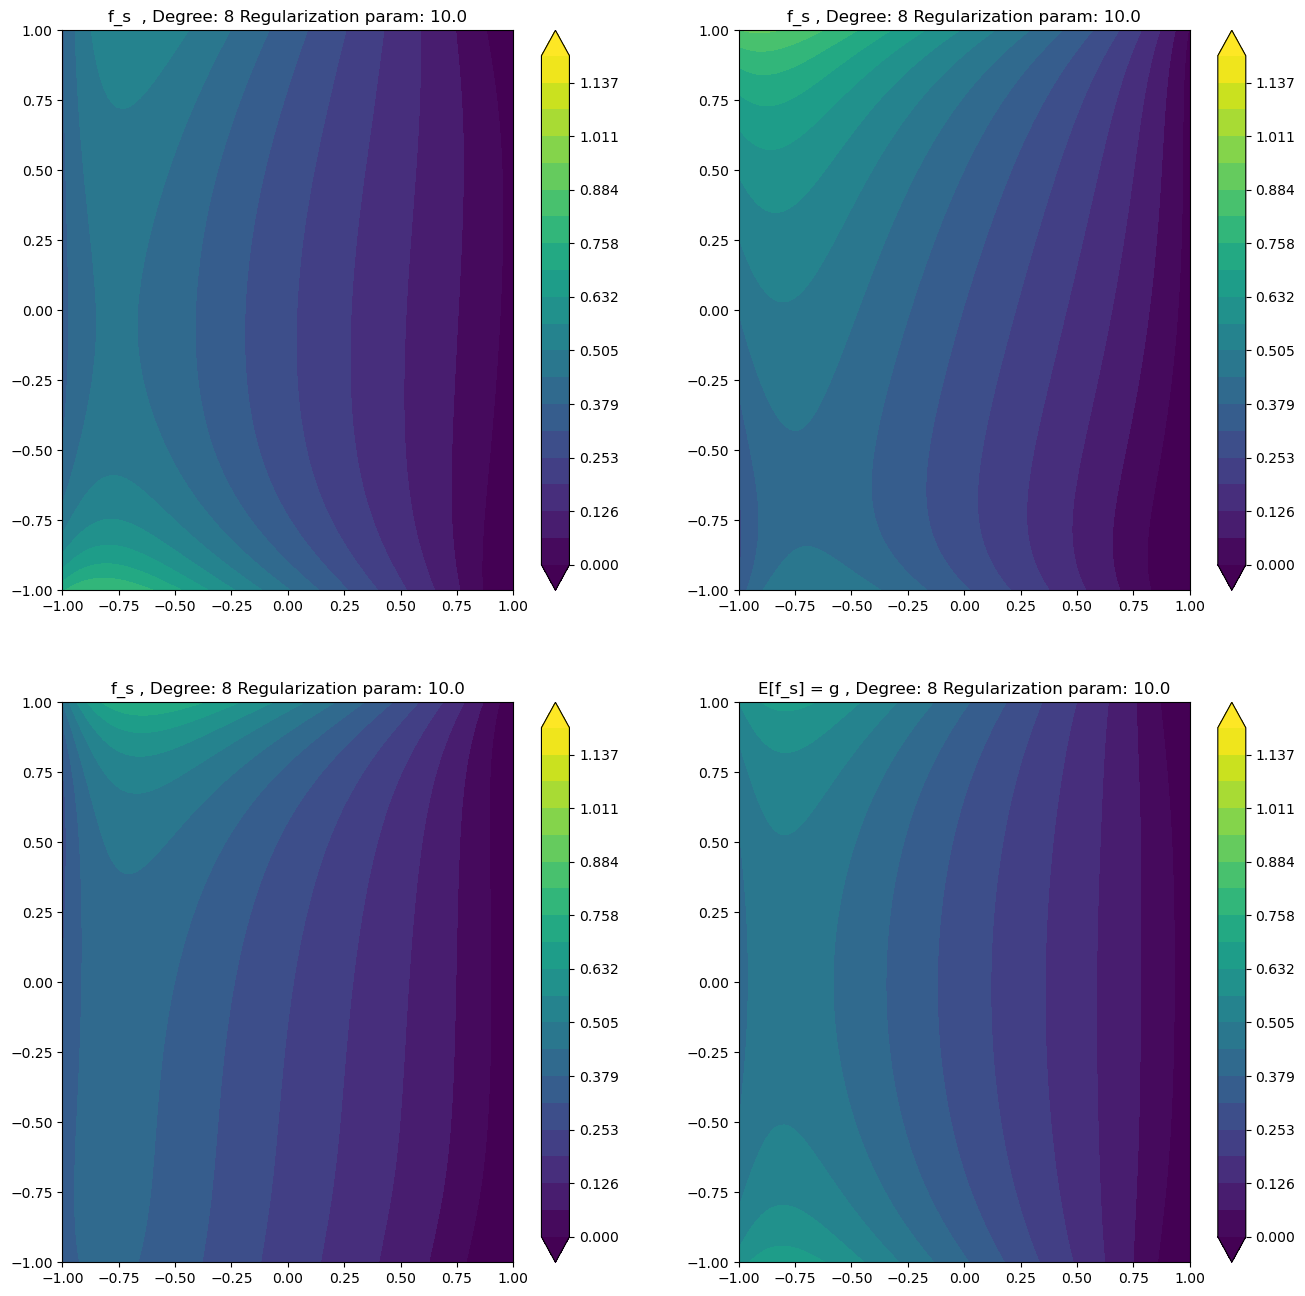

Degree= 8 lambda= 10.0
Bias = 0.2517058115824626
Variance = 0.0034323427965867997
MSE = 0.06678815838097295


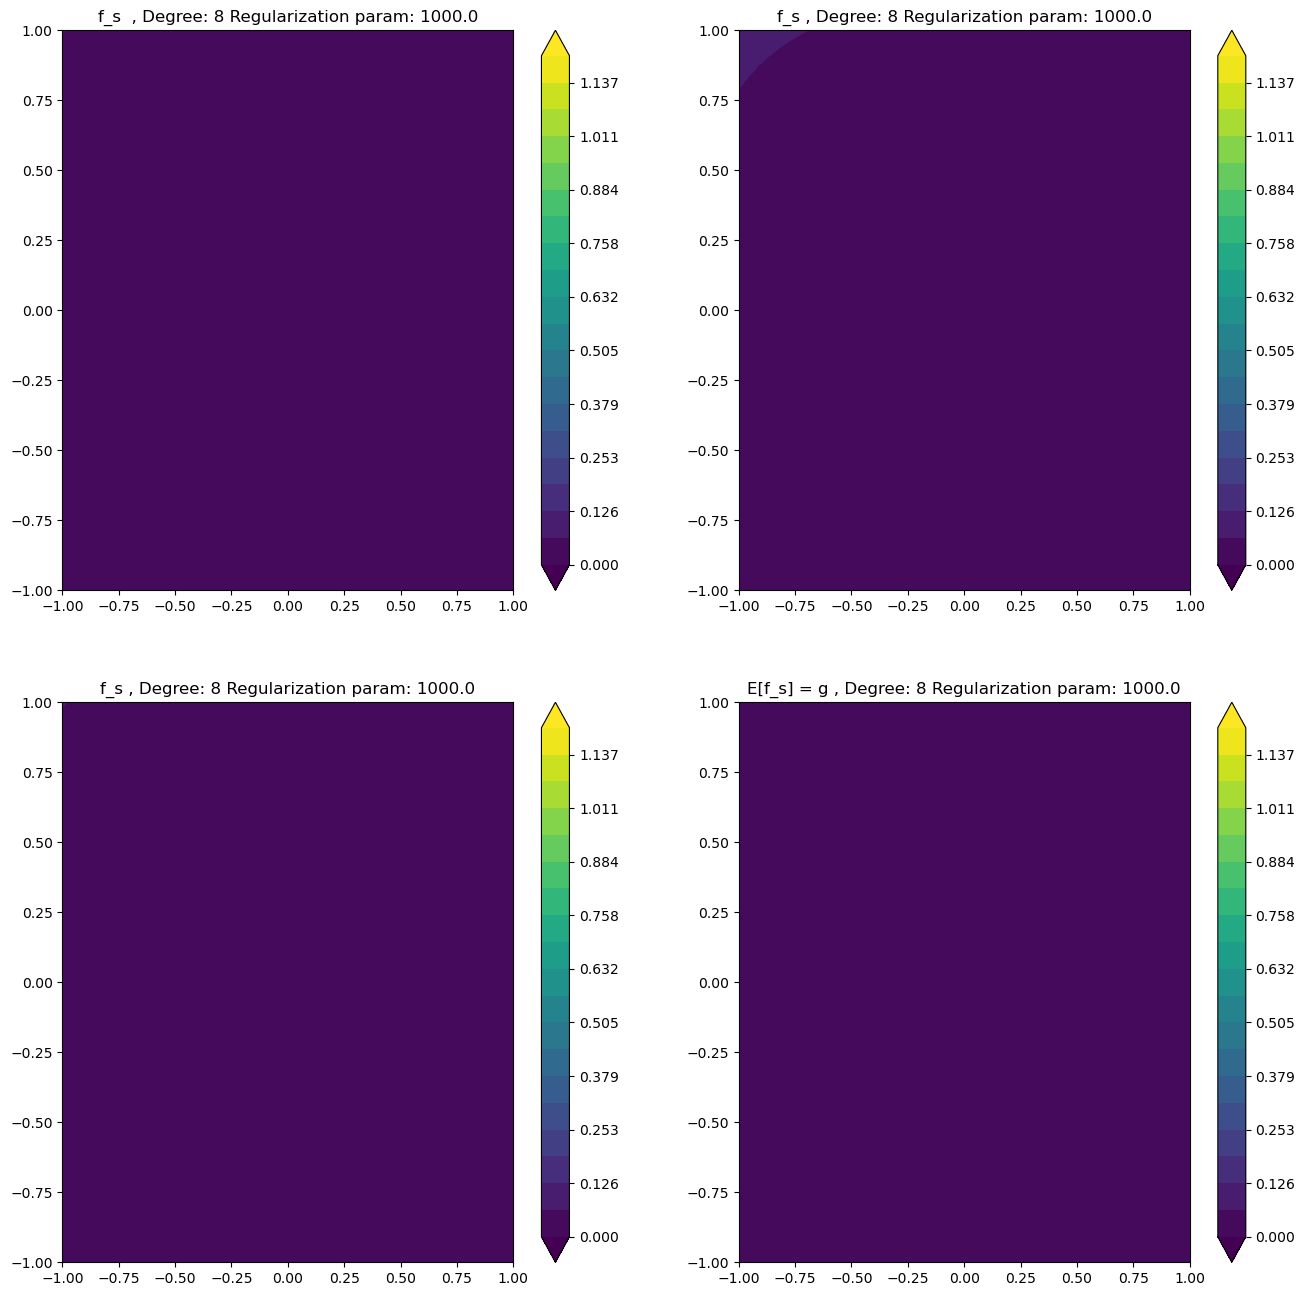

Degree= 8 lambda= 1000.0
Bias = 0.47721262981963114
Variance = 2.1892177878536163e-05
MSE = 0.22775378623724682


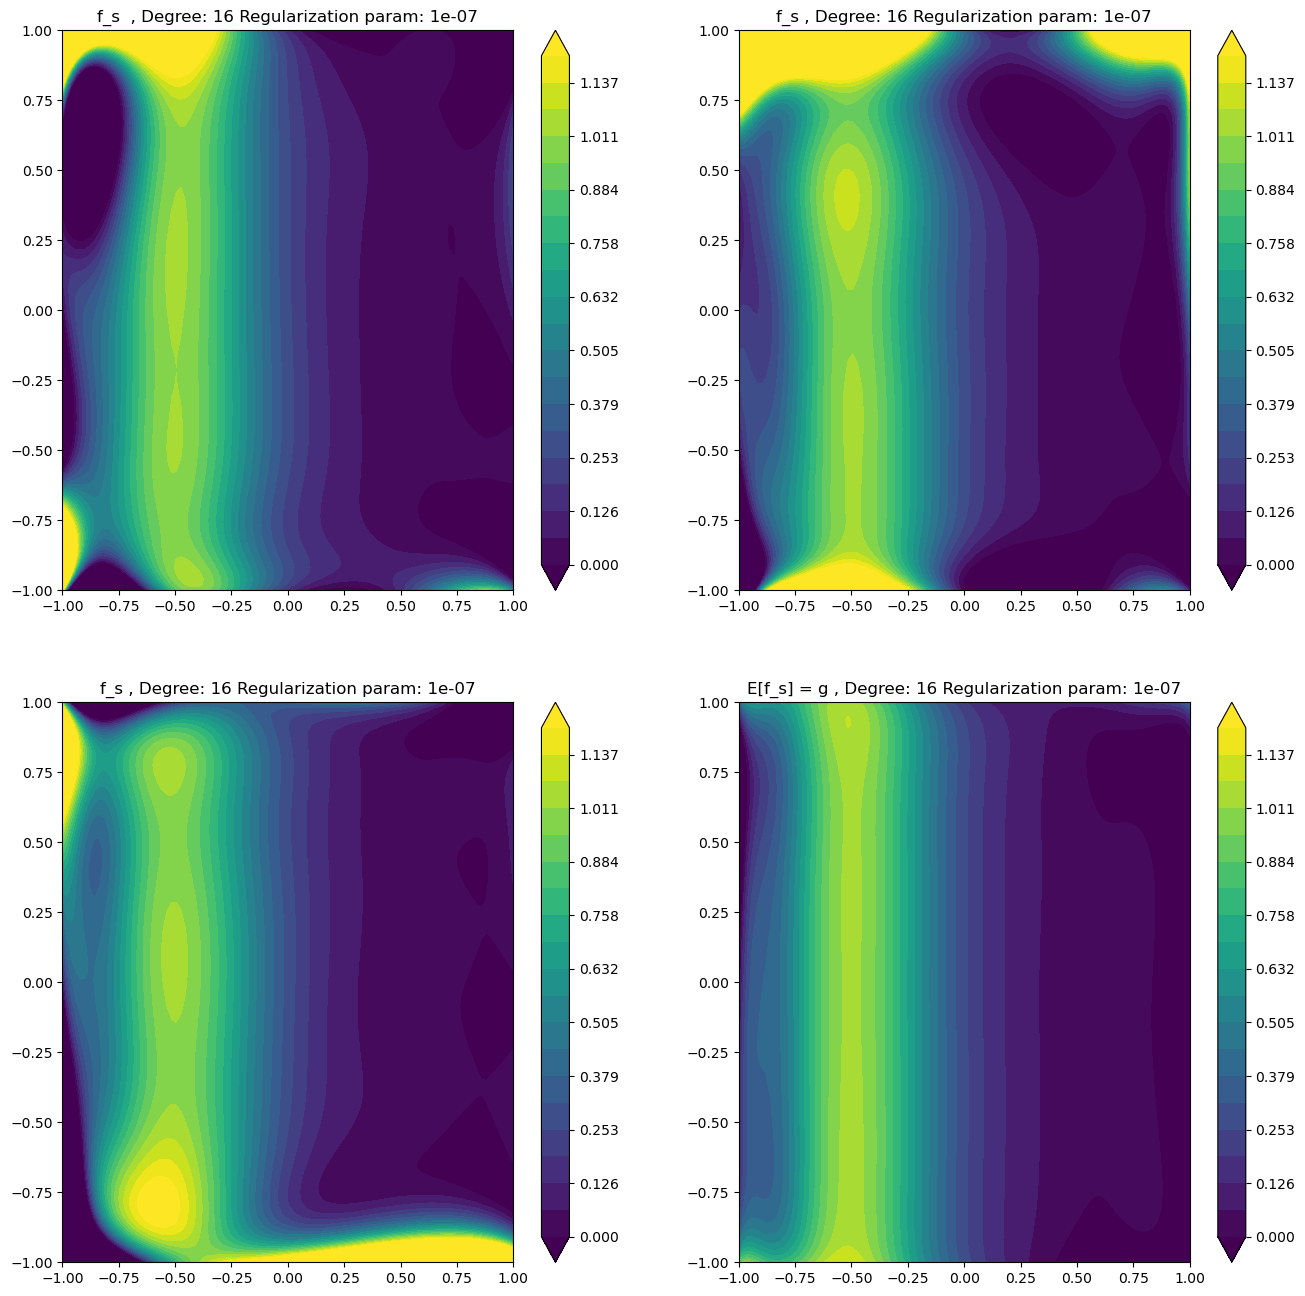

Degree= 16 lambda= 1e-07
Bias = 0.0634015733740324
Variance = 0.3249680695703965
MSE = 0.32898782907669927


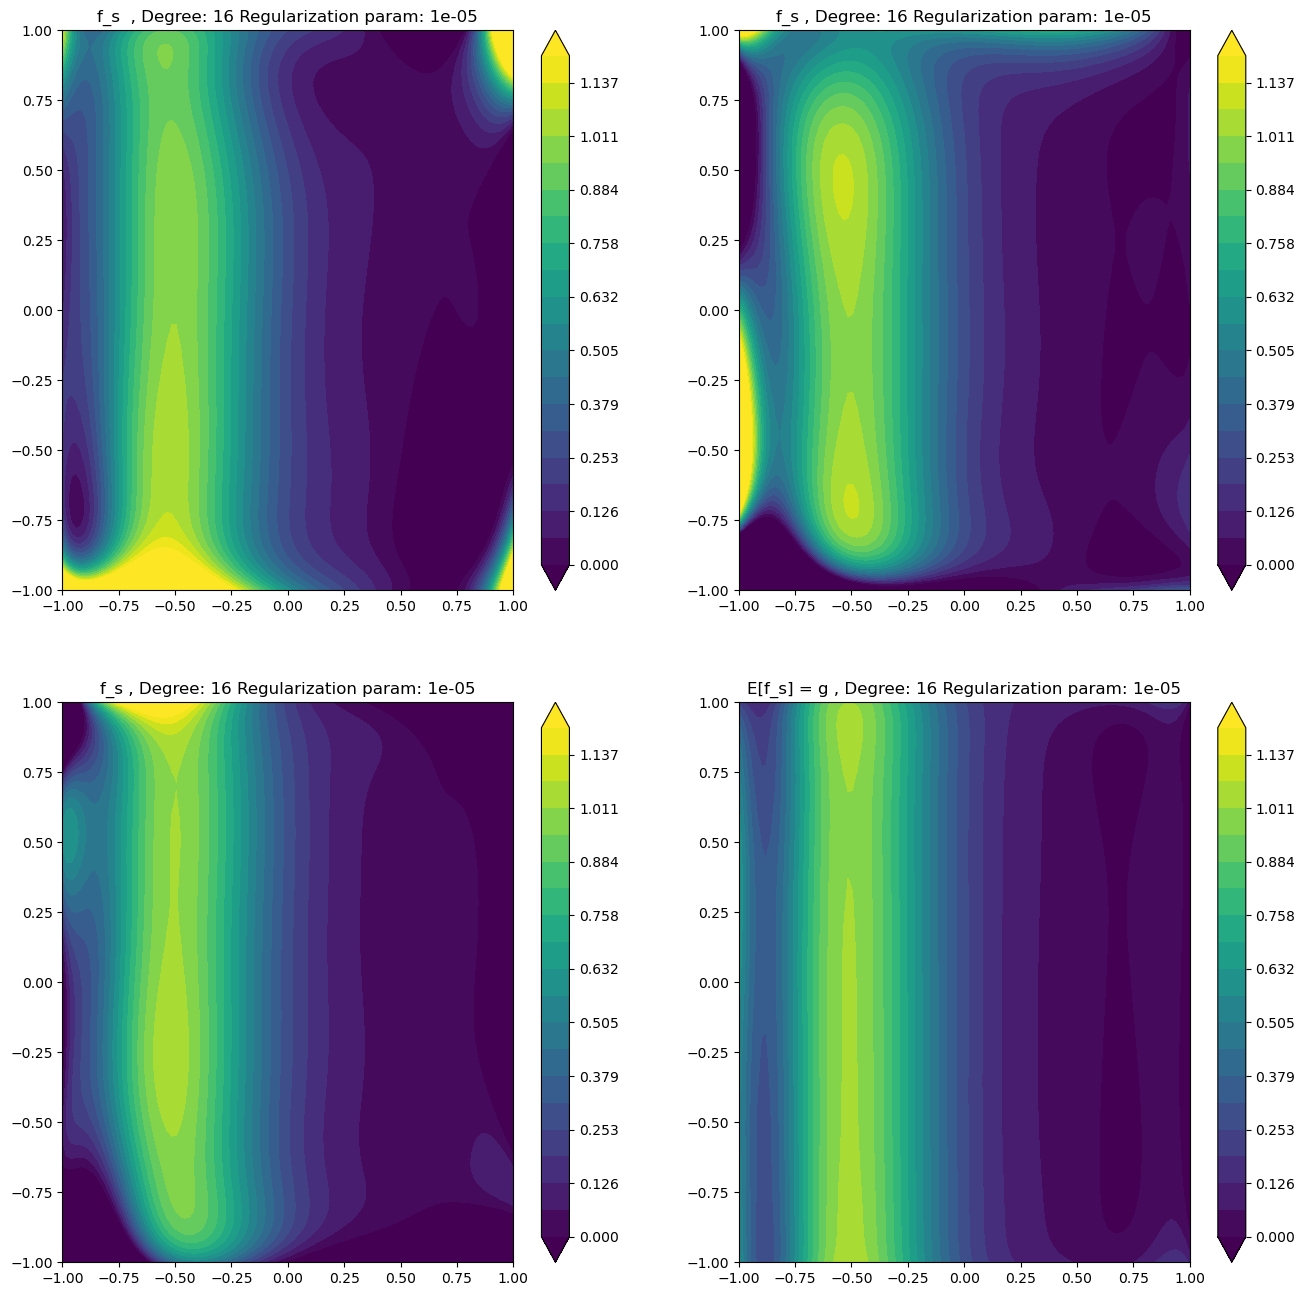

Degree= 16 lambda= 1e-05
Bias = 0.06666150762344165
Variance = 0.12330204932333953
MSE = 0.1277458059219697


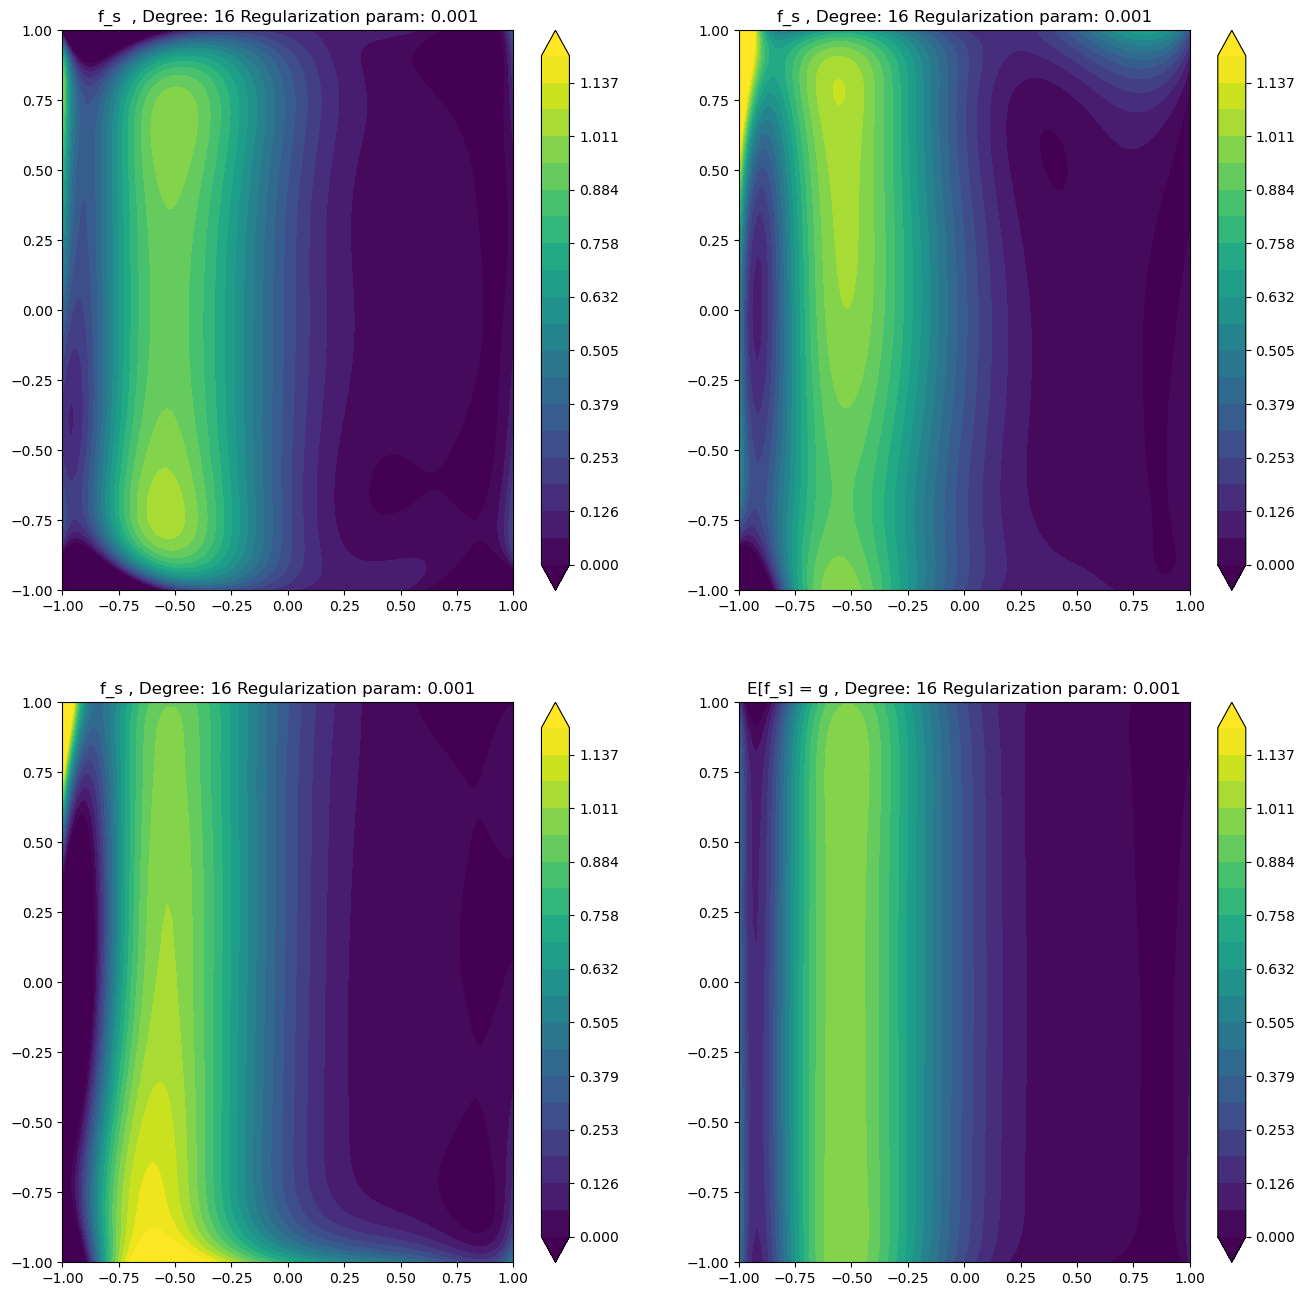

Degree= 16 lambda= 0.001
Bias = 0.055360453360724024
Variance = 0.036046125074975205
MSE = 0.039110904871280106


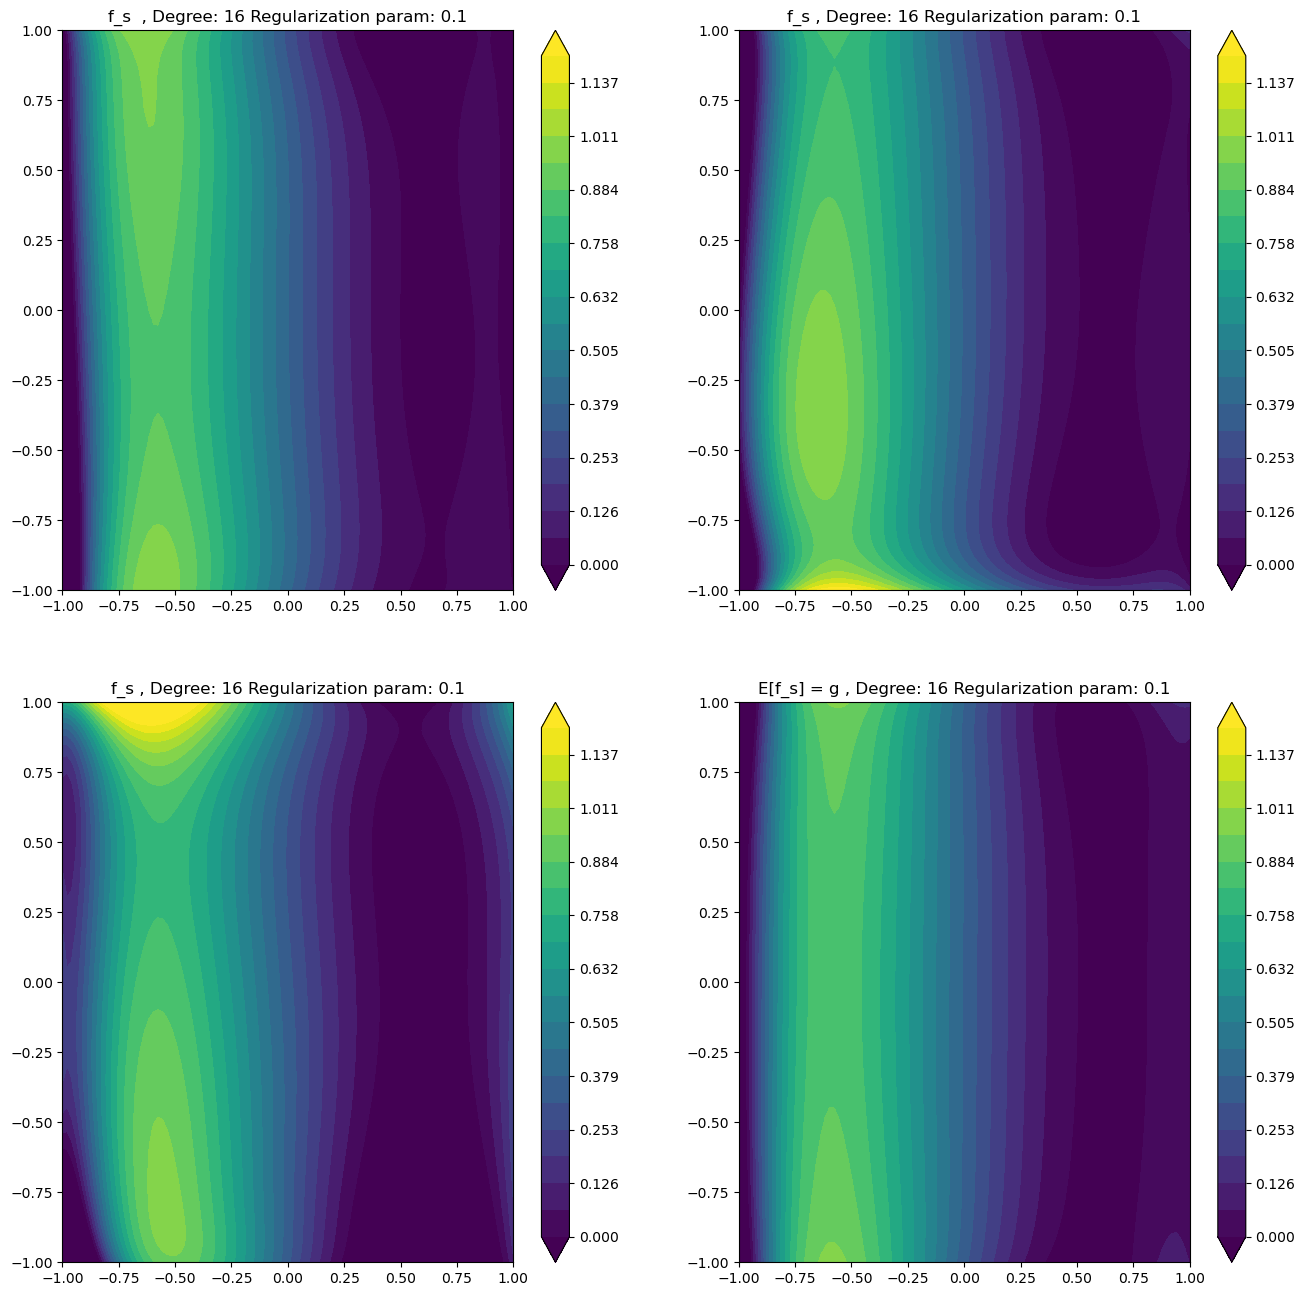

Degree= 16 lambda= 0.1
Bias = 0.09794624069313645
Variance = 0.013539885187274822
MSE = 0.02313335125319264


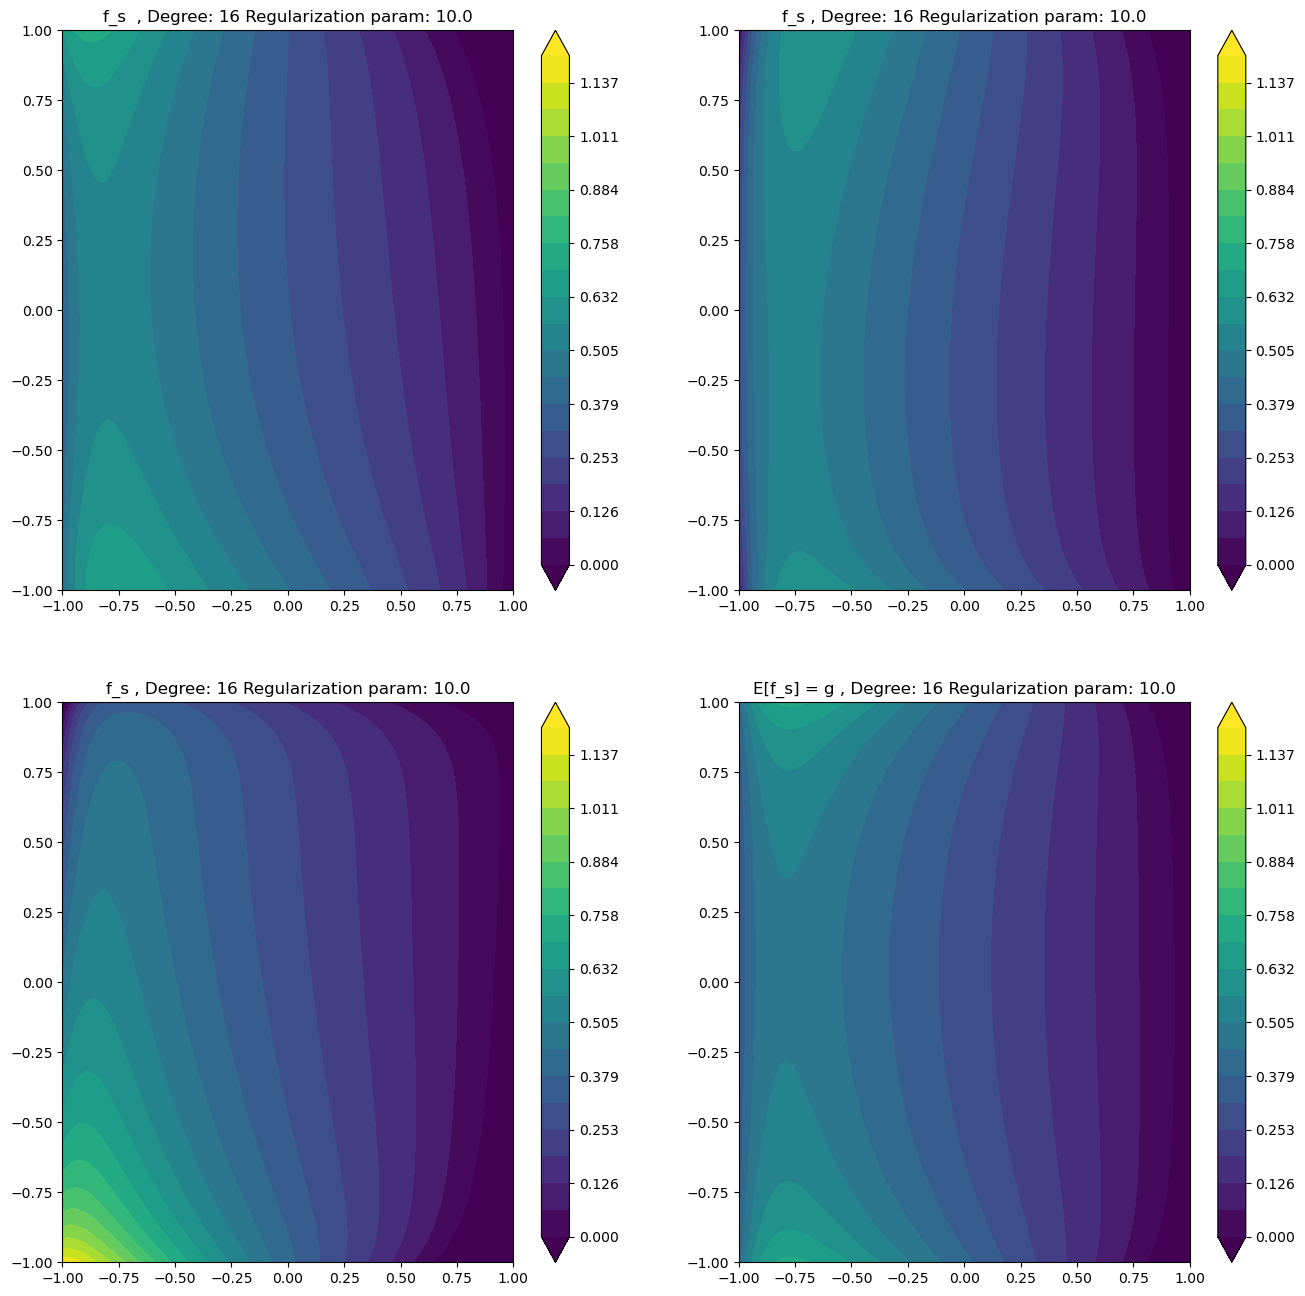

Degree= 16 lambda= 10.0
Bias = 0.24342768466805567
Variance = 0.0037816249964506077
MSE = 0.06303866265930096


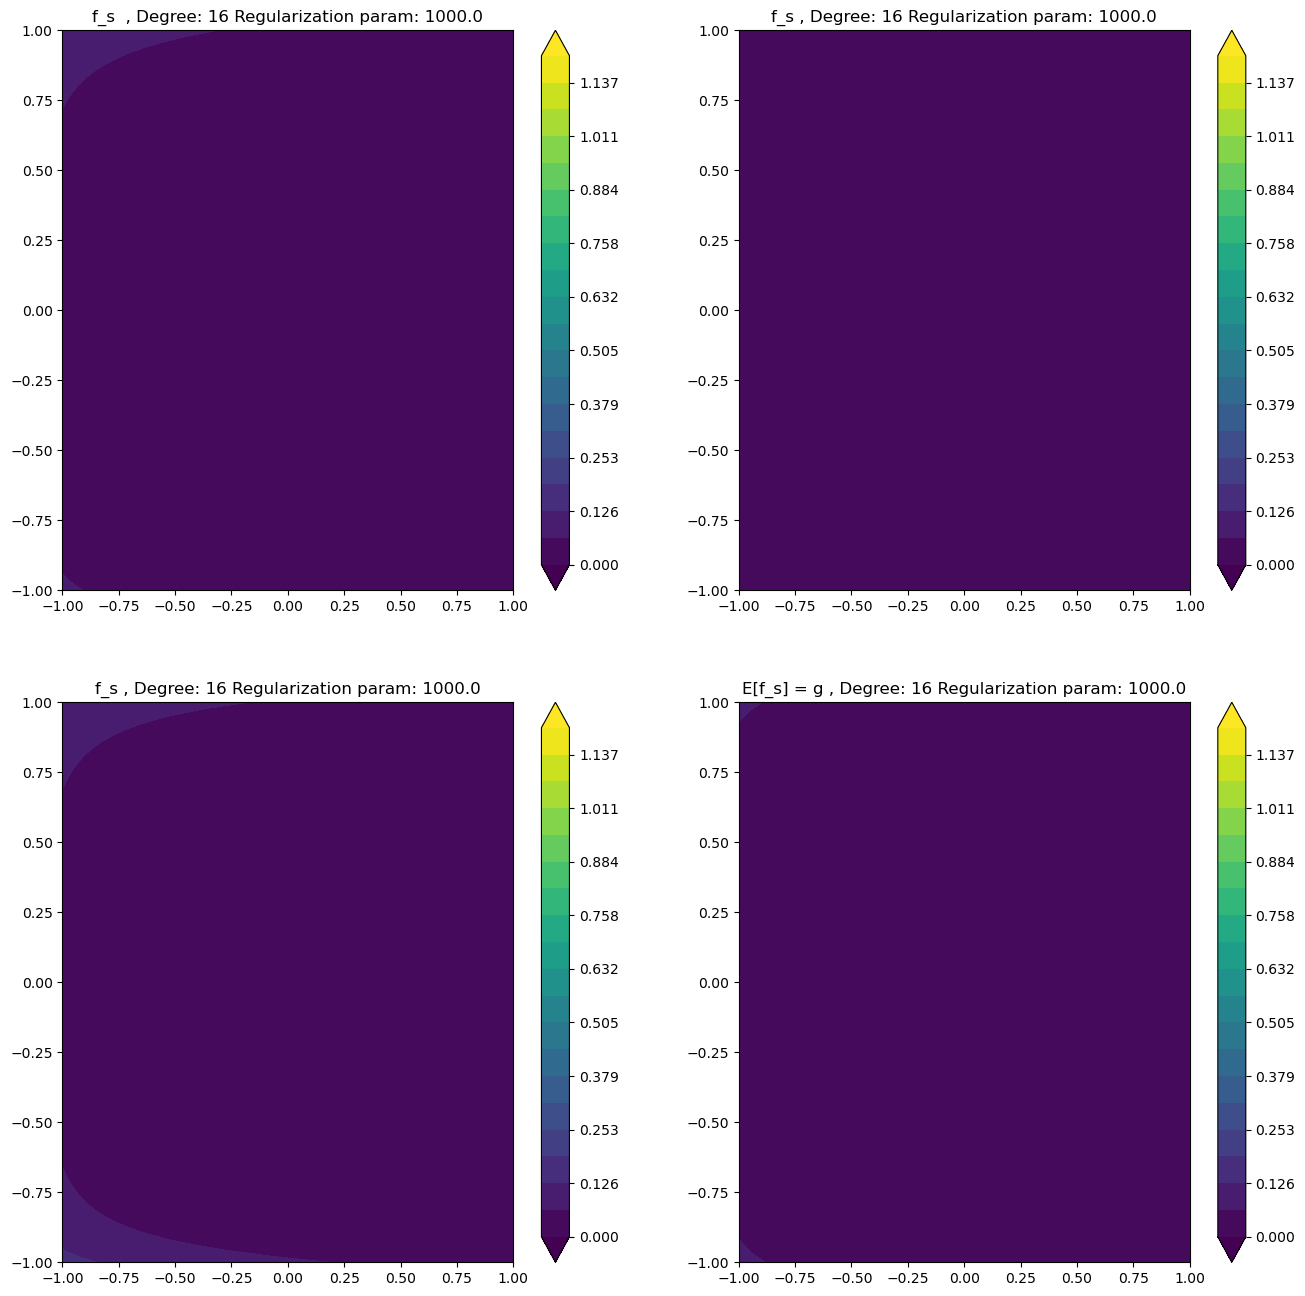

Degree= 16 lambda= 1000.0
Bias = 0.477077741051372
Variance = 2.5956738910499136e-05
MSE = 0.2276291277455905


In [2]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    n = len(X_test)
    d = len(X_test[0])
    X_t = [] 
    for k in range(n):
        z= []
        for i in range(0,degree+1):
            for j in range(0,degree-i+1):
                z.append(((X_test[k][0])**i) * ((X_test[k][1])**j))
        X_t.append(z)

    X_test = np.array(X_t)
    Y_test_pred = []
    for i in range(len(X_test)):
        Y_test_pred.append(np.dot((X_test[i].T),wt_vector))
        
    Y_test_pred = np.array(Y_test_pred)
    return Y_test_pred 
        

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    z = np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1)
   


    
    Z = polynomial_regression_ridge_pred(z,wt_vector,degree)
    Z= np.reshape(Z,(100,100))
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),extend = 'both')
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    n = len(X_train)
    d = len(X_train[0])
    X_t = [] 
    for k in range(n):
        z= []
        for i in range(0,degree+1):
            for j in range(0,degree-i+1):
                z.append(((X_train[k][0])**i) * ((X_train[k][1])**j))
        X_t.append(z)

    X_train = np.array(X_t)
    d1 = len(X_train[0])
    if degree > 8:
        mat1 = np.dot(X_train.T,X_train)
        mat2 = reg_param*(np.identity(d1))
        mat1 = mat1+mat2
        invmat1 = np.linalg.inv(mat1)
        w = np.linalg.multi_dot([invmat1,X_train.T,Y_train])
    else:
        mat1 = np.dot(X_train,X_train.T)
        mat2 = reg_param*(np.identity(n))
        mat1 = mat1+mat2
        invmat1 = np.linalg.inv(mat1)
        w = np.linalg.multi_dot([X_train.T,invmat1,Y_train])
    
            
    return w

    

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    a = [0.5,0.5]
    b = [-0.5,-0.5]
    c = [0.5,-0.5]
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    z = np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1)
    #caluclate phi(x)
    
    e = 2.718281828459045
    Y_pred_train = []
    f_star = []
    wt_vector = []
    for i in range(100):
        
        X_train = []
        Y_train = [] 
        a = np.random.choice(np.arange(0,9999,1),size = num_training_samples,replace= False)
        X_train = np.array([z[i] for i in a])
        for i in range(len(X_train)):
            xt = np.array(X_train[i][0],X_train[i][1])
            y = (e**(-4*np.dot(np.subtract(xt,a),np.subtract(xt,a))))+(e**(-4*np.dot(np.subtract(xt,b),np.subtract(xt,b))))+(e**(-4*np.dot(np.subtract(xt,c),np.subtract(xt,c))))
            Y_train.append(y)

      
        Y_train = np.array(Y_train)
      
      
        wv = polynomial_regression_ridge_train(X_train,Y_train,degree,reg_param)
        wt_vector.append(wv)
        Y_pred = polynomial_regression_ridge_pred(z,wv,degree)
      
        Y_pred_train.append(Y_pred)
    
    wt_vector = np.array(wt_vector)
    w_stat = np.mean(wt_vector,axis = 0)
    f_s = np.array(Y_pred_train)
    f_star = []
    for i in range(len(z)):
        xt = np.array(z[i][0],z[i][1])
        y = (e**(-4*np.dot(np.subtract(xt,a),np.subtract(xt,a))))+(e**(-4*np.dot(np.subtract(xt,b),np.subtract(xt,b))))+(e**(-4*np.dot(np.subtract(xt,c),np.subtract(xt,c))))
        f_star.append(y)
   
    f_star = np.array(f_star)
    g = np.mean(f_s,axis =0)


    '''ax1 = fig.add_subplot(2,2,1)
    ax1.contourf(X,Y,np.reshape(f_s[0],X.shape),extend = 'both',levels=np.linspace(0,1.2,20))
    ax1.title.set_text('f_s, Degree: '+str(degree)+' Regularization param: '+str(reg_param))
    ax1.set(adjustable='box', aspect='equal')
    
    ax2 = fig.add_subplot(2,2,2)
    ax2.contourf(X,Y,np.reshape(f_s[1],X.shape),extend = 'both',levels=np.linspace(0,1.2,20))
    ax2.title.set_text('f_s, Degree: '+str(degree)+' Regularization param: '+str(reg_param))
    ax2.set(adjustable='box', aspect='equal')
    
    ax3 = fig.add_subplot(2,2,3)
    ax3.contourf(X,Y,np.reshape(f_s[2],X.shape),extend = 'both',levels=np.linspace(0,1.2,20))
    ax3.title.set_text('f_s, Degree: '+str(degree)+' Regularization param: '+str(reg_param))
    ax3.set(adjustable='box', aspect='equal')    
    
    
    ax4 = fig.add_subplot(2,2,4)
    ax4.contourf(X,Y,np.reshape(g,X.shape),extend = 'both',levels=np.linspace(0,1.2,20))
    ax4.title.set_text('E[f_s] = g , Degree: '+str(degree)+' Regularization param: '+str(reg_param))
    ax4.set(adjustable='box', aspect='equal')
    plt.show()'''
    ax1 = fig.add_subplot(2,2,1)
    visualise_polynomial_2d(wt_vector[0],degree,'f_s  , Degree: '+str(degree)+' Regularization param: '+str(reg_param))
    ax2 = fig.add_subplot(2,2,2)
    visualise_polynomial_2d(wt_vector[4],degree,'f_s , Degree: '+str(degree)+' Regularization param: '+str(reg_param))
    ax3 = fig.add_subplot(2,2,3)
    visualise_polynomial_2d(wt_vector[7],degree,'f_s , Degree: '+str(degree)+' Regularization param: '+str(reg_param))
    ax4 = fig.add_subplot(2,2,4)
    visualise_polynomial_2d(w_stat,degree,'E[f_s] = g , Degree: '+str(degree)+' Regularization param: '+str(reg_param))
    plt.show()
    v = np.subtract(f_s,g)
    v = v**2
    v = np.mean(v)  
    
    b = np.subtract(f_star,g)
    b = b**2
    b = (np.mean(b))
    e = b+v
    return [b**0.5,v,e]
    
    

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        fig = plt.figure(figsize = (16,16))
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))        

In [9]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

Bias:
----
|Regularization parameter|1e-7| 1e-5| 1e-3| 1e-1| 1e1|1e3|
|:-----------------------|:---|:----|:----|:----|:---|:--|
|Degree 1|0.246|0.24663|0.2465|0.24653|0.269935|0.4807|
|Degree 2|0.232|0.23163|0.23163|0.232358|0.2696059|0.47906|
|Degree 4|0.0799|0.0787|0.078725|0.087199|0.26489|0.47825|
|Degree 8|0.0899421|0.0395|0.04499|0.0971219|0.25503|0.4773|
|Degree 16|0.06918|0.04893|0.05497|0.0933|0.2468|0.4767|

Variance:
----
|Regularization parameter|1e-7| 1e-5| 1e-3| 1e-1| 1e1|1e3|
|:-----------------------|:---|:----|:----|:----|:---|:--|
|Degree 1|0.004283|0.003745|0.004461|0.0038449|0.002047|6.487e-6|
|Degree 2|0.01007|0.00915|0.009833|0.0085028|0.0022401|9.629e-6|
|Degree 4|0.00605|0.006915|0.00656|0.0038719|0.002525|1.4987e-5|
|Degree 8|0.5157|0.044644|0.01828|0.00800|0.00321|1.8383e-5|
|Degree 16|0.46158|0.113435|0.0454314|0.0108321|0.00406|2.154e-5|


MSE:
----
|Regularization parameter|1e-7| 1e-5| 1e-3| 1e-1| 1e1|1e3|
|:-----------------------|:---|:----|:----|:----|:---|:--|
|Degree 1|0.06507|0.06457|0.06523|0.064623|0.074912|0.23108|
|Degree 2|0.0639|0.062807|0.0634883|0.062493|0.074927|0.229512|
|Degree 4|0.012444|0.013109|0.012757|0.0114756|0.072695|0.2287416|
|Degree 8|0.52382|0.0462|0.0203117|0.017435|0.068254|0.227848|
|Degree 16|0.466373|0.11583|0.0484539|0.01954|0.065|0.2273|


As, it is evident from the Bias table, for a given regularization parameter as the degree is increasing, bias is decreasing. This means that the model overfits the given data. For a given degree, as the regularization parameter the bias of the model increases. 
Although the variance depends both on regularization parameter and the degree of the model, the variance is comparitively low for lower degrees, compared to higher degrees.
For a given degree, the MSE is first decreasing with increasing in regularization parameter and then increasing. 


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




C:\Users\lenovo\AppData\Local\Temp\ipykernel_15096\456015136.py:216: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


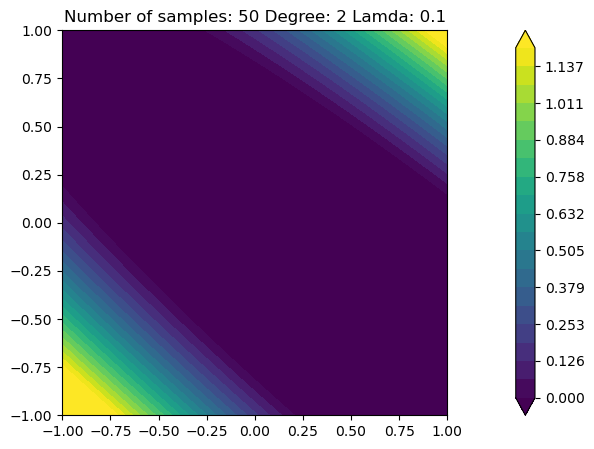

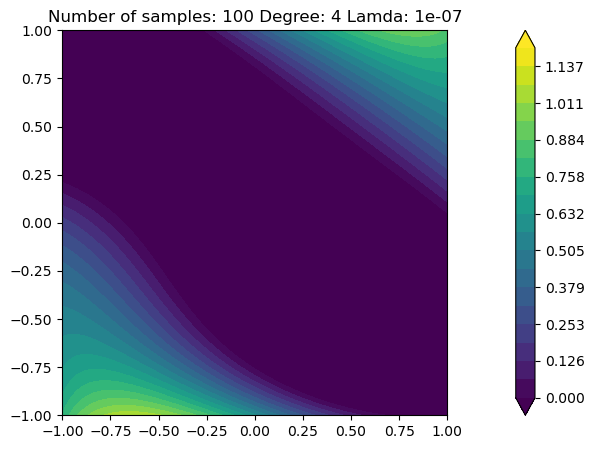

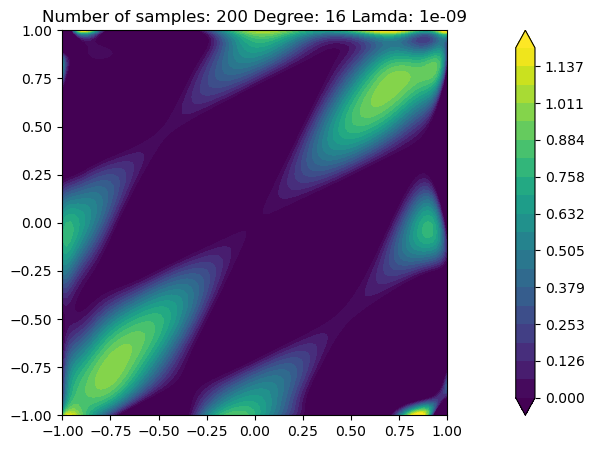

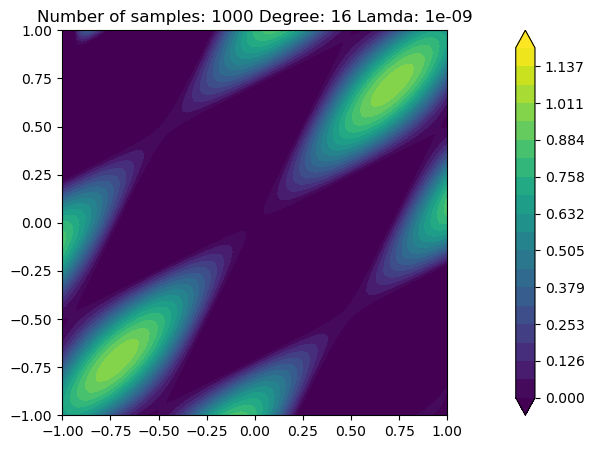

In [55]:
# Cell type : CodeWrite 
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    Y_test_pred = []
    for i in range(len(X_test)):
        Y_test_pred.append(np.dot((X_test[i].T),wt_vector))
        
    Y_test_pred = np.array(Y_test_pred)
    return Y_test_pred 
    

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions


    z = np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1)
   

    X_t = []
    
    for c in range(len(z)):
        k = []
        for i in range(0,degree+1):
            for j in range(0,degree-i+1):
                k.append((z[c][0]**i)*(z[c][1]**j))
    
        X_t.append(k)

    X_t = np.array(X_t)
    
    Z = polynomial_regression_ridge_pred(X_t,wt_vector,degree)
    Z= np.reshape(Z,(100,100))
    
    plt.contourf(X,Y,Z,extend = 'both',levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.colorbar()
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    n = len(X_train)
    d = len(X_train[0])
    
    if degree > 8:
        mat1 = np.dot(X_train.T,X_train)
        mat2 = reg_param*(np.identity(d))
        mat1 = mat1+mat2
        invmat1 = np.linalg.inv(mat1)
        w = np.linalg.multi_dot([invmat1,X_train.T,Y_train])
    else:
        mat1 = np.dot(X_train,X_train.T)
        mat2 = reg_param*(np.identity(n))
        mat1 = mat1+mat2
        invmat1 = np.linalg.inv(mat1)
        w = np.linalg.multi_dot([X_train.T,invmat1,Y_train])
    
            
    return w

    
    
def compute_BV_error_sample_plot(X_train,X_test,Y_train,Y_test,degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """


    
    
    wt_vector = polynomial_regression_ridge_train(X_train,Y_train,degree,reg_param)
    Y_test_pred    = polynomial_regression_ridge_pred(X_test,wt_vector,degree)
    Y_train_pred   = polynomial_regression_ridge_pred(X_train,wt_vector,degree)
    mse_train = 0
    mse_test = 0
    for i in range(len(X_test)):
        mse_test += (Y_test_pred[i]-Y_test[i])**2
    

    mse_test = mse_test/len(X_test)

    for i in range(len(X_train)):
        mse_train += (Y_train_pred[i]-Y_train[i])**2
    mse_train = mse_train/len(X_train)

    return [mse_train,mse_test]




dp4 = np.load('../../Data/dataset4_1.npz')
for num_training_samples in [50, 100, 200 ,1000]: 
    min_train_error = 1000000
    min_test_error  = 1000000  
    train_err = []  
    test_err = []      
    for degree in [1,2,4,8,16]:
                X_t  = dp4['arr_0']
                Y_train  = dp4['arr_1'][:num_training_samples]
                X_tes = dp4['arr_2']
                Y_test   = dp4['arr_3']
                X = []
                X_t  = dp4['arr_0']
                X = []
                for m in range(len(X_t)):
                    z = []
                    for i in range(0,degree+1):
                        for j in range(0,degree+1-i):
                            z.append((X_t[m][0]**i) * (X_t[m][1]**j))           
                    X.append(z)
                X = np.array(X)
                X_train = X[:num_training_samples]
                
                X = []
                for m in range(len(X_tes)):
                    z = []
                    for i in range(0,degree+1):
                        for j in range(0,degree+1-i):
                            z.append((X_tes[m][0]**i) * (X_tes[m][1]**j))           
                    X.append(z)
                X_test = np.array(X)
                for m in range(len(X_t)):
                    z = []
                    for i in range(0,degree+1):
                        for j in range(0,degree+1-i):
                            z.append((X_t[m][0]**i) * (X_t[m][1]**j))           
                    X.append(z)
                X = np.array(X)
                for reg_param in [10**(-9), 10**(-7), 10**(-5), 10**(-3), 10**(-1), 10**(1)]:
                    train_error, test_error = compute_BV_error_sample_plot(X_train,X_test,Y_train,Y_test,degree,reg_param,num_training_samples)
                    train_err.append(train_error)
                    test_err.append(test_error)
                    if test_error <= min_test_error:
                        min_test_error = test_error
                        lamda = reg_param
                        Degree = degree
                        wt_vector = polynomial_regression_ridge_train(X_train,Y_train,degree,reg_param)
    train_err = np.array(train_err)
    train_err = np.reshape(train_err,(5,6))
    test_err = np.array(test_err)
    test_err = np.reshape(test_err,(5,6))
    

    fig = plt.figure(figsize=(60,5))
    '''ax1 = fig.add_subplot(133)
    ax1.axis('off')
    ax1.set_title("Train error, Samples: "+str(num_training_samples))
    t1 = ax1.table(cellText = train_err,
              rowLabels = [1,2,4,8,16],
              colLabels = ['1e-9', '1e-7', '1e-5', '1e-3', '1e-1', '1e1'],
              loc = 'upper center')
    t1.set_fontsize(18)
    t1.scale(1,3.8)
   
    ax2 = fig.add_subplot(132)
    ax2.axis('off')
    ax2.set_title("Test error, Samples: "+str(num_training_samples))
    t2 = ax2.table(cellText = test_err,
              rowLabels = [1,2,4,8,16],
              colLabels = ['1e-9', '1e-7', '1e-5', '1e-3', '1e-1', '1e1'],
              loc = 'upper center')
    t2.set_fontsize(30)
    t2.scale(1,3.8)'''
    
  
    ax2 = fig.add_subplot(131)
    visualise_polynomial_2d(wt_vector,Degree,title = "Number of samples: " + str(num_training_samples)+ " Degree: "+str(Degree)+" Lamda: "+str(lamda))            
    ax2.set(adjustable='box', aspect='equal')
    fig.show()

    
 

** Cell type : TextWrite **

At very high degrees, the training error is very less. But this does not mean we have acheived an accurate model. Because when the training samples are very less(50), the training error is very less and is very near to zero. But, where as the test error is as high as 250.386. But as the value of regularization parameter increases in value, the test error reduces because the weight do not take very high values, leading to more generalisation. 

As number of training samples increases, high degree polymial(16) is shown to better generalize the data. Thus, we can infer that the data has come form a 16 order polynomial, as the train and test error are both nearly close to zero.

Number of Samples = 50,Train Error
----
|Regression Parameter| 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1   | 1e1    |
| :----------------- | :------ | :------ | :------ | :------ | :----- | :----- |
| Degree:1           |2.503e-01|0.250383 |0.250383 |0.250383 |0.250384|0.25589 |
| Degree:2           |1.341e-01|0.134112 |0.134112 |0.134112 |0.134213|0.19748 |
| Degree:4           |1.020e-01|0.102018 |0.102018 |0.102019 |0.104107|0.180638|
| Degree:8           |1.327e-04|0.000199 |0.010766 |0.041721 |0.081991|0.163200|
| Degree:16          |1.960e-08|0.000009 |0.001318 |0.031113 |0.070021|0.150013|

Number of Samples = 50, Test Error
----
|Regression Parameter| 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1   | 1e1    |
| :----------------- | :------ | :------ | :------ | :------ | :----- | :----- |
| Degree:1           |0.301267|0.301267|0.301267|0.301262|0.300838|0.278351|
| Degree:2           |0.157900|0.157900|0.157900|0.157886|0.156735|0.208224|
| Degree:4           |0.157334|0.157334|0.157333|0.157243|0.161826|0.196569|
| Degree:8           |237.690199|172.501863|18.594254|0.990251|0.165156|0.19391|
| Degree:16          |250.386527|232.024077|66.697684|2.337308|0.203961|0.19605|
      
Best contour plot has degree 2 and lamda 0.1

Number of Samples 100, Train Error
----
|Regression Parameter| 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1   | 1e1    |
| :----------------- | :------ | :------ | :------ | :------ | :----- | :----- |
|Degree:1  |0.258091|0.258091|0.258091|0.258091|0.258091|0.258740|
|Degree:2   |0.130951|0.130951|0.130951|0.130951|0.130966|0.164968|
|Degree:4   |0.113027|0.113027|0.113027|0.113027|0.113651|0.152373|
|Degree:8   |0.041588|0.041588|0.041680|0.058008|0.092902|0.144886|
|Degree:16   |0.000008|0.000484|0.007544|0.041729|0.083697|0.139544|

Number of Samples 100, Test Error
----
|Regression Parameter| 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1   | 1e1    |
| :----------------- | :------ | :------ | :------ | :------ | :----- | :----- |
|Degree:1   |0.273149|   0.273149|   0.273149|  0.273148|  0.273083|  0.268622|
|Degree:2  |0.153210|   0.153210|   0.153210|  0.153207|  0.152916|  0.175709|
|Degree:4   |0.142776|   0.142776|   0.142776|  0.142808|  0.146020|  0.168980|
|Degree:8   |0.712919|   0.711320|   0.580759|  0.203638|  0.162628|  0.171168|
|Degree:16   |54.078872|  11.770419|  23.416589|  0.417849|  0.188359|0.174160|


Best contour plot has degree 4 and lamda 1e-7


Number of Samples 200, Train Error
----
|Regression Parameter| 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1   | 1e1    |
| :----------------- | :------ | :------ | :------ | :------ | :----- | :----- |
|Degree:1  |0.246535|  0.246535|  0.246535|  0.246535|  0.246535|  0.246641|
|Degree:2  |0.133665|  0.133665|  0.133665|  0.133665|  0.133669|  0.147549|
|Degree:4  |0.113338|  0.113338|  0.113338|  0.113338|  0.113590|  0.144444|
|Degree:8 |0.061737|  0.061737|  0.061738|  0.063950|  0.095687|  0.141193|
|Degree:16  |0.000029|  0.001085|  0.011326|  0.044463|  0.083500|  0.133763|


Number of Samples 200, Test Error
----
|Regression Parameter| 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1   | 1e1    |
| :----------------- | :------ | :------ | :------ | :------ | :----- | :----- |
|Degree:1      |0.267663|  0.267663 | 0.267663|  0.267663|  0.267646|  0.266225|
|Degree:2      |0.145781|  0.145781 | 0.145781|  0.145780|  0.145754|  0.158682|
|Degree:4      |0.131171|  0.131171 | 0.131171|  0.131164|  0.130831|  0.157085|
|Degree:8      |0.137362|  0.137359 | 0.136982|  0.118183|  0.113965|  0.156451|
|Degree:16     |0.037150|  0.083710 | 0.170807|  0.086904|  0.111214|  0.152244|

Best contour plot has degree 16 and lamda 1e-9


Number of Samples 1000, Train Error
----
|Regression Parameter| 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1   | 1e1    |
| :----------------- | :------ | :------ | :------ | :------ | :----- | :----- |
|Degree:1    |0.240728|  0.240728|  0.240728|  0.240728|  0.240728|  0.240729|
|Degree:2   |0.138824|  0.138824|  0.138824|  0.138824|  0.138824|  0.139718|
|Degree:4    |0.125017|  0.125017|  0.125017|  0.125017|  0.125025|  0.134172|
|Degree:8    |0.076743|  0.076743|  0.076743|  0.076846|  0.094838|  0.128438|
|Degree:16    |0.000025|  0.000445|  0.006533|  0.038415|  0.084993|  0.121687|

Number of Samples 1000, Test Error
----
|Regression Parameter| 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1   | 1e1    |
| :----------------- | :------ | :------ | :------ | :------ | :----- | :----- |
|Degree:1   |0.262535|  0.262535|  0.262535|  0.262535|  0.262535|  0.262530|
|Degree:2  |0.142429|  0.142429|  0.142429|  0.142429|  0.142442|  0.144519|
|Degree:4   |0.127080|  0.127080|  0.127080|  0.127081|  0.127242|  0.140937|
|Degree:8   |0.084813|  0.084813|  0.084800|  0.083913|  0.097823|  0.134989|
|Degree:16   |0.001198|  0.001490|  0.010957|  0.049658|  0.090737|  0.127821|


Best contour plot has degree 16 and lamda 1e-9


** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










C:\Users\lenovo\AppData\Local\Temp\ipykernel_15096\2496017401.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


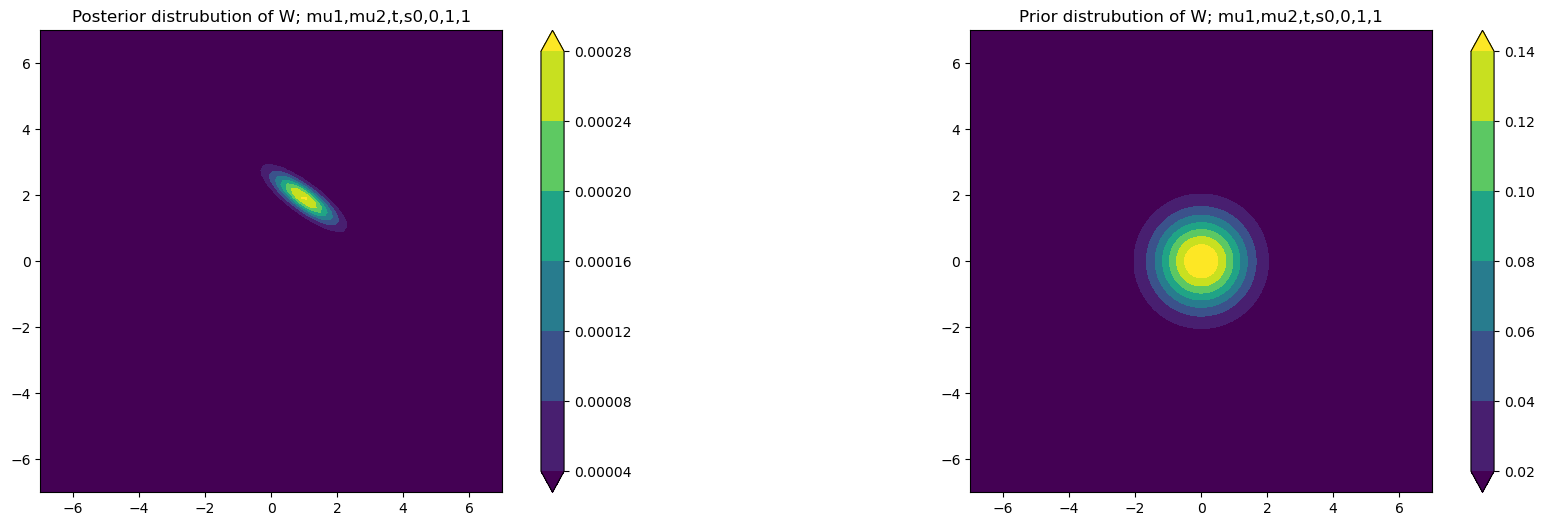

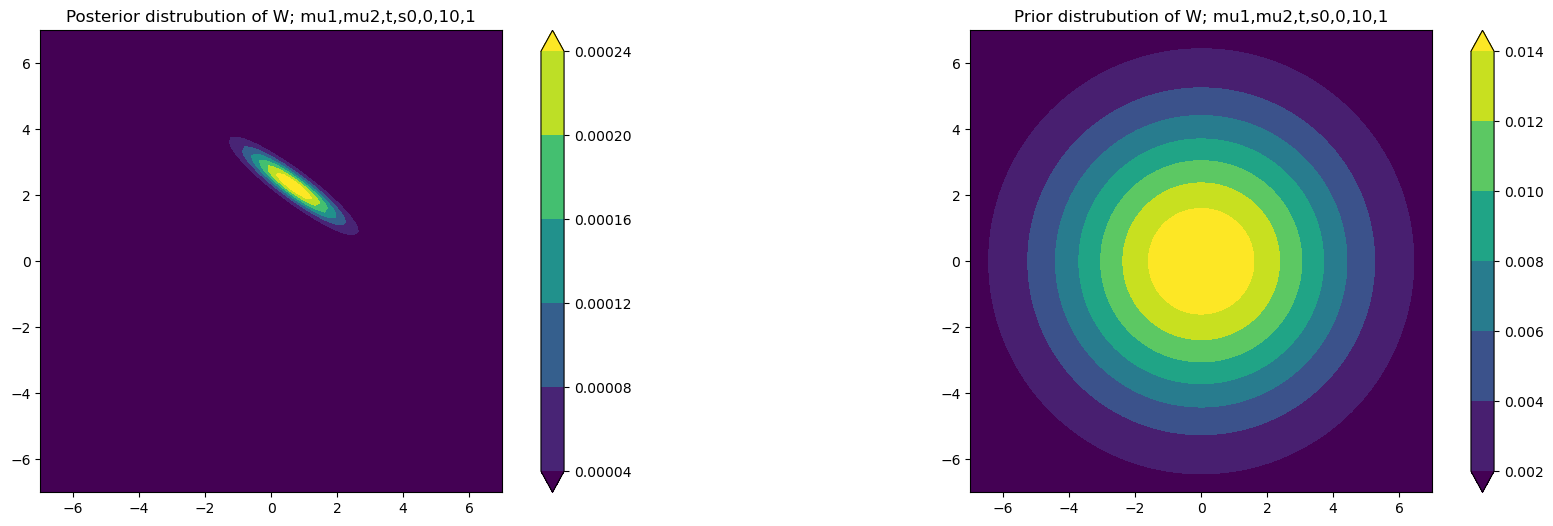

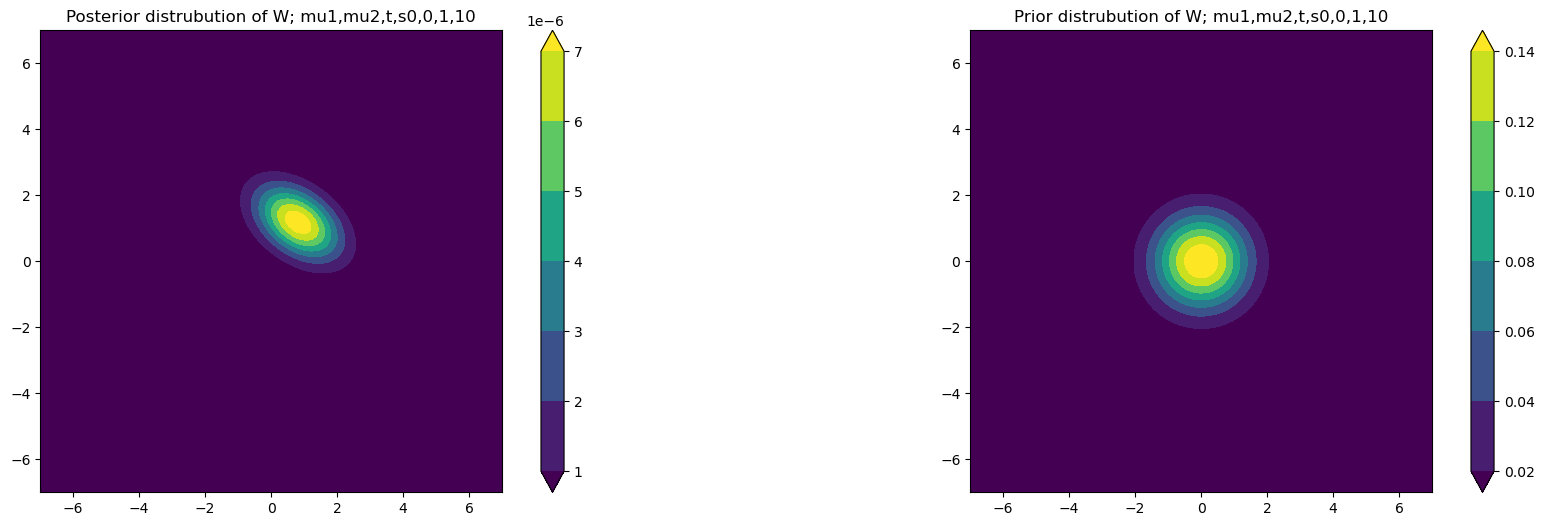

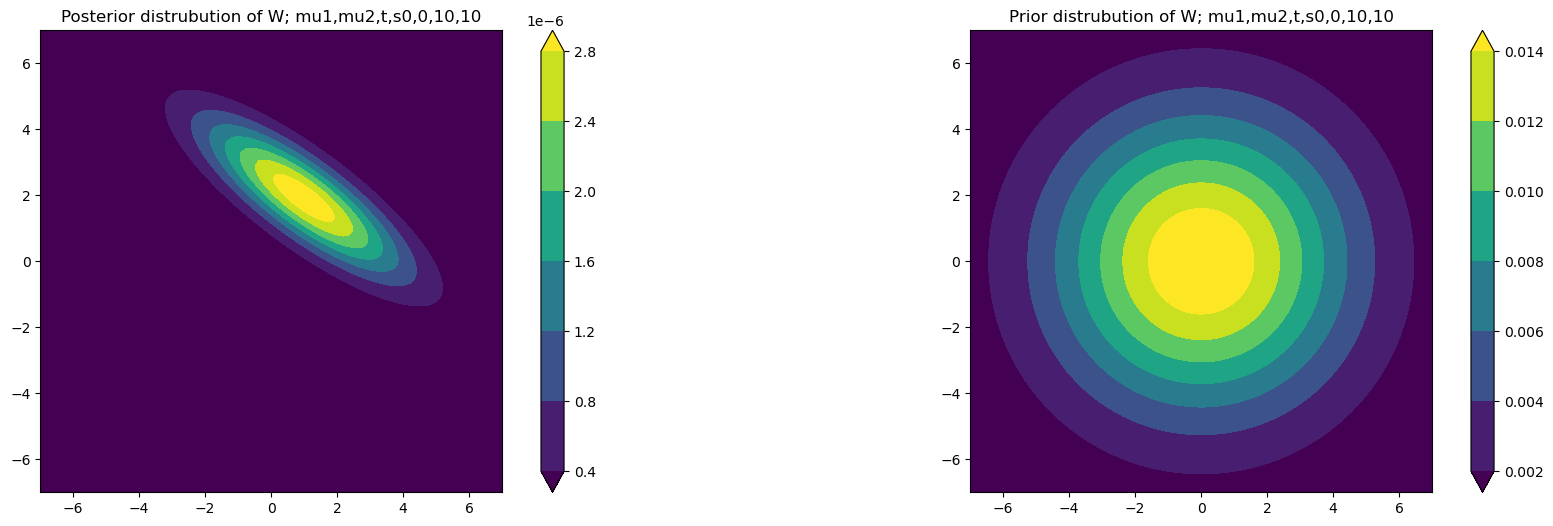

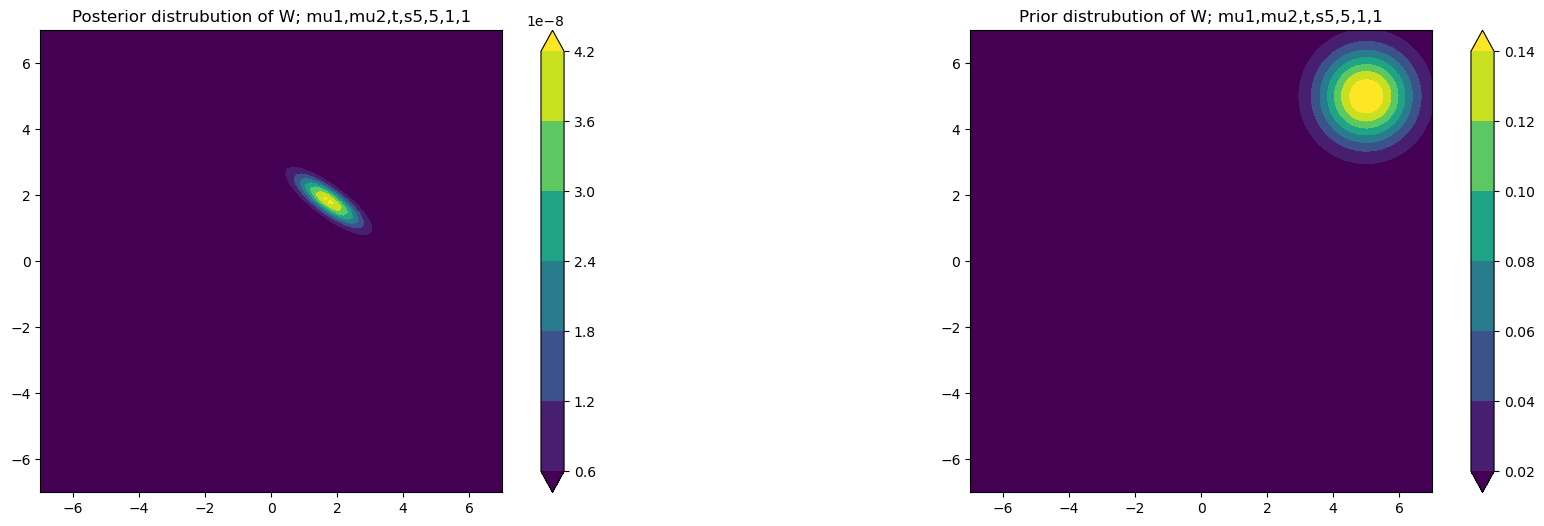

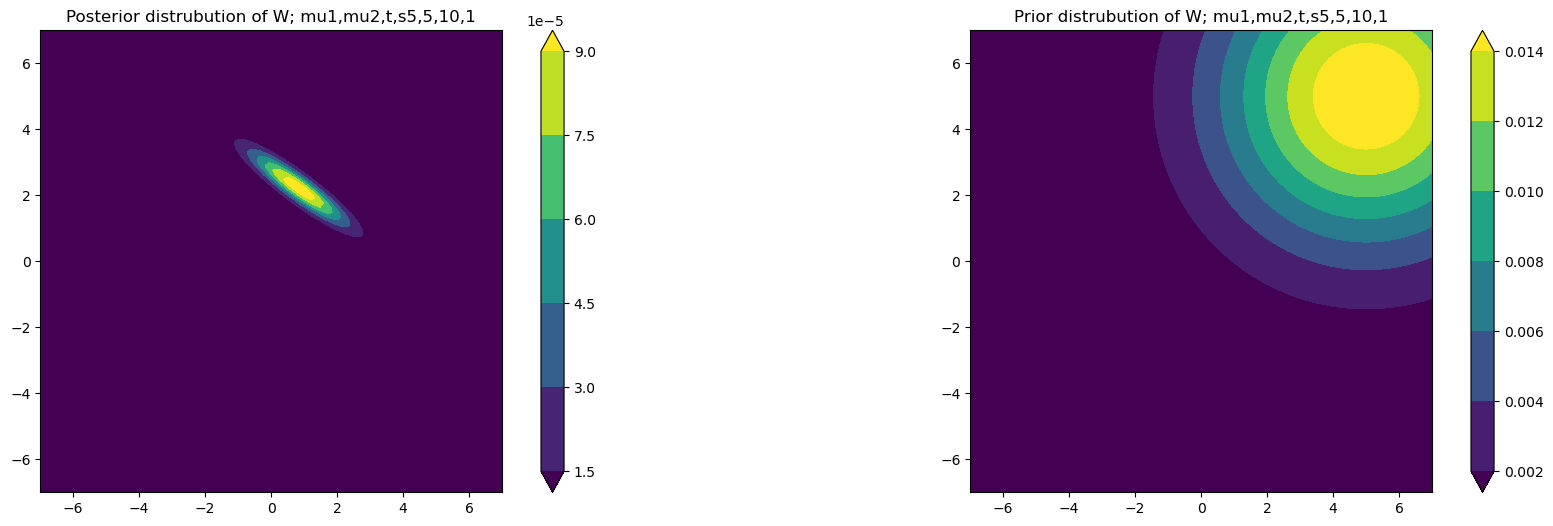

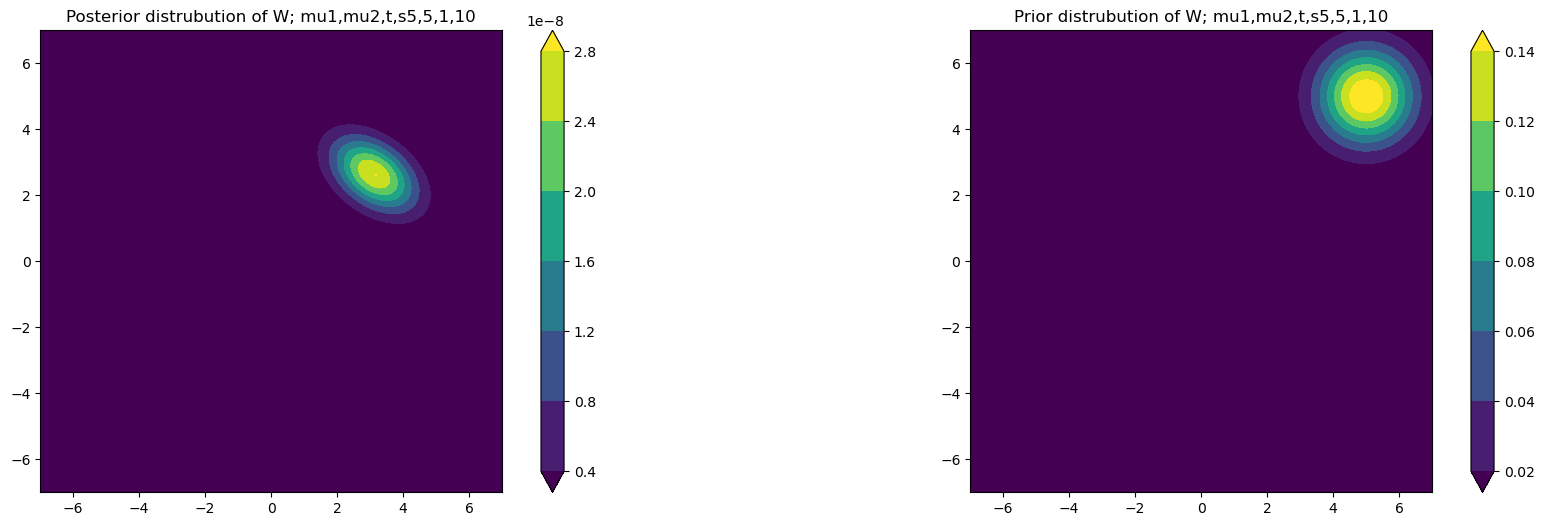

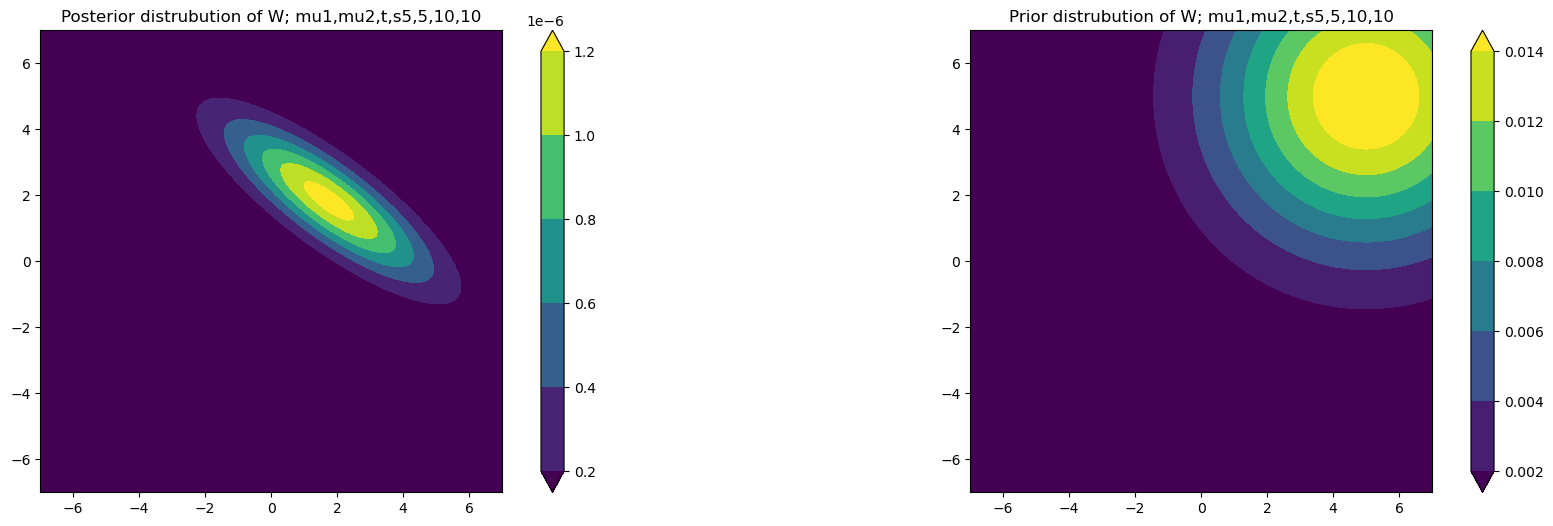

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15096\2496017401.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_dup = np.array(X_dup)
D:\myfolder\anaconda\lib\site-packages\matplotlib\colors.py:1254: RuntimeWarning: overflow encountered in true_divide
  resdat /= (vmax - vmin)
D:\myfolder\anaconda\lib\site-packages\matplotlib\colorbar.py:1271: RuntimeWarning: overflow encountered in true_divide
  y = y / (self._boundaries[self._inside][-1] -


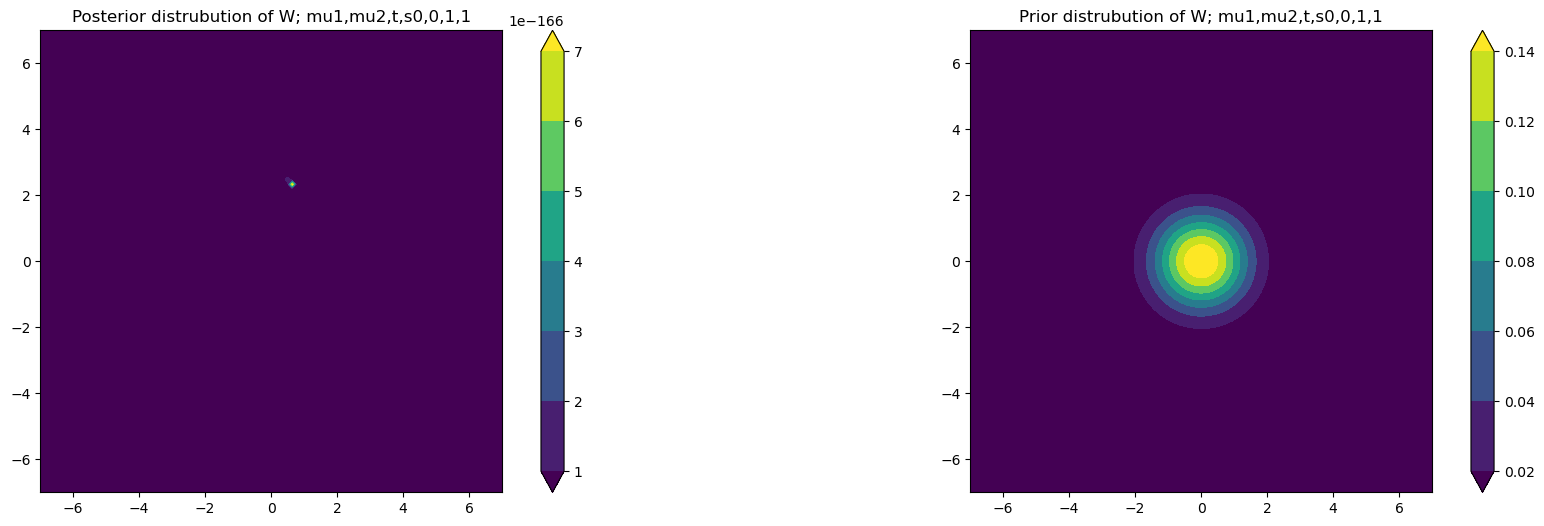

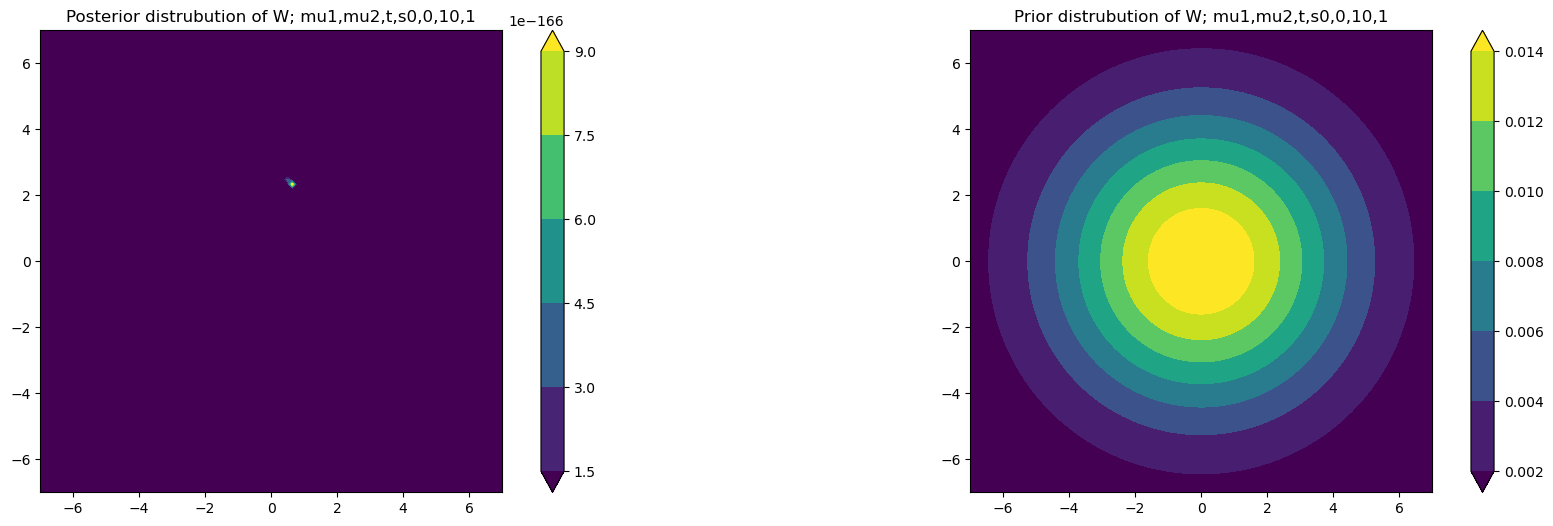

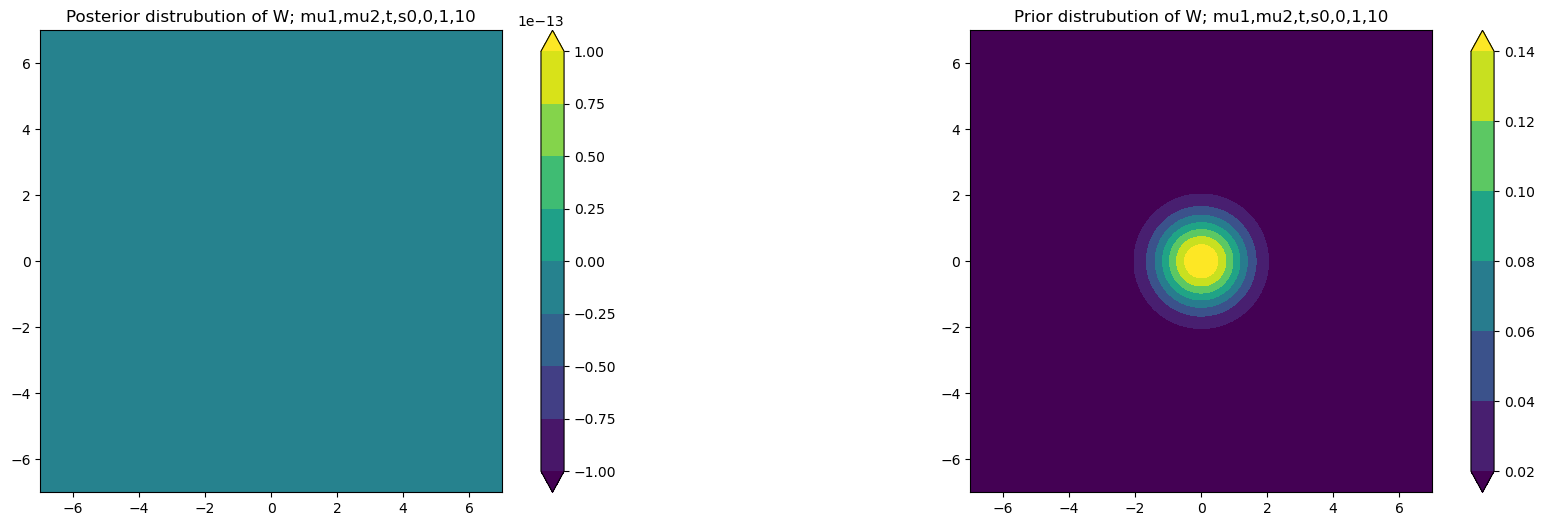

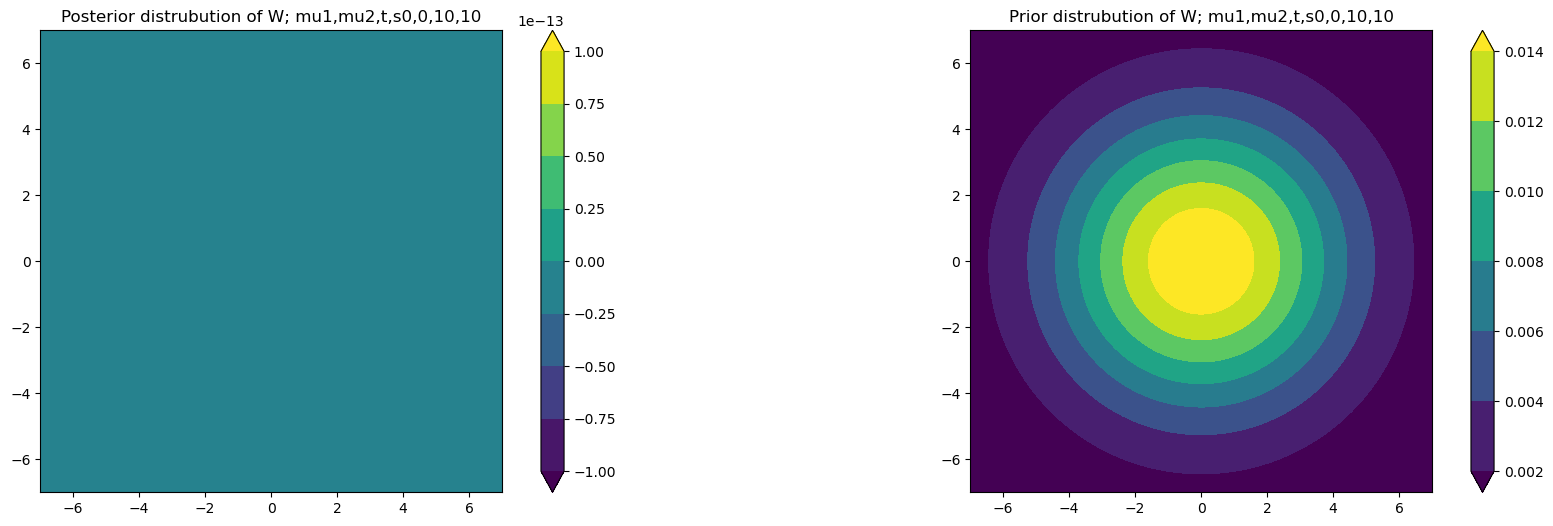

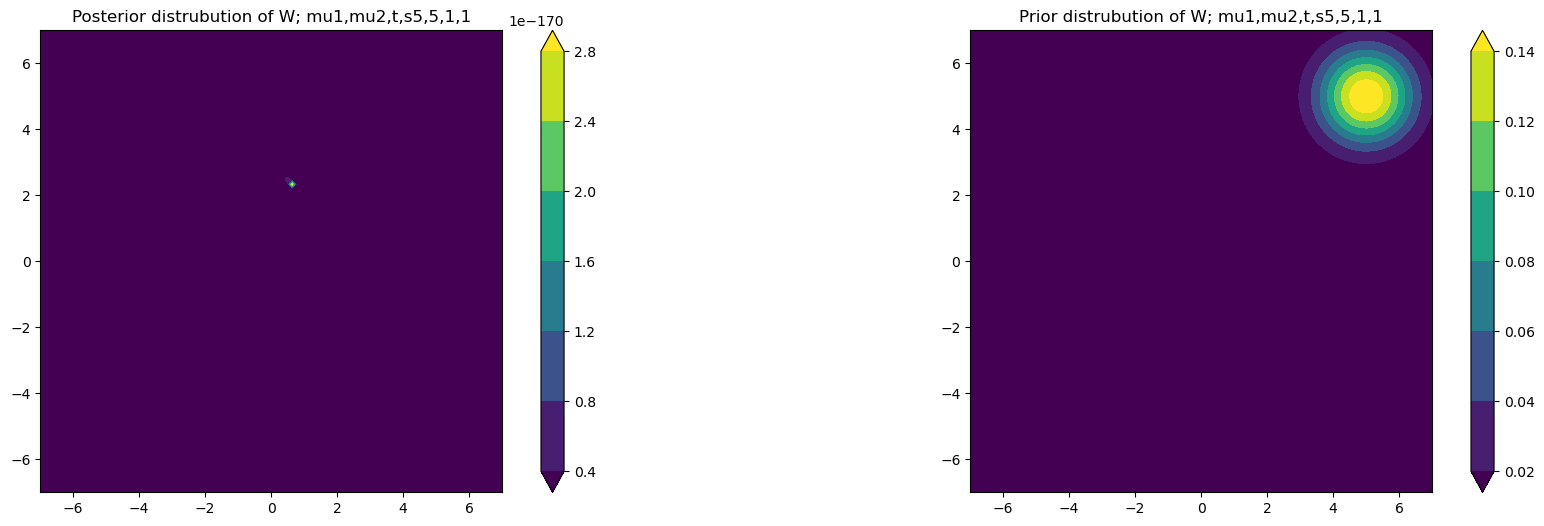

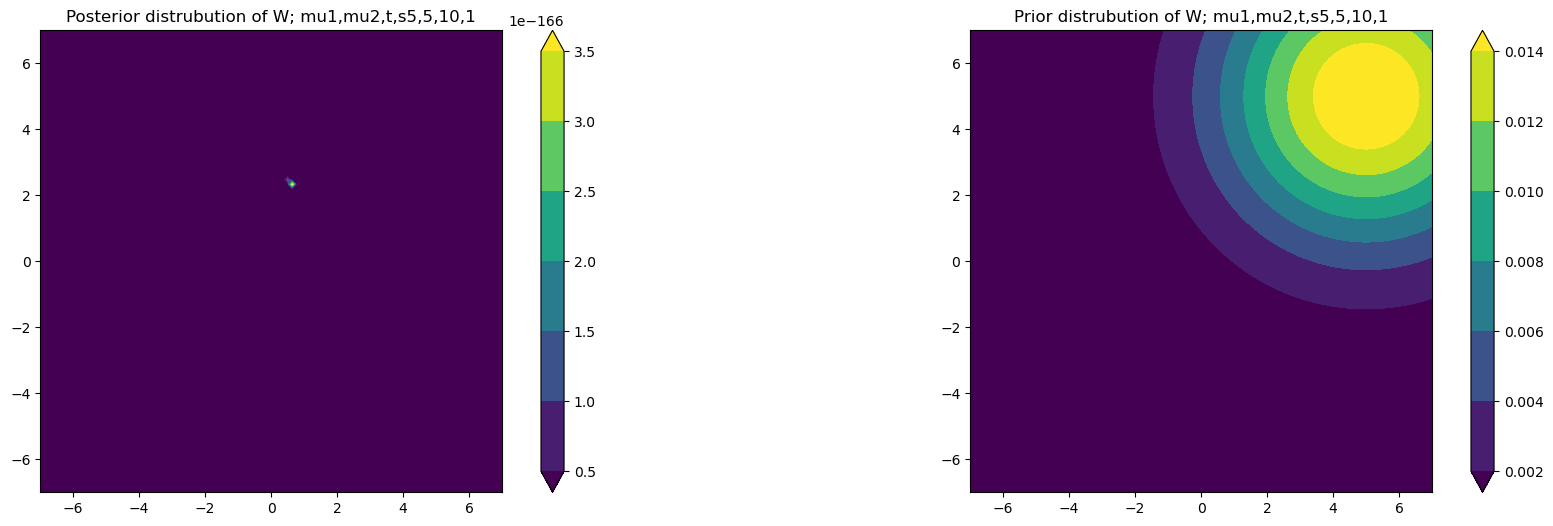

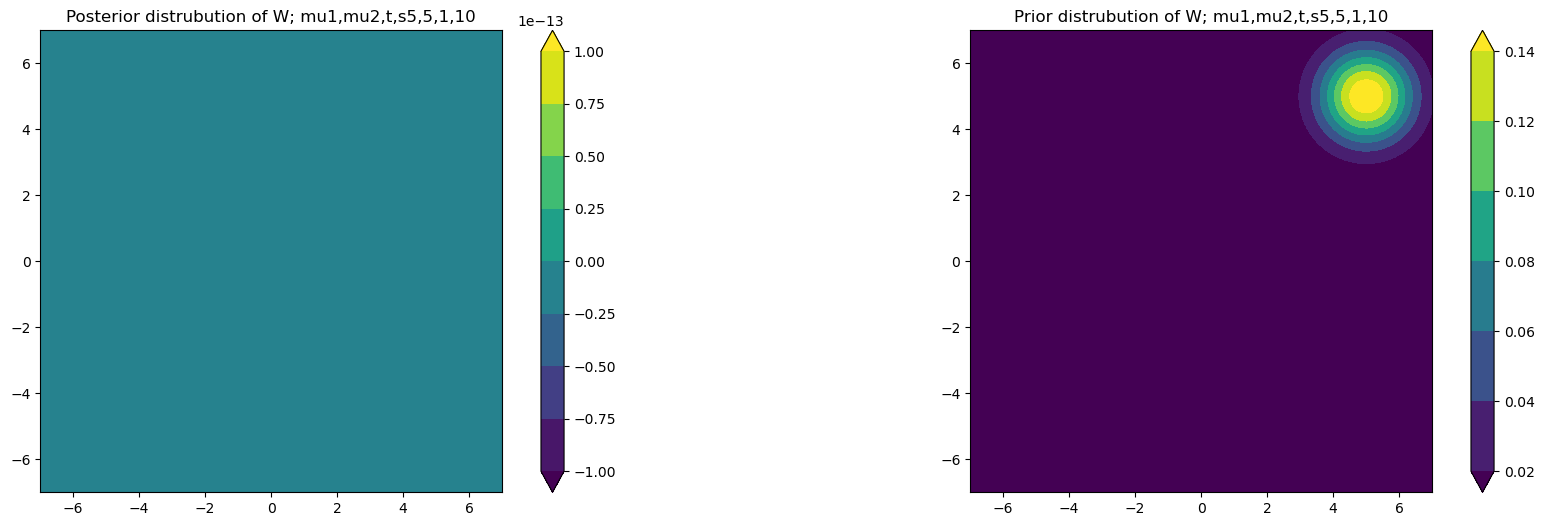

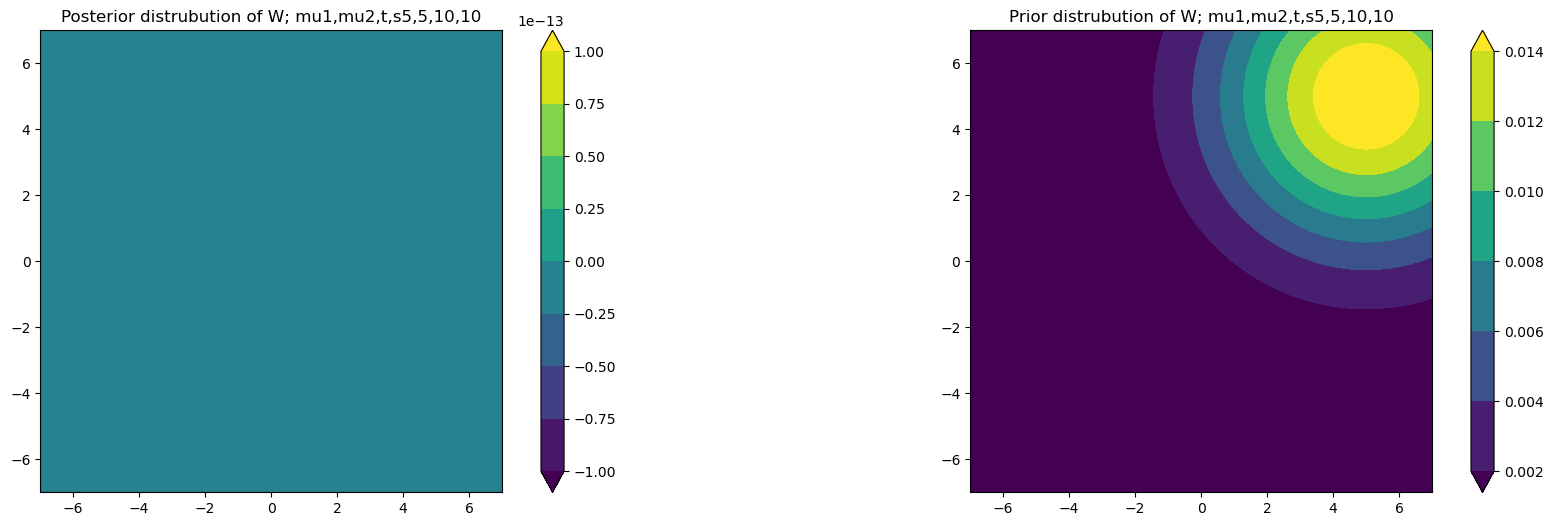

In [56]:
# Cell type : CodeWrite 
def prior_distribution(X,mu,t):
    e = 2.718281828459045
    pi = 3.14159
    Z = [] 
  
    for i in range(len(X)):
        a = np.linalg.multi_dot([(X[i]-mu).T,np.identity(2),(X[i]-mu)])
        z = e**((-0.5/t**2)*a)
        z = (0.5/(pi*(t**2))*z)
        Z.append(z)

    Z = np.array(Z)
    return Z


def posterior_distribution(X,W,mu,s,t):
    e = 2.718281828459045
    pi = 3.14159
    Z = []
    for i in range(len(W)):
        f=1
        a = np.linalg.multi_dot([(W[i]-mu).T,np.identity(2),(W[i]-mu)])
        z = e**((-0.5/t**2)*a)
        z = (0.5/(pi*(t**2))*z)
        f = f*z
        for j in range(len(X)):
            a = e**((-0.5*(X[j][1]-(np.dot(X[j][0],W[i])))**2)/(s**2))
            f = f*(a/(s*(2*pi)**0.5))
        Z.append(f)
  
    Z = np.array(Z)
    return Z  





def plot_countours_posterior(X,mu1,mu2,s,t,title = ''):
    W_X,W_Y = np.meshgrid(np.linspace(-7,7,100), np.linspace(-7,7,100))

    # Get Z using other functions
    W = []

    for i in range(W_X.shape[0]):
        for j in range(W_X.shape[0]):
            W.append([W_X[i][j],W_Y[i][j]])

    W =  np.array(W)
    mu = np.array([mu1,mu2])
    Z = posterior_distribution(X,W,mu,s,t)
    Z = np.reshape(Z,(100,100))
    
    
    plt.contourf(W_X,W_Y,Z,extend = 'both')
    plt.title(title)
    plt.colorbar()





def plot_countours_prior(mu1,mu2,t,title=''):
    X,Y = np.meshgrid(np.linspace(-7,7,100), np.linspace(-7,7,100))

    # Get Z using other functions
    X_t = []

    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            X_t.append([X[i][j],Y[i][j]])

    X_t = np.array(X_t)
    mu = np.array([mu1,mu2])
    Z = prior_distribution(X_t,mu,t)
    Z = np.reshape(Z,(100,100))

    plt.contourf(X,Y,Z,extend ='both')
    plt.title(title)
    plt.colorbar()
    



X = [[[1,2],5.1],[[2,2.1],6.1],[[0.6,1.5],4.2],[[1.1,0.9],2.9]]
X = np.array(X)

data = [[0,0,1,1],[0,0,10,1],[0,0,1,10],[0,0,10,10],[5,5,1,1],[5,5,10,1],[5,5,1,10],[5,5,10,10]]
for mu1,mu2,t,s in data:
    fig = plt.figure(figsize=(22,6))
    ax1 = fig.add_subplot(121)
    plot_countours_posterior(X,mu1,mu2,s**0.5,t**0.5,title = 'Posterior distrubution of W; mu1,mu2,t,s'+str(mu1,)+','+str(mu2,)+','+str(t,)+','+str(s))
    ax1.set(adjustable='box', aspect='equal')
    ax1 = fig.add_subplot(122)
    plot_countours_prior(mu1,mu2,t**0.5,title = 'Prior distrubution of W; mu1,mu2,t,s'+str(mu1)+','+str(mu2,)+','+str(t,)+','+str(s))
    ax1.set(adjustable='box', aspect='equal')
    plt.show()


X = [[np.array([1,2]),5.1],[np.array([2,2.1]),6.1],[np.array([0.6,1.5]),4.2],[np.array([1.1,0.9]),2.9]]
X_dup = []
for i in X:
    for j in range(100):
        X_dup.append(i)

X_dup = np.array(X_dup)
np.random.shuffle(X_dup)
data = [[0,0,1,1],[0,0,10,1],[0,0,1,10],[0,0,10,10],[5,5,1,1],[5,5,10,1],[5,5,1,10],[5,5,10,10]]
for mu1,mu2,t,s in data:
    fig = plt.figure(figsize=(22,6))
    ax1 = fig.add_subplot(121)
    plot_countours_posterior(X_dup,mu1,mu2,s**0.5,t**0.5,title = 'Posterior distrubution of W; mu1,mu2,t,s'+str(mu1,)+','+str(mu2,)+','+str(t,)+','+str(s))
    ax1.set(adjustable='box', aspect='equal')
    ax1 = fig.add_subplot(122)
    plot_countours_prior(mu1,mu2,t**0.5,title = 'Prior distrubution of W; mu1,mu2,t,s'+str(mu1,)+','+str(mu2,)+','+str(t,)+','+str(s))
    ax1.set(adjustable='box', aspect='equal')
    plt.show()

** Cell type : TextWrite **

As it is evident from the countour plots, the prior dustribution of weights distribution W are concentric circles.The spread of contours in radial direction increases as variance of weight vectors increases. Unlike prior, the posterior distribution of W are elliptical contours with sharp peaks. When the Data is duplicated 100 times, the posterior distribution of W becomes much sharper and the spread becomes very low. When, the variance of the error term becomes large, the posterior distribution of W is more or less uniform. As the data is duplicated the variance of the posterior distribution becomes very close to zero. Thus the distribution peaks at the mean and quickly converges to zero in the remaining area.